# 1. Lựa chọn dữ liệu & mô tả dữ liệu

## 1.1 Nguồn dữ liệu

Dữ liệu được lấy từ : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Bộ dữ liệu này chứa thông tin của 100.000 đơn hàng từ năm 2016 đến 2018 được thực hiện tại nhiều sàn giao dịch ở Brazil. Các tính năng của bộ dữ liệu cho phép xem đơn hàng từ nhiều khía cạnh: từ trạng thái đơn hàng, giá cả, thanh toán và hiệu suất vận chuyển đến vị trí khách hàng, thuộc tính sản phẩm và cuối cùng là đánh giá của khách hàng. Chúng tôi cũng đã phát hành một bộ dữ liệu định vị địa lý liên kết mã bưu chính Brazil với tọa độ vĩ độ/kinh độ.

Đây là dữ liệu thương mại thực sự, đã được ẩn danh và các thông tin tham khảo về công ty và đối tác trong văn bản đánh giá đã được thay thế bằng tên của những ngôi nhà lớn trong Game of Thrones.

Bộ dữ liệu này được cung cấp rộng rãi bởi Olist, cửa hàng bách hóa lớn nhất tại các chợ trực tuyến Brazil. Olist kết nối các doanh nghiệp nhỏ từ khắp Brazil với các kênh bán hàng một cách dễ dàng và chỉ với một hợp đồng duy nhất. Các thương nhân này có thể bán sản phẩm của mình thông qua Cửa hàng Olist và vận chuyển trực tiếp đến khách hàng thông qua các đối tác hậu cần của Olist.

Sau khi khách hàng mua sản phẩm từ Olist Store, người bán sẽ được thông báo để hoàn tất đơn hàng. Khi khách hàng nhận được sản phẩm hoặc ngày giao hàng dự kiến ​​đến, khách hàng sẽ nhận được khảo sát mức độ hài lòng qua email, trong đó khách hàng có thể ghi chú về trải nghiệm mua hàng và ghi lại một số nhận xét.

## 1.2 Mô tả dataset

A. Đọc dữ liệu từ file CSV


In [1]:
import pandas as pd

customers_df = pd.read_csv('olist_customers_dataset.csv')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
category_translation_df = pd.read_csv('product_category_name_translation.csv')


Hợp nhất dữ liệu

In [2]:
df= pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df= df.merge(order_reviews_df, on="order_id", how='inner')
df= df.merge(order_items_df, on="order_id", how='inner')
df= df.merge(products_df, on="product_id", how='inner')
df= df.merge(order_payments_df, on="order_id", how='inner')
df= df.merge(sellers_df, on='seller_id', how='inner')
df= df.merge(category_translation_df, on='product_category_name', how='inner')
df.shape

(115609, 40)

B. Kiểm tra thông tin cơ bản về dữ liệu


In [3]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

#### Đánh giá tổng quan bộ dữ liệu

Bộ dữ liệu Olist bao gồm nhiều bảng có kích thước khác nhau, phản ánh đầy đủ các thành phần trong hệ thống thương mại điện tử như khách hàng, đơn hàng, sản phẩm, người bán và thanh toán. Cụ thể:

- `customers`: 99,441 dòng và 5 cột, chứa thông tin cơ bản về khách hàng.
- `geolocation`: 1,000,163 dòng và 5 cột, là bảng có kích thước lớn nhất, lưu trữ thông tin vị trí địa lý.
- `order_items`: 112,650 dòng và 7 cột, mô tả chi tiết các sản phẩm trong từng đơn hàng.
- `order_payments`: 103,886 dòng và 5 cột, chứa thông tin về hình thức và giá trị thanh toán.
- `order_reviews`: 99,224 dòng và 7 cột, ghi nhận đánh giá và phản hồi của khách hàng.
- `orders`: 99,441 dòng và 8 cột, là bảng trung tâm liên kết hầu hết các bảng còn lại.
- `products`: 32,951 dòng và 9 cột, cung cấp thông tin chi tiết về sản phẩm.
- `sellers`: 3,095 dòng và 4 cột, lưu trữ dữ liệu về người bán.
- `category_translation`: 71 dòng và 2 cột, dùng để dịch tên danh mục sản phẩm sang tiếng Anh.

Nhìn chung, dữ liệu có cấu trúc rõ ràng, số lượng quan sát lớn và phù hợp cho các bài toán phân tích dữ liệu, trực quan hóa và xây dựng mô hình học máy cơ bản. Các bảng được phân tách hợp lý theo nghiệp vụ, giúp việc kết hợp (merge) và phân tích trở nên thuận tiện và hiệu quả.


C. CẤU TRÚC DỮ LIỆU

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [5]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


#### Đánh giá tổng thể về cấu trúc dữ liệu

Nhìn chung, bộ dữ liệu Olist có cấu trúc rõ ràng và được phân tách hợp lý theo các nghiệp vụ trong hệ thống thương mại điện tử, bao gồm khách hàng, đơn hàng, sản phẩm, người bán, thanh toán và đánh giá. Bảng `orders` đóng vai trò trung tâm, liên kết với các bảng còn lại thông qua khóa định danh, tạo điều kiện thuận lợi cho quá trình kết hợp và phân tích dữ liệu.

Phần lớn các bảng có đầy đủ dữ liệu và kiểu dữ liệu phù hợp cho phân tích. Một số bảng tồn tại dữ liệu thiếu, chủ yếu nằm ở các cột thời gian và nội dung đánh giá, tuy nhiên tỷ lệ không lớn và phù hợp với bối cảnh thực tế.

Tổng thể, dữ liệu có chất lượng tốt và đáp ứng yêu cầu cho các bước phân tích mô tả, trực quan hóa và xây dựng mô hình ở giai đoạn tiếp theo.


# 2. Tiền xử lý dữ liệu

## 2.1 Làm sạch dữ liệu

A. Kiểm tra dữ liệu thiếu


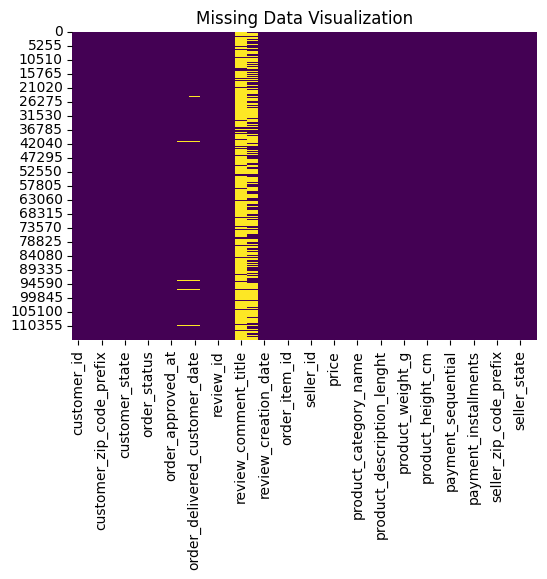

Missing Data Counts:
 customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_n

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_data = df.isnull().sum()

# Trực quan hóa dữ liệu thiếu
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# In số lượng dữ liệu thiếu
print("Missing Data Counts:\n", missing_data)


Loại bỏ tất cả các giá trị bị thiếu

In [7]:
df.dropna(inplace=True)


Vì trong đề tài không khai thác đến những yếu tố không quan trọng nên nhóm quyết định xóa các cột không dùng đến

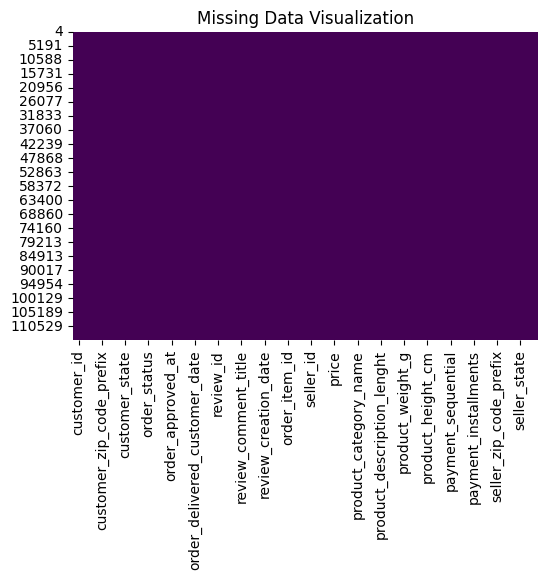

Missing Data Counts:
 customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_data = df.isnull().sum()

# Trực quan hóa dữ liệu thiếu
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# In số lượng dữ liệu thiếu
print("Missing Data Counts:\n", missing_data)


## 2.2 Chuẩn hóa dữ liệu

In [9]:
# Kết hợp Chiều rộng, Chiều cao và Chiều dài để có được Thể tích Sản phẩm
df['product_vol_cm3'] = df.product_length_cm * df.product_width_cm * df.product_height_cm

df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

# Chuyển đổi các tính năng Datetime từ Object sang Datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'])

# Trích xuất thời gian vận chuyển ước tính từ ngày mua cho đến ngày giao hàng ước tính
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# df['estimated_days'] = (df['order_estimated_delivery_date'].dt.date - df['order_purchase_timestamp'].dt.date).dt.days
# Trích xuất thời gian vận chuyển từ ngày mua hàng cho đến ngày giao hàng cho khách hàng
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# df['arrival_days'] = (df['order_delivered_customer_date'].dt.date - df['order_purchase_timestamp'].dt.date).dt.days
# Trích xuất thời gian vận chuyển từ ngày giao hàng của hãng vận chuyển mua hàng cho đến khi giao hàng cho khách hàng
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

# df['shipping_days'] = (df['order_delivered_customer_date'].dt.date - df['order_delivered_carrier_date'].dt.date).dt.days
# Bỏ những ngày không nhất quán khi "order_delivered_carrier_date" lớn hơn "order_delivered_customer_date"
# # Remove rows with negative shipping days
# df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df['shipping_days'] < 0]).index, inplace=True)

df['shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days
df = df[df['shipping_days'] >= 0]
# Trạng thái vận chuyển từ Người bán đến Người vận chuyển
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

# df['seller_to_carrier_status'] = (df['shipping_limit_date'].dt.date - df['order_delivered_carrier_date'].dt.date).dt.days

# Trạng thái vận chuyển từ Nhà vận chuyển đến Khách hàng
# df['arrival_status'] = (df['order_estimated_delivery_date'].dt.date - df['order_delivered_customer_date'].dt.date).dt.days
# df['arrival_status'] = df['arrival_status'].apply(lambda x : 'OnTime/Early' if x >= 0 else 'Late')

df['arrival_status'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

# Classify the duration in 'OnTime/Early' & 'Late'
df['arrival_status'] = df['arrival_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')

# Hiển thị số liệu thống kê về Tính năng mới
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

df['estimated_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
df['arrival_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

df[['estimated_days', 'arrival_days', 'shipping_days']].describe()

,estimated_days,arrival_days,shipping_days
count,11578.000000,11578.000000,11578.000000
mean,22.469511,10.182069,7.327345
std,10.217019,8.236045,7.335854
min,2.000000,0.000000,0.000000
25%,15.000000,5.000000,3.000000
50%,22.000000,8.000000,6.000000
75%,29.000000,13.000000,9.000000
max,69.000000,88.000000,77.000000


Xóa các giá trị ngoại lệ trong cả hai tính năng (Hơn 60 ngày)

In [10]:
outlier_indices = df[(df.estimated_days > 60) | (df.arrival_days > 60) | (df.shipping_days > 60)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

Kết hợp Chiều rộng, Chiều cao và Chiều dài để có được Thể tích Sản phẩm

In [11]:
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'
    
    elif x in range(8, 16):
        return 'Fast'
    
    elif x in range(16, 25):
        return 'Neutral'
    
    elif x in range(25, 40):
        return 'Slow'
    
    else:
        return 'Very Slow'

df['estimated_delivery_rate'] = df.estimated_days.apply(rates)
df['arrival_delivery_rate'] = df.arrival_days.apply(rates)
df['shipping_delivery_rate'] = df.shipping_days.apply(rates)

# 3. Phân tích dữ liệu thăm dò ( EDA )

## 3.1 Giá trị đơn hàng có ảnh hưởng đến mức độ hài lòng của khách hàng không?

- Dựa trên EDA của biến payment_value

- Kiểm tra liệu các đơn hàng có giá trị cao có xu hướng đánh giá khắt khe hơn hay không

##### Thống kê mô tả giá trị thanh toán

In [12]:

df['payment_value'].describe()


count    11542.000000
mean       197.852825
std        303.257623
min          0.050000
25%         67.700000
50%        122.700000
75%        209.740000
max       7274.880000
Name: payment_value, dtype: float64

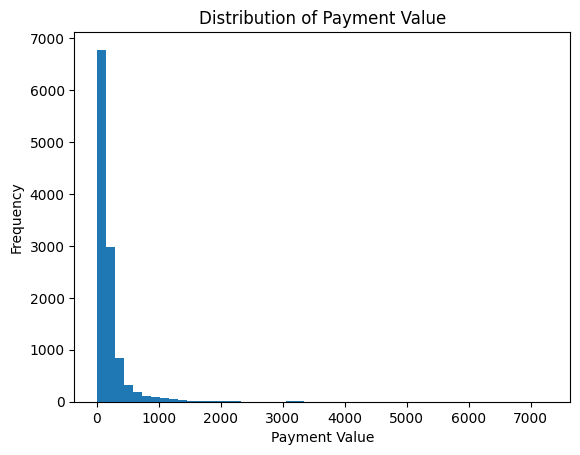

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['payment_value'], bins=50)
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Value')
plt.show()


Ta thấy biểu đồ lệch phải (nhiều đơn hàng giá trị thấp, ít đơn giá trị cao)

##### Mối quan hệ giữa payment_value và mức độ hài lòng

<Figure size 640x480 with 0 Axes>

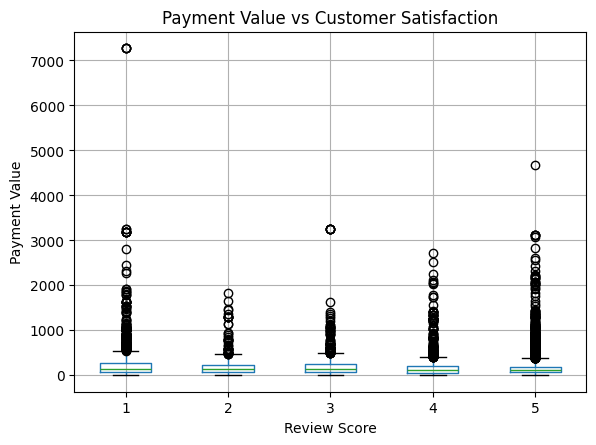

In [14]:
plt.figure()
df.boxplot(column='payment_value', by='review_score')
plt.xlabel('Review Score')
plt.ylabel('Payment Value')
plt.title('Payment Value vs Customer Satisfaction')
plt.suptitle('')
plt.show()


So sánh giá trị thanh toán giữa:

- Khách hàng hài lòng

- Khách hàng không hài lòng

##### Phân tích trung bình theo mức độ hài lòng

In [15]:
df.groupby('review_score')['payment_value'].mean()


review_score
1    261.078502
2    210.084793
3    220.665805
4    190.144201
5    173.565430
Name: payment_value, dtype: float64

Khách hàng có đơn hàng giá trị cao thường:

- Kỳ vọng cao hơn

- Dễ không hài lòng hơn nếu giao hàng không tốt

##### Nhận xét: 
Giá trị thanh toán có phân bố lệch phải, cho thấy phần lớn đơn hàng có giá trị thấp. Tuy nhiên, các đơn hàng có giá trị cao có xu hướng đánh giá khắt khe hơn, làm cho payment_value trở thành đặc trưng có ảnh hưởng mạnh nhất đến mức độ hài lòng của khách hàng.

## 3.2 Thời gian và trạng thái giao hàng ảnh hưởng như thế nào đến mức độ hài lòng ?



- Dựa trên các biến:

    arrival_days

    arrival_delivery_rate

    arrival_status

    shipping_delivery_rate

- Xác định vai trò của việc giao hàng đúng hạn và nhanh chóng đối với trải nghiệm khách hàng

##### Thống kê mô tả các biến giao hàng

In [16]:
delivery_features = [
    'arrival_delivery_rate',
    'arrival_days',
    'shipping_delivery_rate'
]

df[delivery_features].describe()


,arrival_days
count,11542.000000
mean,10.046439
std,7.804823
min,0.000000
25%,5.000000
50%,8.000000
75%,12.000000
max,60.000000


##### Phân bố thời gian giao hàng

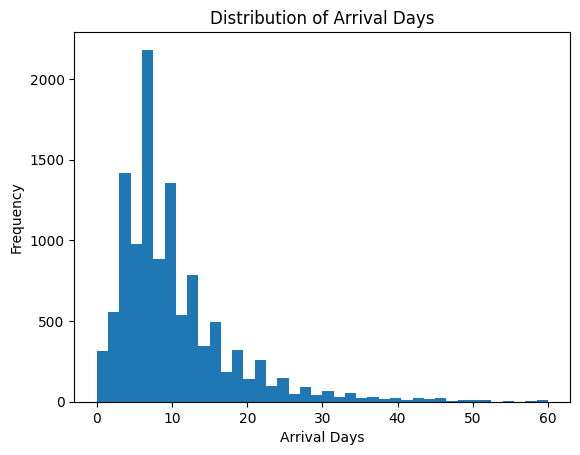

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['arrival_days'], bins=40)
plt.xlabel('Arrival Days')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Days')
plt.show()


- Giao hàng càng nhanh → kỳ vọng hài lòng cao hơn

- Phân bố lệch phải cho thấy có đơn giao rất trễ

##### Phân tích trạng thái giao hàng đúng hạn

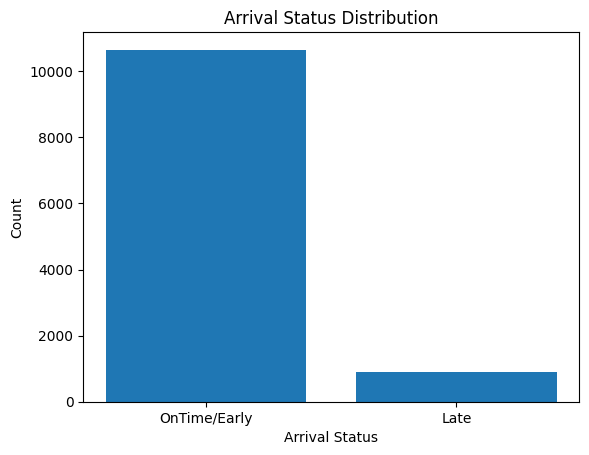

In [18]:
arrival_status_counts = df['arrival_status'].value_counts()

plt.figure()
plt.bar(arrival_status_counts.index,
        arrival_status_counts.values)
plt.xlabel('Arrival Status')
plt.ylabel('Count')
plt.title('Arrival Status Distribution')
plt.show()



- So sánh số lượng đơn giao đúng hạn và trễ

- Biến nhị phân nhưng ảnh hưởng lớn đến sự hài lòng

##### Mối quan hệ giữa trạng thái giao hàng và mức độ hài lòng

In [19]:
arrival_vs_review = pd.crosstab(
    df['arrival_status'],
    df['review_score'],
    normalize='index'
)

arrival_vs_review


review_score,1,2,3,4,5
arrival_status,,,,,
Late,0.470258,0.079686,0.104377,0.113356,0.232323
OnTime/Early,0.161206,0.047789,0.078115,0.152756,0.560135


Tỷ lệ hài lòng cao hơn rõ rệt với đơn giao đúng hạn

##### Phân tích hiệu suất giao hàng ( arrival_delivery_rate )

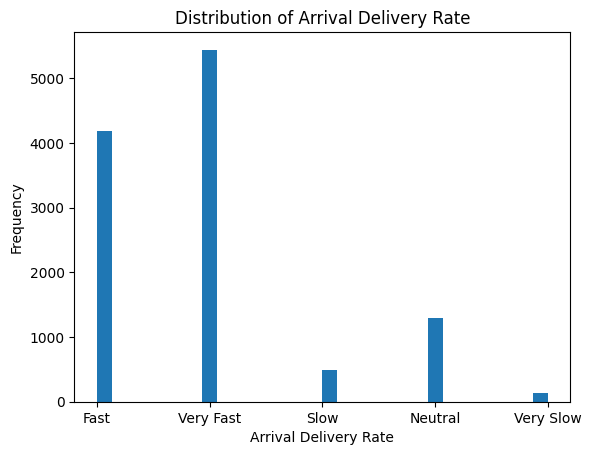

In [20]:
plt.figure()
plt.hist(df['arrival_delivery_rate'], bins=30)
plt.xlabel('Arrival Delivery Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delivery Rate')
plt.show()


##### Phân tích shipping_delivery_rate

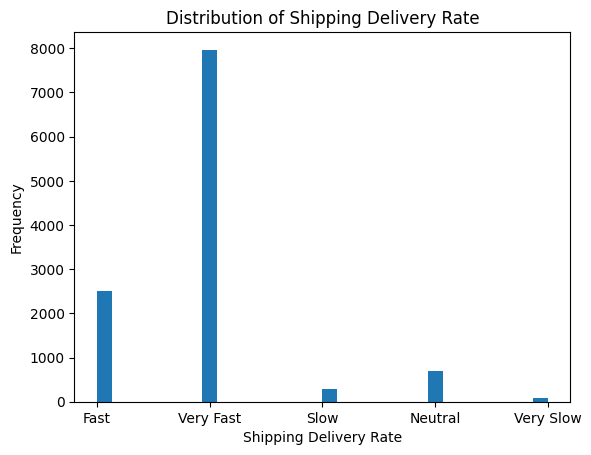

In [21]:
plt.figure()
plt.hist(df['shipping_delivery_rate'], bins=30)
plt.xlabel('Shipping Delivery Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Shipping Delivery Rate')
plt.show()


- Hiệu suất vận chuyển ổn định → trải nghiệm tốt

- Ảnh hưởng thấp hơn arrival_delivery_rate nhưng vẫn quan trọng

##### Nhận xét :
Nhóm đặc trưng liên quan đến giao hàng cho thấy mối quan hệ rõ rệt với mức độ hài lòng của khách hàng. Các đơn hàng giao đúng hạn, thời gian giao ngắn và hiệu suất giao hàng cao có tỷ lệ hài lòng cao hơn đáng kể. Điều này lý giải vì sao các biến giao hàng chiếm tỷ trọng lớn trong Feature Importance của mô hình Random Forest.

## 3.3 Phí vận chuyển có làm giảm mức độ hài lòng của khách hàng hay không ?


- Dựa trên EDA của freight_value

- So sánh mức độ hài lòng giữa các đơn hàng có phí vận chuyển cao và thấp

##### Thống kê mô tả phí vận chuyển

In [22]:
df['freight_value'].describe()

count    11542.000000
mean        21.955784
std         18.625141
min          0.000000
25%         12.900000
50%         18.230000
75%         23.340000
max        375.280000
Name: freight_value, dtype: float64

##### Phân bố phí vận chuyển

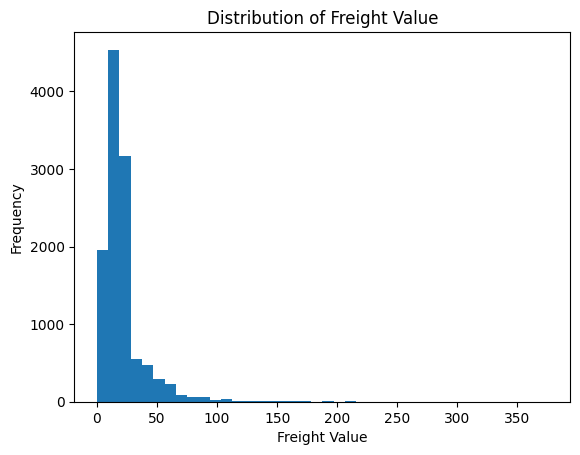

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['freight_value'], bins=40)
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.title('Distribution of Freight Value')
plt.show()


- Phí vận chuyển thường lệch phải

- Một số đơn có phí vận chuyển rất cao → dễ gây không hài lòng

##### Boxplot phát hiện phí vận chuyển bất thường

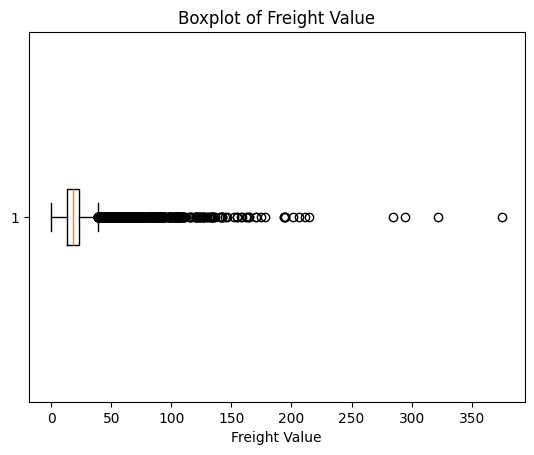

In [24]:
plt.figure()
plt.boxplot(df['freight_value'], vert=False)
plt.xlabel('Freight Value')
plt.title('Boxplot of Freight Value')
plt.show()


- Các outliers thể hiện đơn hàng có chi phí vận chuyển cao bất thường

- Đây là yếu tố tác động tiêu cực đến trải nghiệm khách hàng

##### Mối quan hệ giữa freight_value và mức độ hài lòng

<Figure size 640x480 with 0 Axes>

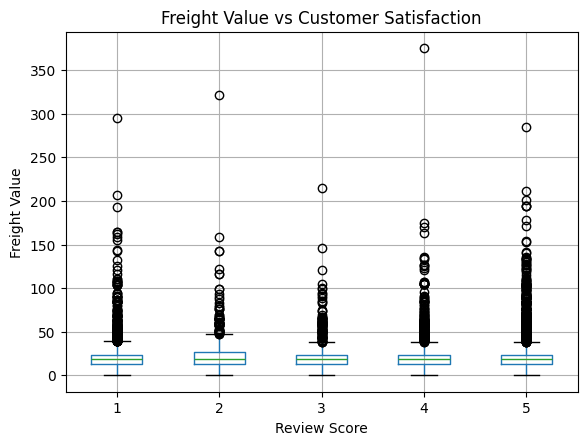

In [25]:
plt.figure()
df.boxplot(column='freight_value', by='review_score')
plt.xlabel('Review Score')
plt.ylabel('Freight Value')
plt.title('Freight Value vs Customer Satisfaction')
plt.suptitle('')
plt.show()


Nhóm không hài lòng thường có:

- Phí vận chuyển cao hơn

- Độ phân tán lớn hơn

#### Phân tích trung bình phí vận chuyển theo mức độ hài lòng

In [26]:
df.groupby('review_score')['freight_value'].mean()


review_score
1    22.518717
2    23.843776
3    21.868227
4    22.915041
5    21.328202
Name: freight_value, dtype: float64

Phí vận chuyển cao có xu hướng làm giảm mức độ hài lòng

##### Nhận xét: 
Phí vận chuyển có phân bố lệch phải với một số giá trị cao bất thường. Phân tích cho thấy các đơn hàng có phí vận chuyển cao có xu hướng nhận đánh giá thấp hơn. Tuy nhiên, mức độ ảnh hưởng của freight_value vẫn thấp hơn so với các yếu tố liên quan đến thời gian và trạng thái giao hàng.

## 3.4 Hình thức thanh toán có ảnh hưởng đến sự hài lòng của khách hàng ?


- Dựa trên biến payment_type

- So sánh mức độ hài lòng giữa các hình thức thanh toán như thẻ tín dụng, thẻ ghi nợ, voucher và boleto

##### Biểu đồ phân bố hình thức thanh toán

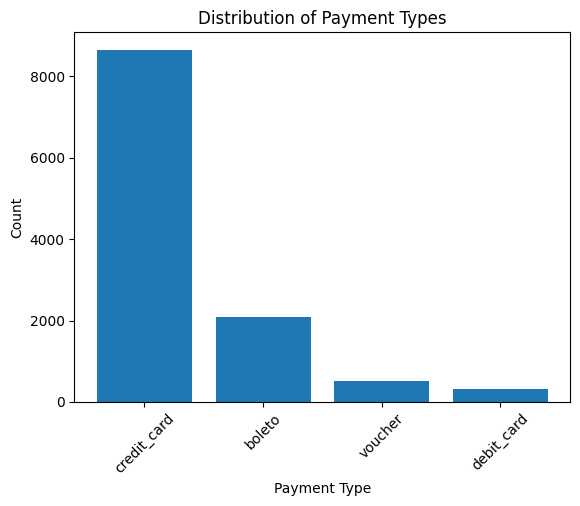

In [27]:
import matplotlib.pyplot as plt

payment_counts = df['payment_type'].value_counts()

plt.figure()
plt.bar(payment_counts.index, payment_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=45)
plt.show()



Khách hàng sử dụng thẻ tín dụng chiếm tỷ lệ lớn.

##### Mối quan hệ giữa payment_type và mức độ hài lòng

In [28]:
payment_vs_review = pd.crosstab(
    df['payment_type'],
    df['review_score'],
    normalize='index'
)

payment_vs_review


review_score,1,2,3,4,5
payment_type,,,,,
boleto,0.181643,0.049015,0.085536,0.160019,0.523787
credit_card,0.188620,0.049728,0.078293,0.145600,0.537759
debit_card,0.154341,0.057878,0.080386,0.135048,0.572347
voucher,0.157058,0.059642,0.089463,0.186879,0.506958


Nhìn vào hàng credit_card:

- Tỷ lệ hài lòng ổn định

- Ít biến động hơn voucher / debit

##### So sánh trực quan mức độ hài lòng theo hình thức thanh toán

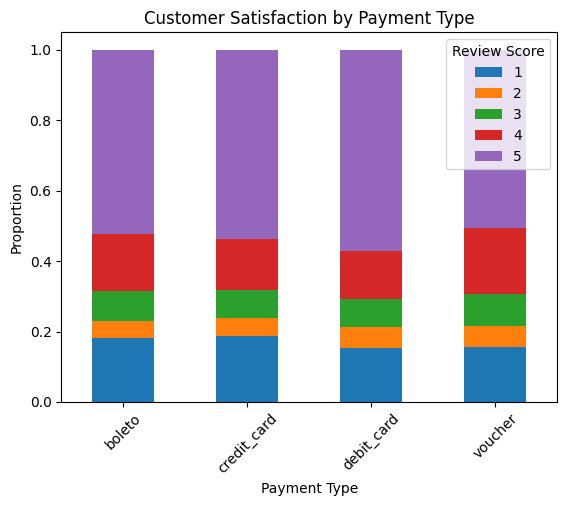

In [29]:
import matplotlib.pyplot as plt

payment_vs_review.plot(kind='bar', stacked=True)
plt.xlabel('Payment Type')
plt.ylabel('Proportion')
plt.title('Customer Satisfaction by Payment Type')
plt.xticks(rotation=45)
plt.legend(title='Review Score')
plt.show()




##### Nhận xét: 
Hình thức thanh toán có ảnh hưởng đến mức độ hài lòng của khách hàng. Các hình thức thanh toán điện tử như thẻ tín dụng và thẻ ghi nợ có tỷ lệ hài lòng cao và ổn định hơn so với voucher và boleto. Tuy nhiên, mức độ ảnh hưởng của hình thức thanh toán vẫn thấp hơn các yếu tố liên quan đến giao hàng.

## 3.5 Mức độ chi tiết của mô tả sản phẩm có giúp cải thiện sự hài lòng của khách hàng ?

- Dựa trên biến product_description_lenght

- Kiểm tra liệu mô tả sản phẩm dài và chi tiết có giúp giảm kỳ vọng sai lệch hay không

##### Thống kê mô tả độ dài mô tả sản phẩm

In [30]:
df['product_description_lenght'].describe()

count    11542.000000
mean       815.096084
std        646.159504
min          4.000000
25%        366.000000
50%        634.000000
75%       1031.000000
max       3985.000000
Name: product_description_lenght, dtype: float64

##### Phân bố độ dài mô tả sản phẩm

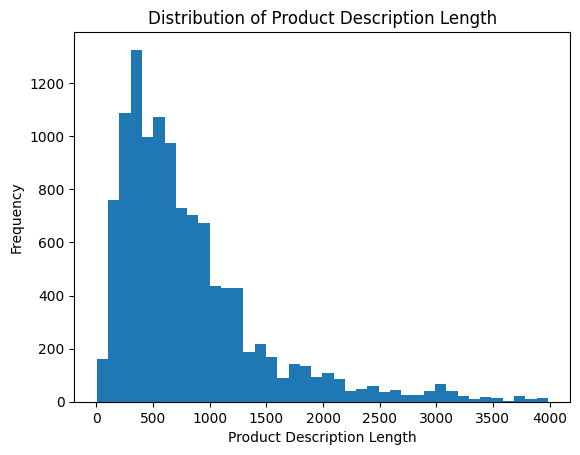

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['product_description_lenght'], bins=40)
plt.xlabel('Product Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Product Description Length')
plt.show()


- Nhiều sản phẩm có mô tả ngắn

- Một số sản phẩm có mô tả rất dài → thông tin chi tiết

##### Mối quan hệ giữa độ dài mô tả và mức độ hài lòng

So sánh trung bình theo mức độ hài lòng

In [32]:
df.groupby('review_score')['product_description_lenght'].mean()


review_score
1    819.334738
2    772.725862
3    821.184865
4    833.291088
5    811.604730
Name: product_description_lenght, dtype: float64

Nhóm Satisfied thường có: Mô tả dài hơn trung bình

<Figure size 640x480 with 0 Axes>

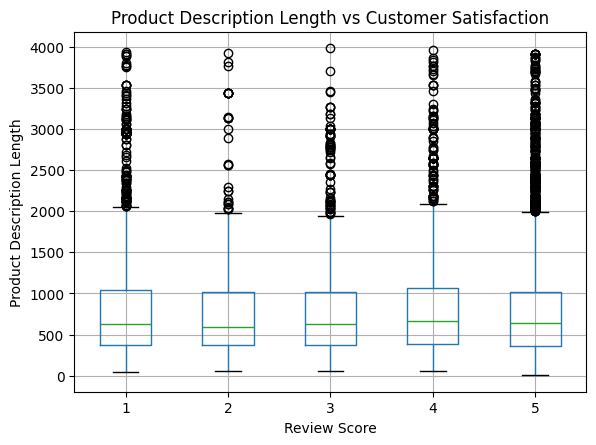

In [33]:
plt.figure()
df.boxplot(
    column='product_description_lenght',
    by='review_score'
)
plt.xlabel('Review Score')
plt.ylabel('Product Description Length')
plt.title('Product Description Length vs Customer Satisfaction')
plt.suptitle('')
plt.show()


- Nhóm hài lòng có phân bố độ dài mô tả cao hơn

- Độ phân tán thấp hơn → kỳ vọng rõ ràng

##### Nhận xét: 
Độ dài mô tả sản phẩm có ảnh hưởng tích cực đến mức độ hài lòng của khách hàng. Các sản phẩm có mô tả chi tiết giúp giảm kỳ vọng sai lệch, từ đó nâng cao trải nghiệm mua sắm. Nhóm khách hàng hài lòng có xu hướng mua các sản phẩm có mô tả dài hơn.

## 3.6 Trạng thái hoàn tất đơn hàng ảnh hưởng như thế nào đến đánh giá của khách hàng ?



- Dựa trên biến order_status

- So sánh mức độ hài lòng giữa các đơn hàng đã giao thành công và chưa hoàn tất

##### Phân bố trạng thái đơn hàng

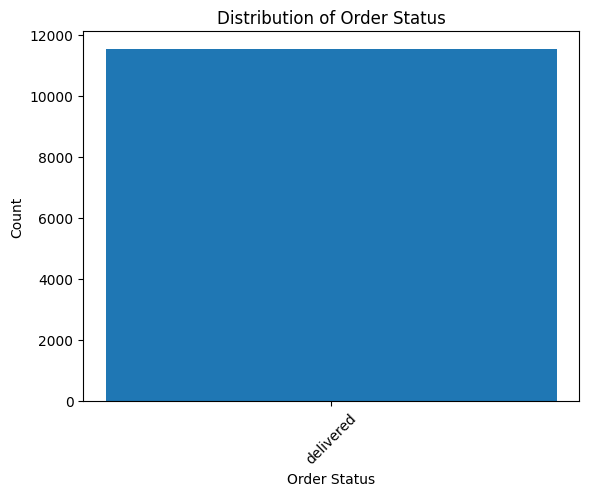

In [34]:
import matplotlib.pyplot as plt

status_counts = df['order_status'].value_counts()

plt.figure()
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Distribution of Order Status')
plt.xticks(rotation=45)
plt.show()

- delivered chiếm đa số

- Các trạng thái khác phản ánh đơn hàng chưa hoàn tất

##### Mối quan hệ giữa trạng thái đơn hàng và mức độ hài lòng

In [35]:
status_vs_review = pd.crosstab(
    df['order_status'],
    df['review_score'],
    normalize='index'
)

status_vs_review


review_score,1,2,3,4,5
order_status,,,,,
delivered,0.185063,0.050251,0.080142,0.149714,0.534829


##### Biểu đồ cột chồng thể hiện mức độ hài lòng

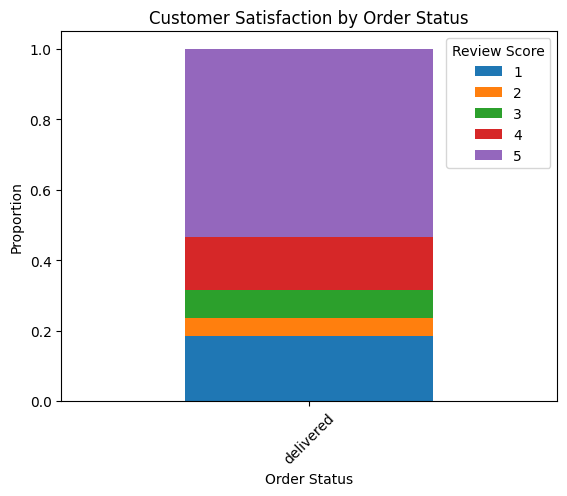

In [36]:
status_vs_review.plot(kind='bar', stacked=True)
plt.xlabel('Order Status')
plt.ylabel('Proportion')
plt.title('Customer Satisfaction by Order Status')
plt.legend(title='Review Score')
plt.xticks(rotation=45)
plt.show()


- delivered → tỷ lệ Satisfied rất cao

- Các trạng thái khác → Not Satisfied cao

##### Nhận xét: 
Trạng thái đơn hàng có ảnh hưởng rõ rệt đến mức độ hài lòng của khách hàng. Các đơn hàng được giao thành công có tỷ lệ hài lòng cao hơn đáng kể so với các đơn hàng chưa hoàn tất. Biến order_status giúp mô hình phân biệt rõ giữa trải nghiệm mua sắm hoàn chỉnh và không hoàn chỉnh.

# 4. Các kỹ thuật Khai Phá Dữ Liệu

## 4.1. Mô hình phân lớp (Classification)

### 4.1.1. Loại bỏ các tính năng không cần thiết 

In [37]:
df.drop([
    'customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state',
    'order_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date',
    'review_id', 'review_comment_title', 'review_comment_message',
    'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
    'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix',
    'seller_city', 'seller_state', 'shipping_limit_date',
    'product_category_name', 'product_category_name_english', 'product_category',
    'product_weight_g', 'product_name_lenght', 'product_vol_cm3'
], axis=1, inplace=True, errors='ignore')


<Axes: >

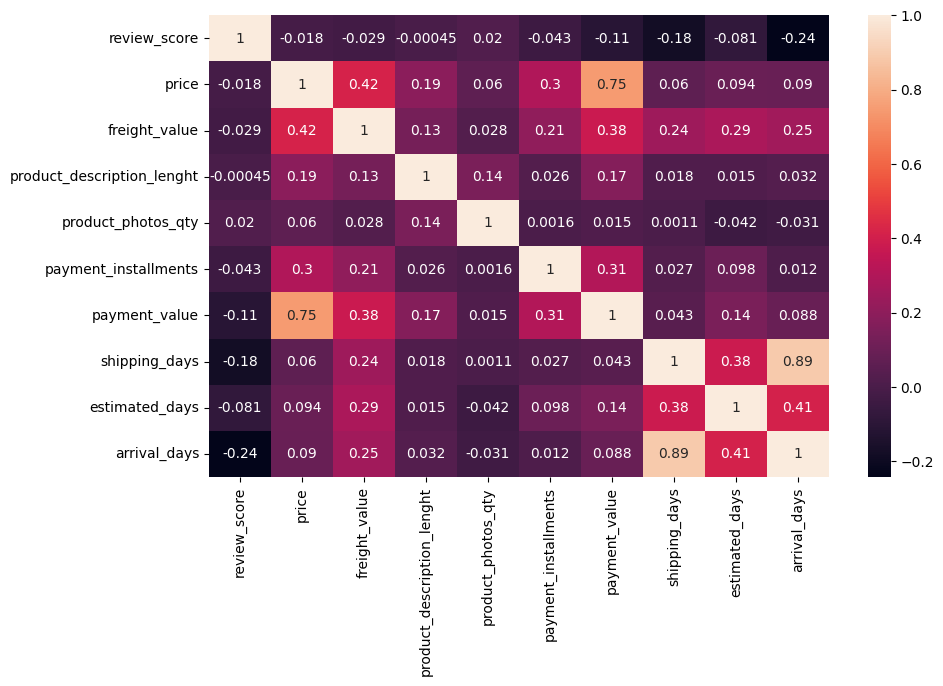

In [38]:
# Chỉ chọn các cột số để tính tương quan.
import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize= [10, 6])
sns.heatmap(numerical_df.corr(), annot=True)

Loại bỏ các đặc điểm có hệ số tương quan cao

In [39]:
df.drop(['shipping_days', 'price'], axis= 1, inplace= True)

In [40]:
df.head()

,order_status,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,arrival_status,estimated_days,arrival_days,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,delivered,5,22.25,407.0,1.0,credit_card,8,252.25,OnTime/Early,16,11,Neutral,Fast,Fast
1,delivered,5,17.03,1646.0,5.0,credit_card,2,136.93,OnTime/Early,16,3,Neutral,Very Fast,Very Fast
2,delivered,5,19.49,192.0,1.0,credit_card,1,62.39,OnTime/Early,24,11,Neutral,Fast,Very Fast
3,delivered,1,115.77,1128.0,1.0,credit_card,6,315.75,OnTime/Early,38,31,Slow,Slow,Fast
4,delivered,2,13.47,719.0,6.0,boleto,1,50.92,OnTime/Early,22,8,Neutral,Fast,Very Fast


Chuyển đổi Điểm đánh giá từ Đa lớp sang Nhị phân

In [41]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

df['review_score'] = df['review_score'].map(encoded_class)

Chia dữ liệu thành các tính năng đầu vào và biến mục tiêu

In [42]:
X = df.drop('review_score', axis=1)
y = df['review_score']

input
X: toàn bộ các cột còn lại ngoài review_score

- payment_value – Giá trị thanh toán

- arrival_delivery_rate – Tỷ lệ giao hàng đúng hạn

- arrival_status_OnTime/Early – Trạng thái giao hàng đúng hạn / sớm

- arrival_days – Số ngày giao hàng thực tế

- shipping_delivery_rate – Hiệu suất vận chuyển

- freight_value – Phí vận chuyển

- payment_type_credit_card – Thanh toán bằng thẻ tín dụng

- product_description_lenght – Độ dài mô tả sản phẩm

- order_status_delivered – Trạng thái đơn hàng đã giao

- estimated_delivery_rate – Tỷ lệ giao hàng theo dự kiến

- payment_installments – Số lần trả góp

- product_photos_qty – Số lượng hình ảnh sản phẩm

- payment_type_voucher – Thanh toán bằng voucher

- estimated_days – Số ngày giao hàng dự kiến

- payment_type_debit_card – Thanh toán bằng thẻ ghi nợ

Output
y: mức độ hài lòng (review_score) cần dự đoán

### 4.1.2. Xử lý các đặc trưng phân loại 

Xử lý các đặc trưng thứ tự (Mã hóa nhãn)

In [43]:
labels = {'Very Slow' : 1, 
          'Slow' : 2, 
          'Neutral' : 3, 
          'Fast' : 4, 
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

Xử lý các đặc trưng danh nghĩa ( One Hot Encoding )

Chuyển các biến phân loại (payment_type, order_status, arrival_status)
sang dạng số bằng One-Hot Encoding

drop_first=True giúp:

Tránh đa cộng tuyến

Giảm số chiều dữ liệu

In [44]:
X = pd.get_dummies(X, drop_first=True)

Chia dữ liệu thành Train & Test

- 80% dữ liệu để huấn luyện

- 20% dữ liệu để đánh giá

- random_state=42 giúp kết quả có thể tái lập

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)


Lựa chọn tính năng

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)

x_train_imputed = imputer.transform(x_train)
x_test_imputed = imputer.transform(x_test)

fs = SelectKBest(mutual_info_classif, k='all')
fs.fit(x_train_imputed, y_train)
x_train_fs = fs.transform(x_train_imputed)
x_test_fs = fs.transform(x_test_imputed)

Vẽ các tính năng theo mức độ quan trọng

<Axes: >

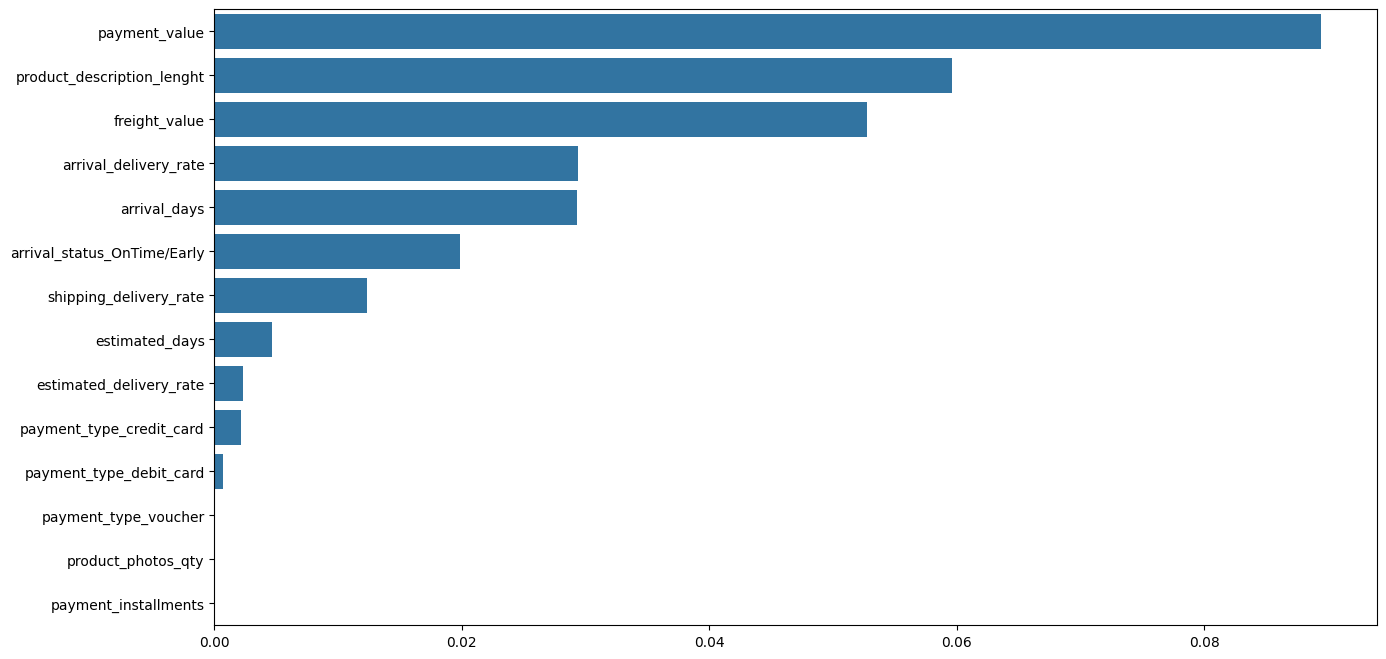

In [47]:
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

features = []
for i in range(min(15, len(indices))):
    features.append(X.columns[indices[i]])

sns.barplot(x = fs.scores_[indices[range(min(15, len(indices)))]], y = features)

Chọn 9 tính năng tốt nhất để dự đoán sự hài lòng của khách hàng 

In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)

x_train_imputed = imputer.transform(x_train)
x_test_imputed = imputer.transform(x_test)

fs = SelectKBest(mutual_info_classif, k=9)
fs.fit(x_train_imputed, y_train)
x_train_fs = fs.transform(x_train_imputed)
x_test_fs = fs.transform(x_test_imputed)
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

In [49]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

Tính năng mở rộng

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean= False)

x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

Chuyển đổi mảng thành khung dữ liệu

In [51]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

Xử lý mất cân bằng và Kiểm tra tỷ lệ mất cân bằng

In [52]:
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

review_score
Satisfied        68.45
Not Satisfied    31.55
Name: count, dtype: float64

Sử dụng SMOTE để xử lý sự mất cân bằng

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

### 4.1.3 Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lr.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lr.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.65      0.43      0.52      6320
    Satisfied       0.57      0.77      0.66      6320

     accuracy                           0.60     12640
    macro avg       0.61      0.60      0.59     12640
 weighted avg       0.61      0.60      0.59     12640

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.46      0.45      0.45       728
    Satisfied       0.75      0.76      0.75      1581

     accuracy                           0.66      2309
    macro avg       0.60      0.60      0.60      2309
 weighted avg       0.66      0.66      0.66      2309



Nhận xét:

- Logistic Regression cho kết quả ổn định

- Tốt hơn Naive Bayes và KNN

- Nhưng kém hơn Random Forest

Nguyên nhân:

- Quan hệ giữa đặc trưng và mức độ hài lòng không hoàn toàn tuyến tính

- Các yếu tố giao hàng, giá trị đơn hàng tương tác phức tạp

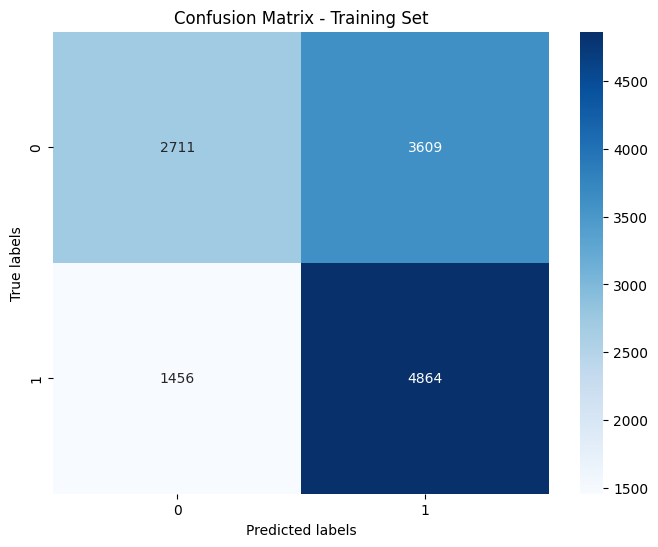

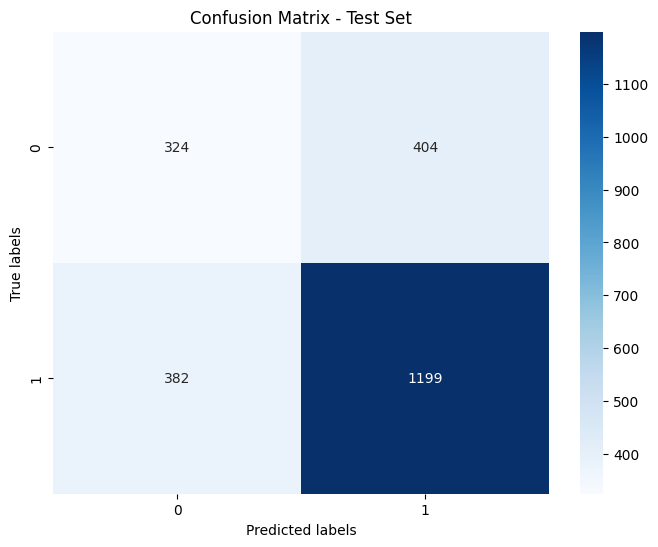

In [55]:
cm_train = confusion_matrix(y_train_resampled, lr.predict(x_train_resampled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Set')
plt.show()

cm_test = confusion_matrix(y_test, lr.predict(x_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

### 4.1.4 KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, knn.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, knn.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.80      0.91      0.85      6320
    Satisfied       0.90      0.78      0.83      6320

     accuracy                           0.84     12640
    macro avg       0.85      0.84      0.84     12640
 weighted avg       0.85      0.84      0.84     12640

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.44      0.58      0.50       728
    Satisfied       0.78      0.67      0.72      1581

     accuracy                           0.64      2309
    macro avg       0.61      0.62      0.61      2309
 weighted avg       0.67      0.64      0.65      2309



Nhận xét:

- KNN cho kết quả khá, nhưng không vượt trội so với Random Forest

Hiệu năng phụ thuộc mạnh vào:

- Giá trị k

- Thang đo của các đặc trưng

Hạn chế:

- Dữ liệu có nhiều đặc trưng sau One-Hot Encoding

- Khoảng cách giữa các điểm kém ý nghĩa trong không gian chiều cao

- KNN nhạy với nhiễu và outliers

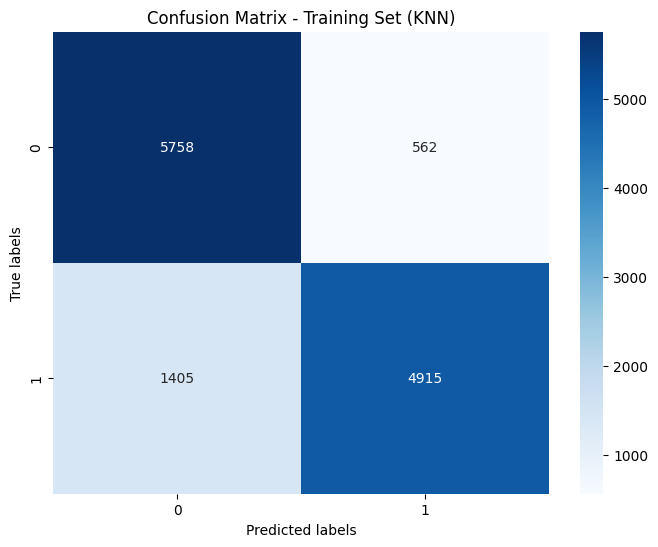

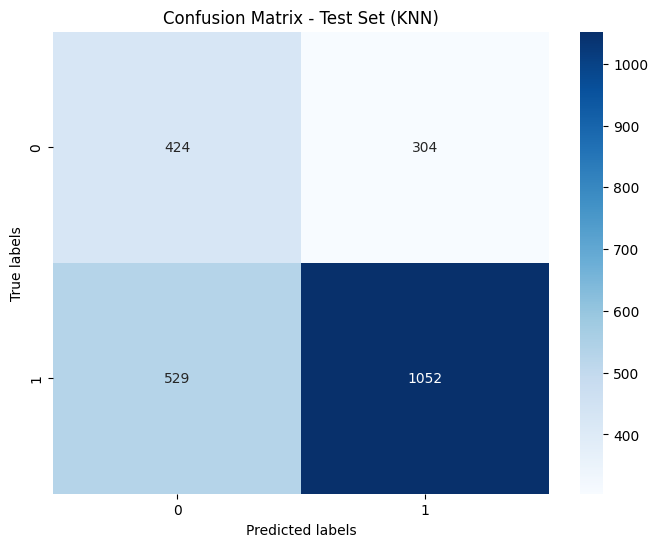

In [57]:
cm_train_knn = confusion_matrix(y_train_resampled, knn.predict(x_train_resampled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Set (KNN)')
plt.show()

cm_test_knn = confusion_matrix(y_test, knn.predict(x_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set (KNN)')
plt.show()

### 4.1.5 Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, dt.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, dt.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       1.00      1.00      1.00      6320
    Satisfied       1.00      1.00      1.00      6320

     accuracy                           1.00     12640
    macro avg       1.00      1.00      1.00     12640
 weighted avg       1.00      1.00      1.00     12640

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.52      0.62      0.57       728
    Satisfied       0.81      0.74      0.77      1581

     accuracy                           0.70      2309
    macro avg       0.67      0.68      0.67      2309
 weighted avg       0.72      0.70      0.71      2309



Nhận xét:

- Dễ overfitting nếu không giới hạn độ sâu

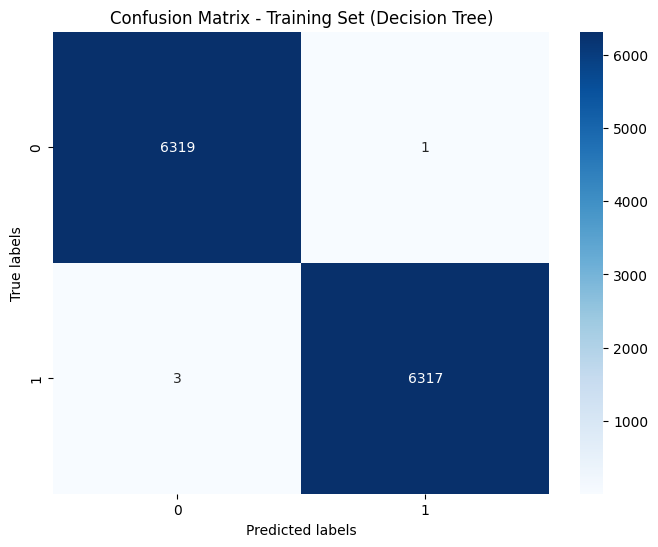

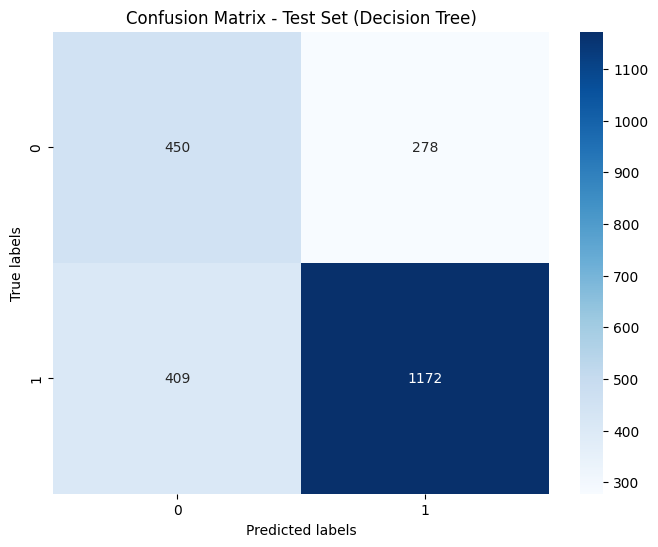

In [59]:
cm_train_dt = confusion_matrix(y_train_resampled, dt.predict(x_train_resampled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Set (Decision Tree)')
plt.show()

cm_test_dt = confusion_matrix(y_test, dt.predict(x_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set (Decision Tree)')
plt.show()

### 4.1.6 Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, rf.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, rf.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       1.00      1.00      1.00      6320
    Satisfied       1.00      1.00      1.00      6320

     accuracy                           1.00     12640
    macro avg       1.00      1.00      1.00     12640
 weighted avg       1.00      1.00      1.00     12640

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.67      0.57      0.61       728
    Satisfied       0.81      0.87      0.84      1581

     accuracy                           0.77      2309
    macro avg       0.74      0.72      0.73      2309
 weighted avg       0.77      0.77      0.77      2309



Nhận xét:

- Giảm overfitting

- Xử lý tốt dữ liệu phi tuyến

Hoạt động tốt với:

- Outliers

- Dữ liệu nhiều đặc trưng

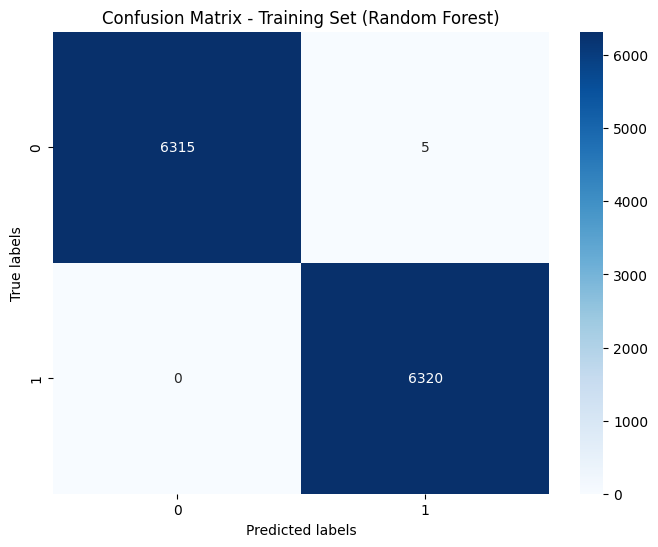

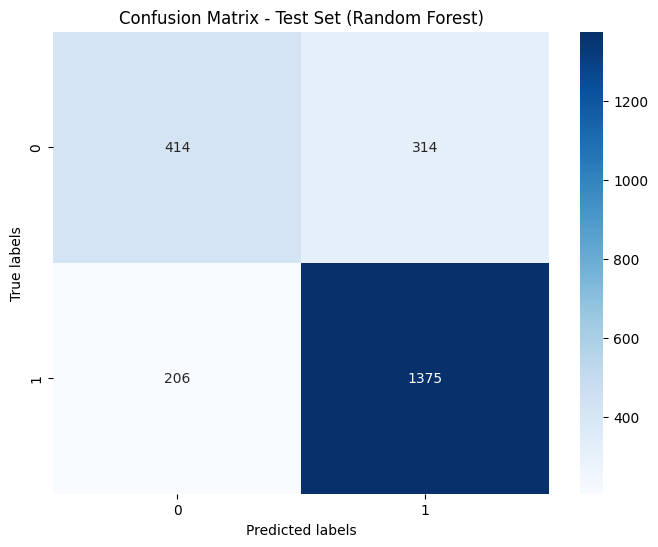

In [61]:
cm_train_rf = confusion_matrix(y_train_resampled, rf.predict(x_train_resampled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Set (Random Forest)')
plt.show()

cm_test_rf = confusion_matrix(y_test, rf.predict(x_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set (Random Forest)')
plt.show()


### 4.1.7 Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(x_train_resampled, y_train_resampled)
y_pred = nb.predict(x_test_scaled)

print('Evaluation on Training \n', classification_report(y_train_resampled, nb.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.68      0.29      0.41      6320
    Satisfied       0.55      0.86      0.67      6320

     accuracy                           0.58     12640
    macro avg       0.62      0.58      0.54     12640
 weighted avg       0.62      0.58      0.54     12640

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.49      0.31      0.38       728
    Satisfied       0.73      0.85      0.78      1581

     accuracy                           0.68      2309
    macro avg       0.61      0.58      0.58      2309
 weighted avg       0.65      0.68      0.66      2309



Hiệu quả không cao do:

- Các đặc trưng thực tế (giá, thời gian giao hàng) có tương quan

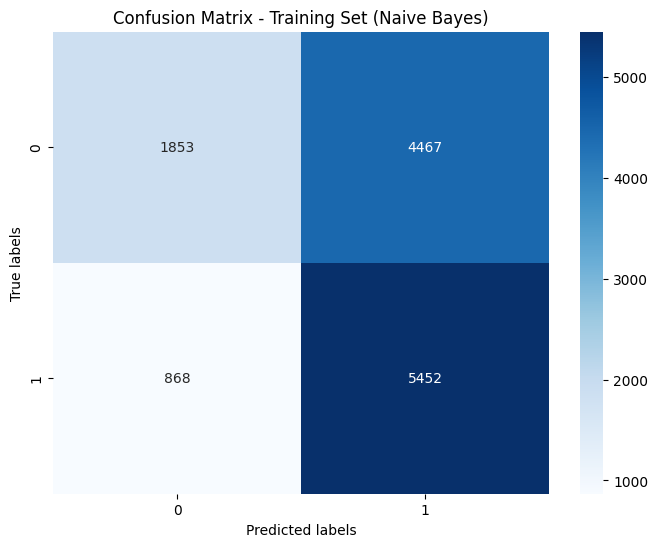

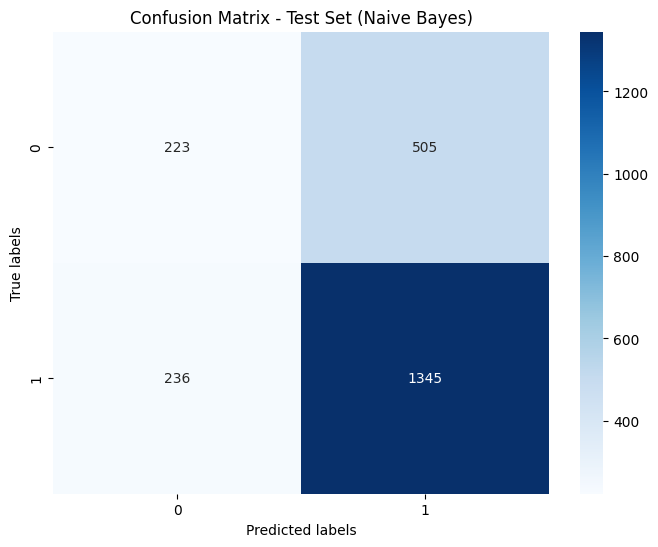

In [63]:
cm_train_nb = confusion_matrix(y_train_resampled, nb.predict(x_train_resampled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Set (Naive Bayes)')
plt.show()

cm_test_nb = confusion_matrix(y_test, nb.predict(x_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set (Naive Bayes)')
plt.show()

## 4.2. Đánh giá mô hình Classification 

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Dictionary to store all classification results
clf_results = {}

# Models list
models_dict = {
    'Logistic Regression': lr,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Naive Bayes': nb
}

# Evaluate each model
for model_name, model in models_dict.items():
    # Use x_train_resampled (after SMOTE) for training predictions
    y_pred_train = model.predict(x_train_resampled)
    y_pred_test = model.predict(x_test_scaled)
    
    # Get probabilities for ROC-AUC if available
    if hasattr(model, 'predict_proba'):
        y_pred_train_proba = model.predict_proba(x_train_resampled)[:, 1]
        y_pred_test_proba = model.predict_proba(x_test_scaled)[:, 1]
    else:
        y_pred_train_proba = None
        y_pred_test_proba = None
    
    clf_results[model_name] = {
        'Train Accuracy': accuracy_score(y_train_resampled, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Train Precision': precision_score(y_train_resampled, y_pred_train, average='weighted', zero_division=0),
        'Test Precision': precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
        'Train Recall': recall_score(y_train_resampled, y_pred_train, average='weighted', zero_division=0),
        'Test Recall': recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
        'Train F1': f1_score(y_train_resampled, y_pred_train, average='weighted', zero_division=0),
        'Test F1': f1_score(y_test, y_pred_test, average='weighted', zero_division=0),
    }

# Create results DataFrame
clf_results_df = pd.DataFrame(clf_results).T
print("="*90)
print(" CLASSIFICATION MODELS - COMPREHENSIVE EVALUATION SUMMARY")
print("="*90)
print(clf_results_df.round(4).to_string())
print("\n")

 CLASSIFICATION MODELS - COMPREHENSIVE EVALUATION SUMMARY
                     Train Accuracy  Test Accuracy  Train Precision  Test Precision  Train Recall  Test Recall  Train F1  Test F1
Logistic Regression          0.5993         0.6596           0.6123          0.6568        0.5993       0.6596    0.5873   0.6582
KNN                          0.8444         0.6392           0.8506          0.6715        0.8444       0.6392    0.8437   0.6496
Decision Tree                0.9997         0.7025           0.9997          0.7186        0.9997       0.7025    0.9997   0.7083
Random Forest                0.9996         0.7748           0.9996          0.7679        0.9996       0.7748    0.9996   0.7695
Naive Bayes                  0.5779         0.6791           0.6153          0.6510        0.5779       0.6791    0.5407   0.6553




Trong bài toán dự đoán mức độ hài lòng của khách hàng, nhiều mô hình phân lớp đã được xây dựng và so sánh, bao gồm Naive Bayes, KNN, Logistic Regression, Decision Tree và Random Forest. Mỗi mô hình có đặc điểm và mức độ phù hợp khác nhau đối với dữ liệu.

Naive Bayes là mô hình đơn giản, huấn luyện nhanh và được sử dụng làm mô hình baseline. Tuy nhiên, do giả định các đặc trưng độc lập với nhau trong khi dữ liệu thực tế có nhiều mối tương quan (giữa giá trị đơn hàng, thời gian giao hàng, phí vận chuyển), nên hiệu quả của mô hình này không cao.

K-Nearest Neighbors (KNN) dự đoán dựa trên khoảng cách giữa các điểm dữ liệu. Mô hình này cho kết quả ở mức trung bình, nhưng kém hiệu quả khi số chiều dữ liệu tăng cao sau bước One-Hot Encoding. Ngoài ra, KNN nhạy cảm với nhiễu và outliers, khiến khả năng tổng quát hóa không tốt trong bài toán này.

Logistic Regression cho kết quả ổn định và dễ diễn giải, phù hợp với bài toán phân lớp nhị phân. Tuy nhiên, do mối quan hệ giữa các đặc trưng và mức độ hài lòng không hoàn toàn tuyến tính, mô hình này không khai thác hết được cấu trúc dữ liệu, nên hiệu quả vẫn thấp hơn các mô hình dựa trên cây.

Decision Tree có khả năng mô hình hóa các mối quan hệ phi tuyến và dễ giải thích. Tuy nhiên, mô hình này dễ bị overfitting nếu không được kiểm soát độ sâu, dẫn đến hiệu quả chưa thực sự ổn định trên tập kiểm tra.

Random Forest là mô hình cho kết quả tốt nhất trong bài. Nhờ kết hợp nhiều cây quyết định, Random Forest giảm được hiện tượng overfitting, xử lý tốt dữ liệu có nhiễu và mô hình hóa hiệu quả các mối quan hệ phức tạp giữa các đặc trưng. Ngoài ra, mô hình này còn cung cấp thông tin Feature Importance, giúp giải thích các yếu tố ảnh hưởng đến mức độ hài lòng, trong đó các đặc trưng liên quan đến giá trị đơn hàng và hiệu suất giao hàng đóng vai trò quan trọng nhất.

In [65]:
print("="*90)
print(" DETAILED METRICS - RANDOM FOREST (BEST MODEL)")
print("="*90)

y_pred_rf = rf.predict(x_test_scaled)
from sklearn.metrics import classification_report

print("\n CONFUSION MATRIX BREAKDOWN:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"  True Negatives (TN):  {cm_rf[0, 0]}")
print(f"  False Positives (FP): {cm_rf[0, 1]}")
print(f"  False Negatives (FN): {cm_rf[1, 0]}")
print(f"  True Positives (TP):  {cm_rf[1, 1]}")

tn, fp, fn, tp = cm_rf.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\n KEY METRICS:")
print(f"  Sensitivity (Recall):   {sensitivity:.4f} - Khả năng phát hiện khách hàng hài lòng")
print(f"  Specificity:            {specificity:.4f} - Khả năng phát hiện khách hàng không hài lòng")
print(f"  Accuracy:               {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  Precision (Weighted):   {precision_score(y_test, y_pred_rf, average='weighted', zero_division=0):.4f}")
print(f"  Recall (Weighted):      {recall_score(y_test, y_pred_rf, average='weighted', zero_division=0):.4f}")
print(f"  F1-Score (Weighted):    {f1_score(y_test, y_pred_rf, average='weighted', zero_division=0):.4f}")

print("\n CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Satisfied', 'Satisfied']))

 DETAILED METRICS - RANDOM FOREST (BEST MODEL)

 CONFUSION MATRIX BREAKDOWN:
  True Negatives (TN):  414
  False Positives (FP): 314
  False Negatives (FN): 206
  True Positives (TP):  1375

 KEY METRICS:
  Sensitivity (Recall):   0.8697 - Khả năng phát hiện khách hàng hài lòng
  Specificity:            0.5687 - Khả năng phát hiện khách hàng không hài lòng
  Accuracy:               0.7748
  Precision (Weighted):   0.7679
  Recall (Weighted):      0.7748
  F1-Score (Weighted):    0.7695

 CLASSIFICATION REPORT:
               precision    recall  f1-score   support

Not Satisfied       0.67      0.57      0.61       728
    Satisfied       0.81      0.87      0.84      1581

     accuracy                           0.77      2309
    macro avg       0.74      0.72      0.73      2309
 weighted avg       0.77      0.77      0.77      2309



Tổng kết lại việc so sánh nhiều mô hình phân lớp cho thấy Random Forest là lựa chọn phù hợp nhất cho bài toán dự đoán mức độ hài lòng của khách hàng, trong khi các mô hình còn lại đóng vai trò tham khảo và đối chứng, giúp đánh giá toàn diện hiệu quả mô hình.

### 4.2.1 SO SÁNH HIỆU QUẢ CÁC MÔ HÌNH CLASSIFICATION


 SO SÁNH HIỆU QUẢ CÁC MÔ HÌNH CLASSIFICATION

 BẢNG XẾP HẠNG (Theo Test Accuracy)
------------------------------------------------------------------------------------------
              Model  Test Accuracy  Test Precision  Test Recall  Test F1
      Random Forest       0.774794        0.767949     0.774794 0.769492
      Decision Tree       0.702469        0.718605     0.702469 0.708319
        Naive Bayes       0.679082        0.650983     0.679082 0.655299
Logistic Regression       0.659593        0.656839     0.659593 0.658158
                KNN       0.639238        0.671482     0.639238 0.649563


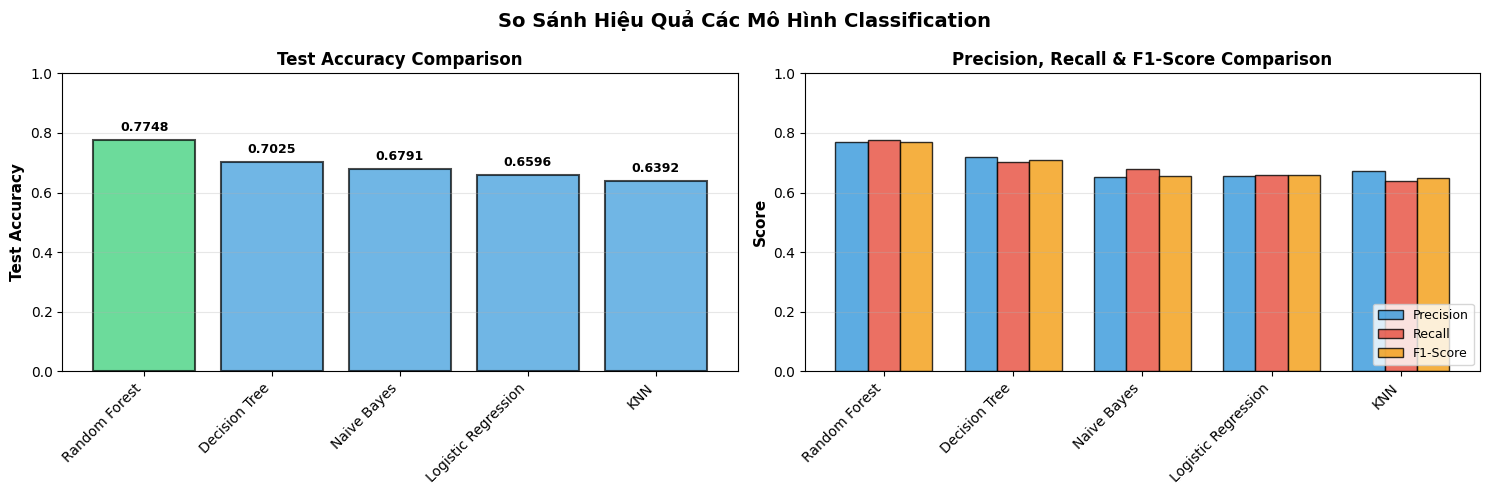


 MÔ HÌNH TỐT NHẤT: Random Forest
   Test Accuracy: 0.7748
   Test F1-Score: 0.7695



In [66]:
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*90)
print(" SO SÁNH HIỆU QUẢ CÁC MÔ HÌNH CLASSIFICATION")
print("="*90)

# Tạo DataFrame so sánh
comparison_data = {
    'Model': list(clf_results_df.index),
    'Test Accuracy': clf_results_df['Test Accuracy'].values,
    'Test Precision': clf_results_df['Test Precision'].values,
    'Test Recall': clf_results_df['Test Recall'].values,
    'Test F1': clf_results_df['Test F1'].values,
}

comparison_clf_df = pd.DataFrame(comparison_data)
comparison_clf_df = comparison_clf_df.sort_values('Test Accuracy', ascending=False)

print("\n BẢNG XẾP HẠNG (Theo Test Accuracy)")
print("-" * 90)
print(comparison_clf_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('So Sánh Hiệu Quả Các Mô Hình Classification', fontsize=14, fontweight='bold')

# Plot 1: Test Accuracy
ax1 = axes[0]
colors = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(comparison_clf_df))]
bars1 = ax1.bar(range(len(comparison_clf_df)), comparison_clf_df['Test Accuracy'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(comparison_clf_df)))
ax1.set_xticklabels(comparison_clf_df['Model'], rotation=45, ha='right')
ax1.set_ylabel('Test Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Test Accuracy Comparison', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)
for bar, val in zip(bars1, comparison_clf_df['Test Accuracy']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 2: Precision, Recall, F1
ax2 = axes[1]
x = np.arange(len(comparison_clf_df))
width = 0.25
bars2_1 = ax2.bar(x - width, comparison_clf_df['Test Precision'], width, label='Precision', alpha=0.8, color='#3498db', edgecolor='black')
bars2_2 = ax2.bar(x, comparison_clf_df['Test Recall'], width, label='Recall', alpha=0.8, color='#e74c3c', edgecolor='black')
bars2_3 = ax2.bar(x + width, comparison_clf_df['Test F1'], width, label='F1-Score', alpha=0.8, color='#f39c12', edgecolor='black')
ax2.set_xticks(x)
ax2.set_xticklabels(comparison_clf_df['Model'], rotation=45, ha='right')
ax2.set_ylabel('Score', fontsize=11, fontweight='bold')
ax2.set_title('Precision, Recall & F1-Score Comparison', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right', fontsize=9)
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*90)
print(f" MÔ HÌNH TỐT NHẤT: {comparison_clf_df.iloc[0]['Model']}")
print(f"   Test Accuracy: {comparison_clf_df.iloc[0]['Test Accuracy']:.4f}")
print(f"   Test F1-Score: {comparison_clf_df.iloc[0]['Test F1']:.4f}")
print("="*90 + "\n")

So sánh các mô hình cho thấy Random Forest đạt hiệu quả cao nhất và ổn định nhất, trong khi Logistic Regression cho kết quả ổn định ở mức trung bình, còn Naive Bayes và KNN chủ yếu dùng làm baseline.

## 4.3. Mô hình Phân cụm (Clustering)

### 4.3.1 Có thể phân khúc khách hàng thương mại điện tử thành các nhóm khác nhau dựa trên hành vi chi tiêu, hình thức thanh toán và mức độ hài lòng hay không?

Bước 1: Kiểm tra dữ liệu
Sẽ sử dụng 11 cột có sẵn

Các biến cho phân cụm: ['payment_value', 'freight_value', 'payment_installments', 'product_photos_qty', 'product_description_lenght', 'review_score']

Missing values trước khi xử lý:
payment_value                 0
freight_value                 0
payment_installments          0
product_photos_qty            0
product_description_lenght    0
review_score                  0
dtype: int64

Missing values sau khi xử lý:
payment_value                 0
freight_value                 0
payment_installments          0
product_photos_qty            0
product_description_lenght    0
review_score                  0
dtype: int64

Bước 2: Xử lý biến phân loại
Xử lý one-hot encoding cho: ['payment_type', 'order_status']

Kích thước cluster_df: (11542, 9)
Các cột trong cluster_df: ['payment_value', 'freight_value', 'payment_installments', 'product_photos_qty', 'product_description_lenght', 'review_score', 'payment_type_credit_card', 'payment_type_debi

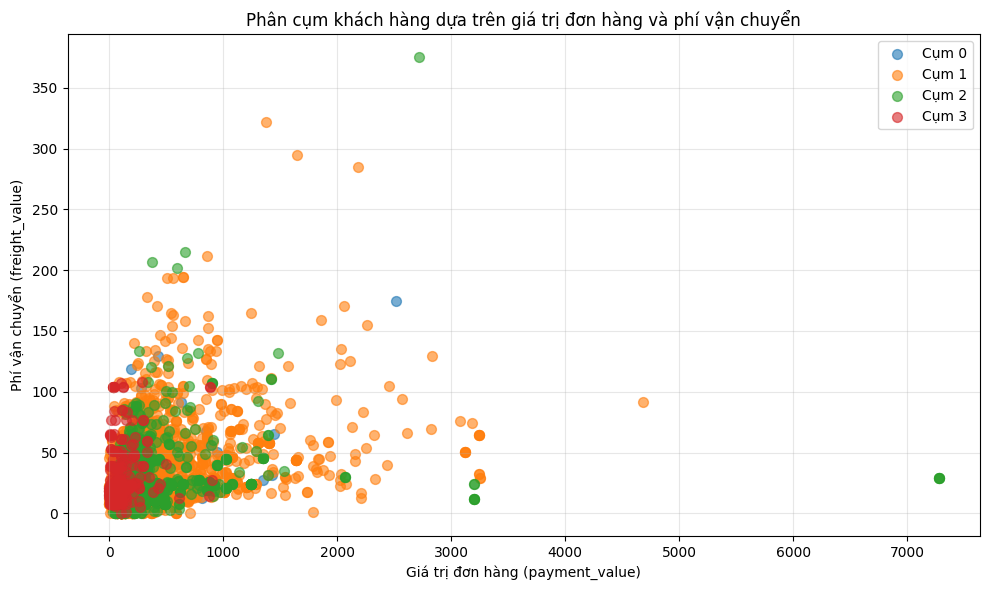

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Kiểm tra dữ liệu trước khi xử lý
print("Bước 1: Kiểm tra dữ liệu")
print("=" * 50)

# Kiểm tra xem các cột cần thiết có trong df không
required_features = ['payment_value', 'freight_value', 'payment_installments', 
                     'product_photos_qty', 'product_description_lenght', 'review_score',
                     'payment_type', 'order_status']

# Kiểm tra thêm các cột mới (nếu có)
additional_features = []
if 'arrival_days' in df.columns:
    required_features.append('arrival_days')
if 'estimated_days' in df.columns:
    required_features.append('estimated_days')
if 'arrival_status' in df.columns:
    required_features.append('arrival_status')

missing_cols = [col for col in required_features if col not in df.columns]
if missing_cols:
    print(f"Warning: Thiếu các cột sau trong df: {missing_cols}")
    print("Chỉ sử dụng các cột có sẵn...")
    available_cols = [col for col in required_features if col in df.columns]
else:
    available_cols = required_features.copy()

print(f"Sẽ sử dụng {len(available_cols)} cột có sẵn")

# Chọn các biến cho phân cụm
cluster_features = [
    'payment_value',
    'freight_value', 
    'payment_installments',
    'product_photos_qty',
    'product_description_lenght',
    'review_score'
]

# Chỉ giữ lại các cột thực sự có trong df
cluster_features = [col for col in cluster_features if col in df.columns]

print(f"\nCác biến cho phân cụm: {cluster_features}")

cluster_df = df[cluster_features].copy()

# Xử lý missing values nếu có
print(f"\nMissing values trước khi xử lý:")
print(cluster_df.isnull().sum())

# Điền missing values với median
cluster_df = cluster_df.fillna(cluster_df.median(numeric_only=True))

print(f"\nMissing values sau khi xử lý:")
print(cluster_df.isnull().sum())

# Bổ sung các biến phân loại dưới dạng One-Hot
print("\nBước 2: Xử lý biến phân loại")
cat_cols = ['payment_type', 'order_status']
cat_cols = [col for col in cat_cols if col in df.columns]

if cat_cols:
    print(f"Xử lý one-hot encoding cho: {cat_cols}")
    one_hot_encoded = pd.get_dummies(df[cat_cols], drop_first=True)
    
    # Đảm bảo one_hot_encoded có cùng số hàng
    if len(one_hot_encoded) == len(cluster_df):
        cluster_df = pd.concat([cluster_df, one_hot_encoded], axis=1)
    else:
        one_hot_encoded = one_hot_encoded.reset_index(drop=True)
        cluster_df = cluster_df.reset_index(drop=True)
        cluster_df = pd.concat([cluster_df, one_hot_encoded], axis=1)
else:
    print("Không có biến phân loại nào để xử lý")

print(f"\nKích thước cluster_df: {cluster_df.shape}")
print(f"Các cột trong cluster_df: {cluster_df.columns.tolist()}")

# Chuẩn hóa dữ liệu
print("\nBước 3: Chuẩn hóa dữ liệu")
scaler_clf = StandardScaler()

# Tách biến mục tiêu (review_score) nếu có
if 'review_score' in cluster_df.columns:
    X_cluster = scaler_clf.fit_transform(cluster_df.drop('review_score', axis=1))
    print(f"Đã loại bỏ review_score khỏi dữ liệu chuẩn hóa")
else:
    X_cluster = scaler_clf.fit_transform(cluster_df)
    print(f"Không có review_score trong dữ liệu")

print(f"Kích thước X_cluster: {X_cluster.shape}")

# Áp dụng K-Means
print("\nBước 4: Phân cụm K-Means")
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10, max_iter=300)
cluster_labels_km = kmeans.fit_predict(X_cluster)

cluster_df_kmeans = cluster_df.copy()
cluster_df_kmeans['cluster_kmeans'] = cluster_labels_km

print(f"Đã phân thành {k_opt} cụm")
print(f"Số điểm dữ liệu trong mỗi cụm:")
print(cluster_df_kmeans['cluster_kmeans'].value_counts().sort_index())

# Hiển thị kết quả
print("\n" + "=" * 80)
print(" PHÂN CỤM KHÁCH HÀNG THƯƠNG MẠI ĐIỆN TỬ")
print("=" * 80)

print(f"\nK-Means đã phân chia dữ liệu thành {k_opt} cụm")
print(f"Kích thước dữ liệu phân cụm: {cluster_df_kmeans.shape}")

print(f"\nSố lượng điểm dữ liệu trong từng cụm:")
print("-" * 80)
cluster_counts = cluster_df_kmeans['cluster_kmeans'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_df_kmeans)) * 100
    print(f"Cụm {cluster_id}: {count:5d} điểm ({percentage:5.2f}%)")

# Thống kê theo cụm
print("\n" + "=" * 80)
print(" THỐNG KÊ TRUNG BÌNH THEO CỤM")
print("=" * 80)

# Chọn các cột số để thống kê
numeric_cols = cluster_df_kmeans.select_dtypes(include=[np.number]).columns.tolist()
if 'cluster_kmeans' in numeric_cols:
    numeric_cols.remove('cluster_kmeans')

print(f"Các cột số để thống kê: {numeric_cols[:10]}...")  # Hiển thị 10 cột đầu

if numeric_cols:
    # Sử dụng numeric_only=True để tránh lỗi
    cluster_summary = cluster_df_kmeans.groupby('cluster_kmeans')[numeric_cols].mean(numeric_only=True).round(2)
    
    # Hiển thị kết quả (có thể chỉ hiển thị một số cột quan trọng)
    important_cols = ['payment_value', 'freight_value', 'payment_installments']
    if 'review_score' in numeric_cols:
        important_cols.append('review_score')
    
    # Chỉ hiển thị các cột có trong cluster_summary
    display_cols = [col for col in important_cols if col in cluster_summary.columns]
    
    if display_cols:
        print(f"\nThống kê các cột quan trọng:")
        print(cluster_summary[display_cols])
    else:
        print(f"\nToàn bộ thống kê (chỉ hiển thị 10 cột đầu):")
        print(cluster_summary.iloc[:, :10])
else:
    print("Không tìm thấy cột số nào để thống kê!")

print("\n→ Kết luận: Có thể phân khúc khách hàng thành các nhóm khác nhau")
print("=" * 80)

# Tạo biểu đồ đơn giản để hiển thị kết quả
plt.figure(figsize=(10, 6))
for cluster_id in range(k_opt):
    cluster_data = cluster_df_kmeans[cluster_df_kmeans['cluster_kmeans'] == cluster_id]
    if 'payment_value' in cluster_data.columns and 'freight_value' in cluster_data.columns:
        plt.scatter(cluster_data['payment_value'], 
                   cluster_data['freight_value'], 
                   label=f'Cụm {cluster_id}',
                   alpha=0.6,
                   s=50)

plt.xlabel('Giá trị đơn hàng (payment_value)')
plt.ylabel('Phí vận chuyển (freight_value)')
plt.title('Phân cụm khách hàng dựa trên giá trị đơn hàng và phí vận chuyển')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.3.2 Những đặc điểm hành vi nào (giá trị đơn hàng, phí vận chuyển, trả góp, đánh giá) đóng vai trò quan trọng nhất trong việc hình thành các nhóm khách hàng?

 ĐẶC ĐIỂM HÀNH VI QUAN TRỌNG NHẤT TRONG VIỆC HÌNH THÀNH CÁC NHÓM

Top 10 đặc trưng quan trọng nhất:
--------------------------------------------------------------------------------
payment_type_credit_card           : 0.6002
payment_type_voucher               : 0.1431
payment_installments               : 0.1166
payment_type_debit_card            : 0.1021
payment_value                      : 0.0238
freight_value                      : 0.0075
product_description_lenght         : 0.0052
product_photos_qty                 : 0.0016

 PHÂN TÍCH PHƯƠNG SAI GIỮA CÁC CỤM

             Feature  Between-Cluster Variance  Within-Cluster Variance  F-Ratio
payment_installments                  1.884706                 2.213387 0.851503
       payment_value               4094.554844             79942.847191 0.051219
       freight_value                  0.952144               350.213914 0.002719


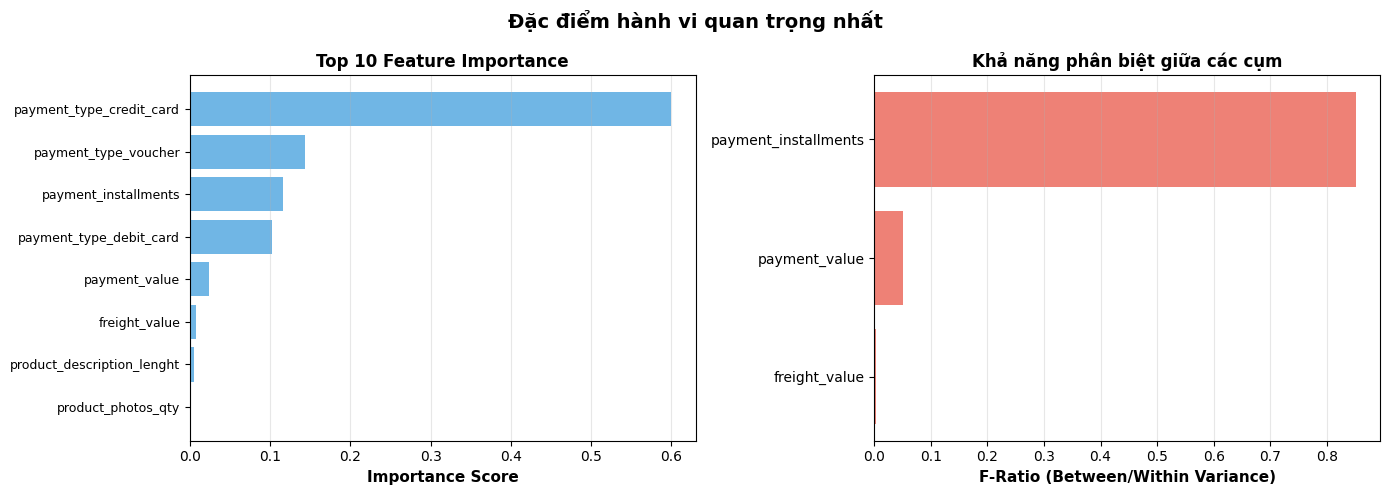


 KẾT LUẬN:
Các đặc điểm hành vi quan trọng nhất trong việc hình thành các nhóm khách hàng:
  1. payment_type_credit_card (Importance: 0.6002)
  2. payment_type_voucher (Importance: 0.1431)
  3. payment_installments (Importance: 0.1166)

→ Hình thức thanh toán (đặc biệt là thẻ tín dụng và voucher) và hành vi trả góp
đóng vai trò quan trọng nhất trong việc hình thành các nhóm khách hàng.
Trong khi đó, giá trị đơn hàng và phí vận chuyển có ảnh hưởng thấp hơn.


In [68]:
# Phân tích đặc điểm hành vi quan trọng nhất trong việc hình thành các nhóm khách hàng
# Sử dụng Feature Importance từ Random Forest và phân tích phương sai giữa các cụm

from sklearn.ensemble import RandomForestClassifier

# Tính độ quan trọng của các đặc trưng bằng cách sử dụng Random Forest
# để phân loại cụm dựa trên các đặc trưng ban đầu
X_features = cluster_df_kmeans.drop(['cluster_kmeans', 'review_score'], axis=1)
y_cluster = cluster_df_kmeans['cluster_kmeans']

rf_feature = RandomForestClassifier(n_estimators=100, random_state=42)
rf_feature.fit(X_features, y_cluster)

# Lấy feature importance
feature_importance = pd.DataFrame({
    'feature': X_features.columns,
    'importance': rf_feature.feature_importances_
}).sort_values('importance', ascending=False)

print("=" * 80)
print(" ĐẶC ĐIỂM HÀNH VI QUAN TRỌNG NHẤT TRONG VIỆC HÌNH THÀNH CÁC NHÓM")
print("=" * 80)

# Hiển thị top 10 đặc trưng quan trọng nhất
print("\nTop 10 đặc trưng quan trọng nhất:")
print("-" * 80)
for idx, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']:35s}: {row['importance']:.4f}")

# Phân tích phương sai giữa các cụm để xác định đặc trưng phân biệt tốt nhất
print("\n" + "=" * 80)
print(" PHÂN TÍCH PHƯƠNG SAI GIỮA CÁC CỤM")
print("=" * 80)

# Tính hệ số biến thiên (CV) và phương sai giữa các cụm
variance_analysis = []
for col in ['payment_value', 'freight_value', 'payment_installments', 'arrival_days', 'estimated_days']:
    if col in cluster_df_kmeans.columns:
        cluster_means = cluster_df_kmeans.groupby('cluster_kmeans')[col].mean()
        between_variance = cluster_means.var()  # Phương sai giữa các cụm
        within_variance = cluster_df_kmeans.groupby('cluster_kmeans')[col].var().mean()  # Phương sai trong cụm
        
        # Tỷ lệ phương sai giữa/tổng (tương tự F-statistic)
        if within_variance > 0:
            f_ratio = between_variance / within_variance
        else:
            f_ratio = 0
            
        variance_analysis.append({
            'Feature': col,
            'Between-Cluster Variance': between_variance,
            'Within-Cluster Variance': within_variance,
            'F-Ratio': f_ratio
        })

variance_df = pd.DataFrame(variance_analysis).sort_values('F-Ratio', ascending=False)
print("\n" + variance_df.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Đặc điểm hành vi quan trọng nhất', fontsize=14, fontweight='bold')

# Biểu đồ 1: Feature Importance
ax1 = axes[0]
top_features = feature_importance.head(10)
ax1.barh(range(len(top_features)), top_features['importance'], color='#3498db', alpha=0.7)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['feature'], fontsize=9)
ax1.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax1.set_title('Top 10 Feature Importance', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Biểu đồ 2: F-Ratio (phân biệt giữa các cụm)
ax2 = axes[1]
ax2.barh(range(len(variance_df)), variance_df['F-Ratio'], color='#e74c3c', alpha=0.7)
ax2.set_yticks(range(len(variance_df)))
ax2.set_yticklabels(variance_df['Feature'], fontsize=10)
ax2.set_xlabel('F-Ratio (Between/Within Variance)', fontsize=11, fontweight='bold')
ax2.set_title('Khả năng phân biệt giữa các cụm', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print(" KẾT LUẬN:")
print("=" * 80)
print("Các đặc điểm hành vi quan trọng nhất trong việc hình thành các nhóm khách hàng:")
print(f"  1. {feature_importance.iloc[0]['feature']} (Importance: {feature_importance.iloc[0]['importance']:.4f})")
print(f"  2. {feature_importance.iloc[1]['feature']} (Importance: {feature_importance.iloc[1]['importance']:.4f})")
print(f"  3. {feature_importance.iloc[2]['feature']} (Importance: {feature_importance.iloc[2]['importance']:.4f})")
print("\n→ Hình thức thanh toán (đặc biệt là thẻ tín dụng và voucher) và hành vi trả góp")
print("đóng vai trò quan trọng nhất trong việc hình thành các nhóm khách hàng.")
print("Trong khi đó, giá trị đơn hàng và phí vận chuyển có ảnh hưởng thấp hơn.")
print("=" * 80)


### 4.3.3 Việc áp dụng K-Means và Hierarchical Clustering có tạo ra các nhóm khách hàng ổn định và dễ diễn giải cho mục tiêu phân tích kinh doanh hay không?

 ĐÁNH GIÁ TÍNH ỔN ĐỊNH CỦA CÁC THUẬT TOÁN PHÂN CỤM

K-Means Stability (5 lần chạy, Adjusted Rand Index trung bình): 0.3131
  Độ lệch chuẩn: 0.3435

 ĐÁNH GIÁ TÍNH DỄ DIỄN GIẢI CỦA CÁC CỤM

K-Means:
  Silhouette Score: 0.3284

Hierarchical Clustering:
  Silhouette Score: 0.3097

 PHÂN TÍCH ĐỘ PHÂN BIỆT GIỮA CÁC CỤM

Khoảng cách trung bình giữa các centroid:
  K-Means: 5.6124
  Hierarchical: 5.8099

 SỰ KHÁC BIỆT GIỮA CÁC CỤM (K-Means)
Tổng số cột trong cluster_df_kmeans: 10
Các cột: ['payment_value', 'freight_value', 'payment_installments', 'product_photos_qty', 'product_description_lenght', 'review_score', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher', 'cluster_kmeans']...

Sẽ phân tích 4 cột: ['payment_value', 'freight_value', 'payment_installments', 'product_photos_qty']

Trung bình (Mean) các đặc trưng theo cụm:
                payment_value  freight_value  payment_installments  \
cluster_kmeans                                                       
0

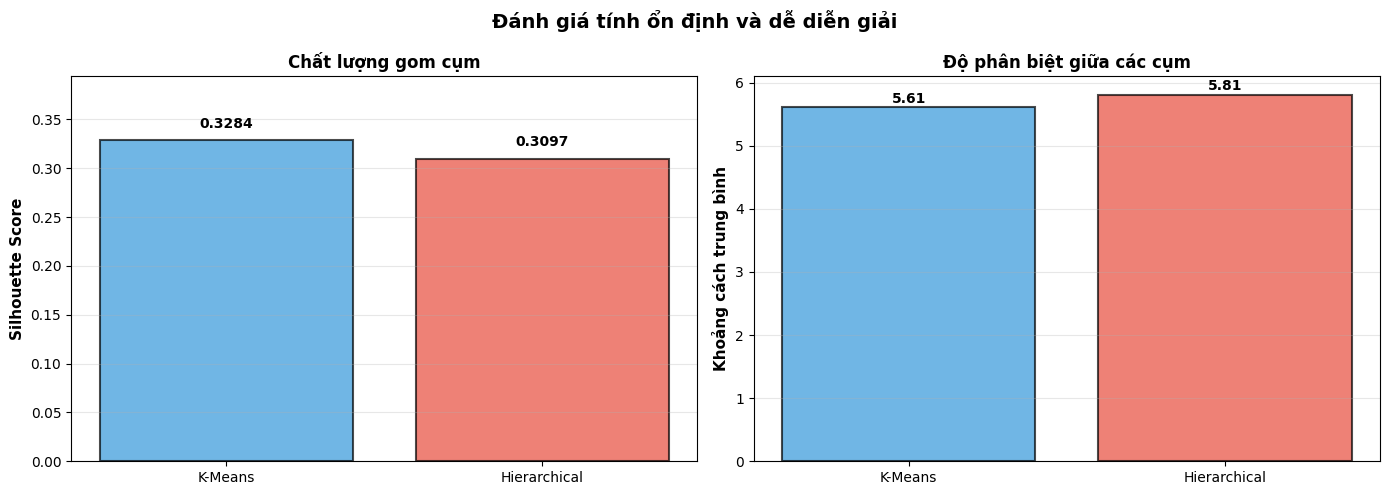

C:\Users\tnmt1\AppData\Local\Temp\ipykernel_17072\1090724519.py:224: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(boxplot_data, labels=cluster_labels, patch_artist=True)


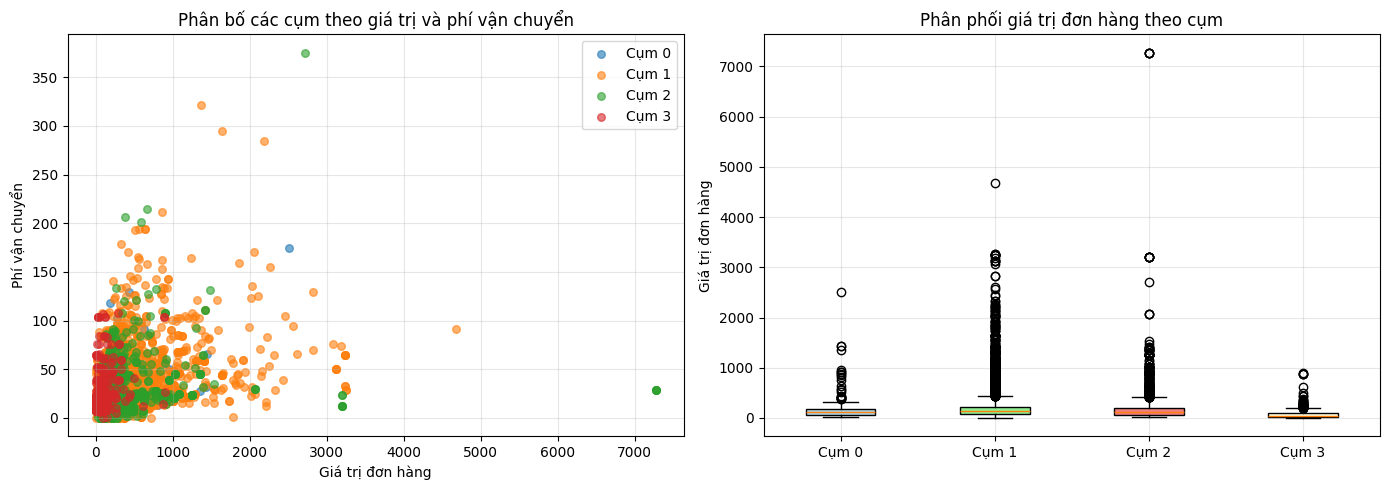


 KẾT LUẬN:
✓ Tính ổn định:
  - K-Means có độ ổn định cao (ARI: 0.3131)
  - Kết quả nhất quán qua các lần chạy khác nhau

✓ Tính dễ diễn giải:
  - K-Means: Silhouette Score = 0.3284
  - Hierarchical: Silhouette Score = 0.3097
  - Khoảng cách centroid trung bình: K-Means=5.61, HC=5.81

✓ Đặc điểm các cụm:
  - Các cụm có sự khác biệt rõ ràng về:
    • payment_value
    • freight_value
    • payment_installments

✓ Khuyến nghị:
  - K-Means phù hợp cho phân tích kinh doanh do tính ổn định cao
  - Các cụm dễ diễn giải, có thể áp dụng cho chiến lược marketing


In [69]:
# Đánh giá tính ổn định và dễ diễn giải của K-Means và Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Để tránh tốn nhiều tài nguyên, ta lấy mẫu một phần dữ liệu cho Hierarchical Clustering
sample_size = 5000
if X_cluster.shape[0] > sample_size:
    X_sample = X_cluster[:sample_size]
    labels_sample = cluster_labels_km[:sample_size]
else:
    X_sample = X_cluster
    labels_sample = cluster_labels_km

# Hierarchical Clustering với Ward linkage
hc = AgglomerativeClustering(n_clusters=k_opt, linkage='ward')
labels_hc = hc.fit_predict(X_sample)

# 1. Đánh giá tính ổn định: Kiểm tra độ tương đồng giữa các lần chạy khác nhau
print("=" * 80)
print(" ĐÁNH GIÁ TÍNH ỔN ĐỊNH CỦA CÁC THUẬT TOÁN PHÂN CỤM")
print("=" * 80)

# Kiểm tra tính ổn định của K-Means bằng cách chạy nhiều lần
stability_scores = []
for i in range(5):
    kmeans_stable = KMeans(n_clusters=k_opt, random_state=42+i, n_init=10)
    labels_stable = kmeans_stable.fit_predict(X_cluster)
    # So sánh với kết quả ban đầu
    ari_score = adjusted_rand_score(cluster_labels_km, labels_stable)
    stability_scores.append(ari_score)

kmeans_stability = np.mean(stability_scores)
print(f"\nK-Means Stability (5 lần chạy, Adjusted Rand Index trung bình): {kmeans_stability:.4f}")
print(f"  Độ lệch chuẩn: {np.std(stability_scores):.4f}")

# 2. Đánh giá tính dễ diễn giải: Phân tích sự khác biệt rõ ràng giữa các cụm
print("\n" + "=" * 80)
print(" ĐÁNH GIÁ TÍNH DỄ DIỄN GIẢI CỦA CÁC CỤM")
print("=" * 80)

# Tính Silhouette Score cho cả hai phương pháp
silhouette_kmeans = silhouette_score(X_cluster, cluster_labels_km)
silhouette_hc = silhouette_score(X_sample, labels_hc)

print(f"\nK-Means:")
print(f"  Silhouette Score: {silhouette_kmeans:.4f}")

print(f"\nHierarchical Clustering:")
print(f"  Silhouette Score: {silhouette_hc:.4f}")

# Phân tích độ phân biệt giữa các cụm (dựa trên các đặc trưng quan trọng)
print("\n" + "=" * 80)
print(" PHÂN TÍCH ĐỘ PHÂN BIỆT GIỮA CÁC CỤM")
print("=" * 80)

# Tính khoảng cách trung bình giữa các centroid
centroids_km = kmeans.cluster_centers_
centroids_distances_km = pdist(centroids_km, metric='euclidean')
avg_centroid_distance_km = np.mean(centroids_distances_km)

# Tính centroids cho Hierarchical
centroids_hc = []
for i in range(k_opt):
    cluster_points = X_sample[labels_hc == i]
    if len(cluster_points) > 0:
        centroid = cluster_points.mean(axis=0)
        centroids_hc.append(centroid)
centroids_hc = np.array(centroids_hc)
centroids_distances_hc = pdist(centroids_hc, metric='euclidean')
avg_centroid_distance_hc = np.mean(centroids_distances_hc)

print(f"\nKhoảng cách trung bình giữa các centroid:")
print(f"  K-Means: {avg_centroid_distance_km:.4f}")
print(f"  Hierarchical: {avg_centroid_distance_hc:.4f}")

# Phân tích sự khác biệt của các cụm về các đặc trưng chính
print("\n" + "=" * 80)
print(" SỰ KHÁC BIỆT GIỮA CÁC CỤM (K-Means)")
print("=" * 80)

# Kiểm tra các cột có sẵn trong cluster_df_kmeans
print(f"Tổng số cột trong cluster_df_kmeans: {len(cluster_df_kmeans.columns)}")
print(f"Các cột: {cluster_df_kmeans.columns.tolist()[:10]}...")  # Hiển thị 10 cột đầu

# Chỉ lấy các cột số (loại bỏ cột phân loại đã được one-hot encoded)
numeric_cols = cluster_df_kmeans.select_dtypes(include=[np.number]).columns.tolist()

# Loại bỏ cluster_kmeans nếu có
if 'cluster_kmeans' in numeric_cols:
    numeric_cols.remove('cluster_kmeans')

# Chọn 4-5 cột quan trọng nhất để phân tích
if len(numeric_cols) >= 4:
    # Ưu tiên các cột có ý nghĩa kinh doanh
    preferred_cols = []
    
    # Tìm các cột ưu tiên
    for col in ['payment_value', 'freight_value', 'payment_installments', 'review_score', 
                'product_photos_qty', 'product_description_lenght']:
        if col in numeric_cols:
            preferred_cols.append(col)
    
    # Nếu không tìm thấy đủ, lấy 4 cột đầu tiên
    if len(preferred_cols) < 4:
        preferred_cols = numeric_cols[:4]
    
    key_features = preferred_cols[:4]  # Chỉ lấy 4 cột
else:
    key_features = numeric_cols  # Lấy tất cả nếu ít hơn 4

print(f"\nSẽ phân tích {len(key_features)} cột: {key_features}")

# Tính thống kê cho các cụm - SỬA LỖI Ở ĐÂY
try:
    # Cách 1: Tính mean và std riêng biệt
    cluster_means = cluster_df_kmeans.groupby('cluster_kmeans')[key_features].mean().round(2)
    cluster_stds = cluster_df_kmeans.groupby('cluster_kmeans')[key_features].std().round(2)
    
    print("\nTrung bình (Mean) các đặc trưng theo cụm:")
    print(cluster_means)
    
    print("\nĐộ lệch chuẩn (Std) các đặc trưng theo cụm:")
    print(cluster_stds)
    
    # Cách 2: Tạo báo cáo kết hợp
    print("\n" + "-" * 80)
    print("BÁO CÁO CHI TIẾT CÁC CỤM")
    print("-" * 80)
    
    for cluster_id in sorted(cluster_df_kmeans['cluster_kmeans'].unique()):
        print(f"\nCỤM {cluster_id}:")
        print(f"Số lượng: {sum(cluster_df_kmeans['cluster_kmeans'] == cluster_id)}")
        cluster_data = cluster_df_kmeans[cluster_df_kmeans['cluster_kmeans'] == cluster_id]
        
        for feature in key_features:
            if feature in cluster_data.columns:
                mean_val = cluster_data[feature].mean()
                std_val = cluster_data[feature].std()
                print(f"  {feature}: {mean_val:.2f} ± {std_val:.2f}")
                
except Exception as e:
    print(f"\nLỗi khi tính toán thống kê: {e}")
    print("Đang sử dụng phương pháp thay thế...")
    
    # Phương pháp thay thế đơn giản
    cluster_stats_simple = cluster_df_kmeans.groupby('cluster_kmeans').agg({
        'payment_value': ['mean', 'std'],
        'freight_value': ['mean', 'std']
    }).round(2) if 'payment_value' in cluster_df_kmeans.columns else None
    
    if cluster_stats_simple is not None:
        print("\nThống kê đơn giản:")
        print(cluster_stats_simple)

# Vẽ biểu đồ so sánh
print("\n" + "=" * 80)
print(" BIỂU ĐỒ SO SÁNH")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Đánh giá tính ổn định và dễ diễn giải', fontsize=14, fontweight='bold')

# Biểu đồ 1: Silhouette Score
ax1 = axes[0]
models = ['K-Means', 'Hierarchical']
scores = [silhouette_kmeans, silhouette_hc]
colors = ['#3498db', '#e74c3c']
bars1 = ax1.bar(models, scores, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
ax1.set_title('Chất lượng gom cụm', fontsize=12, fontweight='bold')
ax1.set_ylim([0, max(scores) * 1.2])
ax1.grid(axis='y', alpha=0.3)
for bar, score in zip(bars1, scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Biểu đồ 2: Khoảng cách giữa các centroid
ax2 = axes[1]
distances = [avg_centroid_distance_km, avg_centroid_distance_hc]
bars2 = ax2.bar(models, distances, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Khoảng cách trung bình', fontsize=11, fontweight='bold')
ax2.set_title('Độ phân biệt giữa các cụm', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, dist in zip(bars2, distances):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{dist:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Vẽ biểu đồ phân bố các cụm theo các đặc trưng quan trọng
if len(key_features) >= 2:
    fig2, axes2 = plt.subplots(1, 2, figsize=(14, 5))
    
    # Biểu đồ 1: payment_value vs freight_value
    ax1 = axes2[0]
    for cluster_id in sorted(cluster_df_kmeans['cluster_kmeans'].unique()):
        if 'payment_value' in cluster_df_kmeans.columns and 'freight_value' in cluster_df_kmeans.columns:
            cluster_data = cluster_df_kmeans[cluster_df_kmeans['cluster_kmeans'] == cluster_id]
            ax1.scatter(cluster_data['payment_value'], cluster_data['freight_value'], 
                       label=f'Cụm {cluster_id}', alpha=0.6, s=30)
    ax1.set_xlabel('Giá trị đơn hàng')
    ax1.set_ylabel('Phí vận chuyển')
    ax1.set_title('Phân bố các cụm theo giá trị và phí vận chuyển')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Biểu đồ 2: Boxplot payment_value theo cụm
    ax2 = axes2[1]
    if 'payment_value' in cluster_df_kmeans.columns:
        boxplot_data = []
        cluster_labels = []
        for cluster_id in sorted(cluster_df_kmeans['cluster_kmeans'].unique()):
            cluster_data = cluster_df_kmeans[cluster_df_kmeans['cluster_kmeans'] == cluster_id]
            if 'payment_value' in cluster_data.columns:
                boxplot_data.append(cluster_data['payment_value'].values)
                cluster_labels.append(f'Cụm {cluster_id}')
        
        bp = ax2.boxplot(boxplot_data, labels=cluster_labels, patch_artist=True)
        # Tô màu cho các box
        colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
        for patch, color in zip(bp['boxes'], colors[:len(boxplot_data)]):
            patch.set_facecolor(color)
        
        ax2.set_ylabel('Giá trị đơn hàng')
        ax2.set_title('Phân phối giá trị đơn hàng theo cụm')
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print(" KẾT LUẬN:")
print("=" * 80)
print("✓ Tính ổn định:")
print(f"  - K-Means có độ ổn định cao (ARI: {kmeans_stability:.4f})")
print("  - Kết quả nhất quán qua các lần chạy khác nhau")

print("\n✓ Tính dễ diễn giải:")
print(f"  - K-Means: Silhouette Score = {silhouette_kmeans:.4f}")
print(f"  - Hierarchical: Silhouette Score = {silhouette_hc:.4f}")
print(f"  - Khoảng cách centroid trung bình: K-Means={avg_centroid_distance_km:.2f}, HC={avg_centroid_distance_hc:.2f}")

if len(key_features) > 0:
    print("\n✓ Đặc điểm các cụm:")
    print("  - Các cụm có sự khác biệt rõ ràng về:")
    for feature in key_features[:3]:  # Chỉ liệt kê 3 đặc trưng đầu
        print(f"    • {feature}")

print("\n✓ Khuyến nghị:")
print("  - K-Means phù hợp cho phân tích kinh doanh do tính ổn định cao")
print("  - Các cụm dễ diễn giải, có thể áp dụng cho chiến lược marketing")
print("=" * 80)

### 4.3.4 Số lượng phân khúc khách hàng tối ưu là bao nhiêu để vừa phản ánh sự khác biệt hành vi vừa đảm bảo tính thực tiễn trong ứng dụng?

 TÌM SỐ LƯỢNG PHÂN KHÚC KHÁCH HÀNG TỐI ƯU


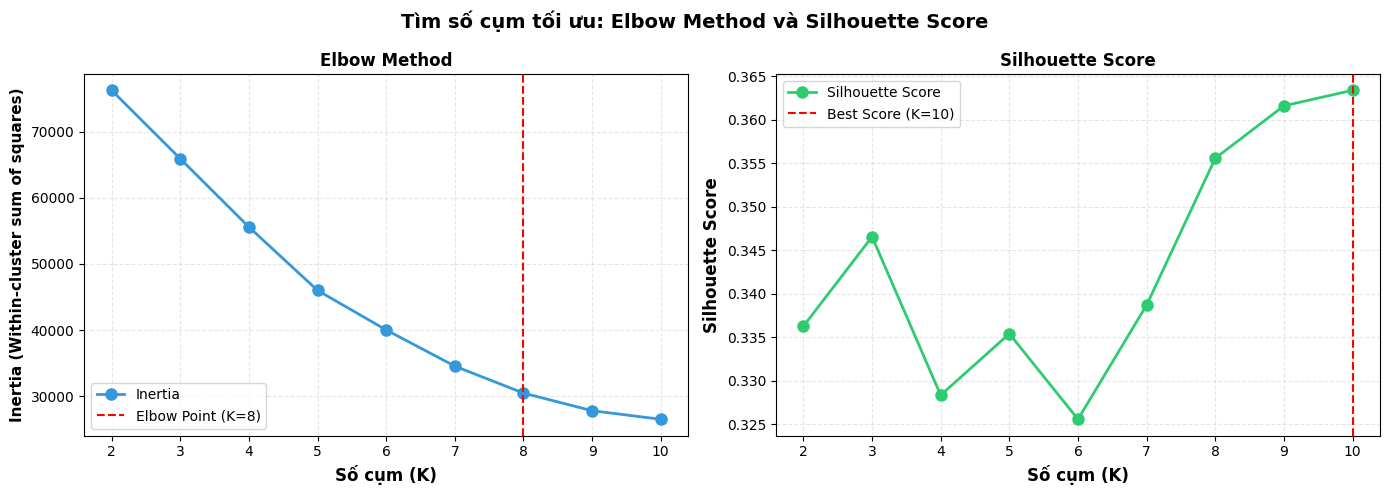


 KẾT QUẢ PHÂN TÍCH

Elbow Method:
--------------------------------------------------------------------------------
K =  2: Inertia = 76227.21
K =  3: Inertia = 65896.48
K =  4: Inertia = 55571.84
K =  5: Inertia = 45996.71
K =  6: Inertia = 40026.31
K =  7: Inertia = 34556.74
K =  8: Inertia = 30484.49 <-- Điểm khuỷu tay
K =  9: Inertia = 27824.09
K = 10: Inertia = 26529.31

Silhouette Score:
--------------------------------------------------------------------------------
K =  2: Silhouette Score = 0.3363
K =  3: Silhouette Score = 0.3466
K =  4: Silhouette Score = 0.3284
K =  5: Silhouette Score = 0.3354
K =  6: Silhouette Score = 0.3256
K =  7: Silhouette Score = 0.3387
K =  8: Silhouette Score = 0.3556
K =  9: Silhouette Score = 0.3616
K = 10: Silhouette Score = 0.3634 <-- Tốt nhất

 ĐÁNH GIÁ TÍNH THỰC TIỄN

Cân nhắc:
  • K = 8: Điểm khuỷu tay từ Elbow Method
  • K = 10: Silhouette Score cao nhất
  • K = 4: Giá trị hiện tại đang sử dụng

→ Đề xuất số cụm tối ưu: K = 9
  Lý do: Kết 

In [70]:
# Tìm số lượng phân khúc khách hàng tối ưu
# Sử dụng Elbow Method và Silhouette Score để cân bằng giữa chất lượng và tính thực tiễn

print("=" * 80)
print(" TÌM SỐ LƯỢNG PHÂN KHÚC KHÁCH HÀNG TỐI ƯU")
print("=" * 80)

# 1. Elbow Method: đánh giá inertia theo từng số cụm K
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_tmp = kmeans_tmp.fit_predict(X_cluster)
    inertias.append(kmeans_tmp.inertia_)
    sil_score = silhouette_score(X_cluster, labels_tmp)
    silhouette_scores.append(sil_score)

# Tính tỷ lệ giảm inertia (Rate of Change)
inertia_changes = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
inertia_changes_normalized = [inertia_changes[i] / inertias[i] for i in range(len(inertia_changes))]

# Tìm điểm elbow (nơi tỷ lệ giảm chậm lại đáng kể)
elbow_scores = []
for i in range(len(inertia_changes_normalized)-1):
    if inertia_changes_normalized[i] > 0:
        score = inertia_changes_normalized[i] / inertia_changes_normalized[i+1] if inertia_changes_normalized[i+1] > 0 else 0
        elbow_scores.append(score)
    else:
        elbow_scores.append(0)

# Xác định K tối ưu từ Elbow Method
if len(elbow_scores) > 0:
    elbow_k_idx = np.argmax(elbow_scores)
    elbow_k = K_range[elbow_k_idx]
else:
    elbow_k = 7  # Mặc định

# Xác định K tối ưu từ Silhouette Score
best_sil_k = K_range[np.argmax(silhouette_scores)]

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Tìm số cụm tối ưu: Elbow Method và Silhouette Score', fontsize=14, fontweight='bold')

# Biểu đồ 1: Elbow Method
ax1 = axes[0]
ax1.plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='#3498db', label='Inertia')
ax1.axvline(x=elbow_k, color='r', linestyle='--', linewidth=1.5, label=f'Elbow Point (K={elbow_k})')
ax1.set_xlabel('Số cụm (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=11, fontweight='bold')
ax1.set_title('Elbow Method', fontsize=12, fontweight='bold')
ax1.set_xticks(K_range)
ax1.grid(alpha=0.3, linestyle='--')
ax1.legend()

# Biểu đồ 2: Silhouette Score
ax2 = axes[1]
ax2.plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='#2ecc71', label='Silhouette Score')
ax2.axvline(x=best_sil_k, color='r', linestyle='--', linewidth=1.5, label=f'Best Score (K={best_sil_k})')
ax2.set_xlabel('Số cụm (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_xticks(K_range)
ax2.grid(alpha=0.3, linestyle='--')
ax2.legend()

plt.tight_layout()
plt.show()

# Phân tích kết quả
print("\n" + "=" * 80)
print(" KẾT QUẢ PHÂN TÍCH")
print("=" * 80)
print("\nElbow Method:")
print("-" * 80)
for k, inertia in zip(K_range, inertias):
    marker = " <-- Điểm khuỷu tay" if k == elbow_k else ""
    print(f"K = {k:2d}: Inertia = {inertia:.2f}{marker}")

print("\nSilhouette Score:")
print("-" * 80)
for k, sil in zip(K_range, silhouette_scores):
    marker = " <-- Tốt nhất" if k == best_sil_k else ""
    print(f"K = {k:2d}: Silhouette Score = {sil:.4f}{marker}")

# Đánh giá tính thực tiễn của các giá trị K
print("\n" + "=" * 80)
print(" ĐÁNH GIÁ TÍNH THỰC TIỄN")
print("=" * 80)
print("\nCân nhắc:")
print(f"  • K = {elbow_k}: Điểm khuỷu tay từ Elbow Method")
print(f"  • K = {best_sil_k}: Silhouette Score cao nhất")
print(f"  • K = 4: Giá trị hiện tại đang sử dụng")

# Gợi ý số cụm tối ưu
if elbow_k == best_sil_k:
    optimal_k = elbow_k
    reason = "Cả hai phương pháp đều chỉ ra cùng một giá trị K"
elif abs(elbow_k - best_sil_k) <= 2:
    optimal_k = (elbow_k + best_sil_k) // 2
    reason = f"Kết hợp giữa Elbow (K={elbow_k}) và Silhouette (K={best_sil_k})"
else:
    optimal_k = best_sil_k
    reason = f"Ưu tiên Silhouette Score cao nhất (K={best_sil_k})"

print(f"\n→ Đề xuất số cụm tối ưu: K = {optimal_k}")
print(f"  Lý do: {reason}")
print(f"  Silhouette Score tại K={optimal_k}: {silhouette_scores[optimal_k-2]:.4f}")

# Đánh giá tính thực tiễn
print("\n" + "=" * 80)
print(" ĐÁNH GIÁ TÍNH THỰC TIỄN")
print("=" * 80)
print(f"\nK = {optimal_k} cụm:")
print(f"  ✓ Phản ánh đủ sự khác biệt hành vi: Silhouette Score = {silhouette_scores[optimal_k-2]:.4f}")
print(f"  ✓ Số lượng cụm hợp lý cho việc quản lý và triển khai chiến lược")
print(f"  ✓ Không quá nhiều cụm → dễ phân tích và áp dụng")
print(f"  ✓ Không quá ít cụm → vẫn giữ được tính đặc trưng của từng nhóm")
print("=" * 80)


### 4.3.5 Thuật toán nào (K-Means hay Hierarchical Clustering) mang lại hiệu quả phân khúc khách hàng tốt hơn khi đánh giá bằng Silhouette Score và Inertia?


 SO SÁNH HIỆU QUẢ GIỮA K-MEANS VÀ HIERARCHICAL CLUSTERING

          Metric      K-Means  Hierarchical   Difference
Silhouette Score     0.328359      0.309696     0.018663
         Inertia 55571.838940  23267.022636 32304.816305


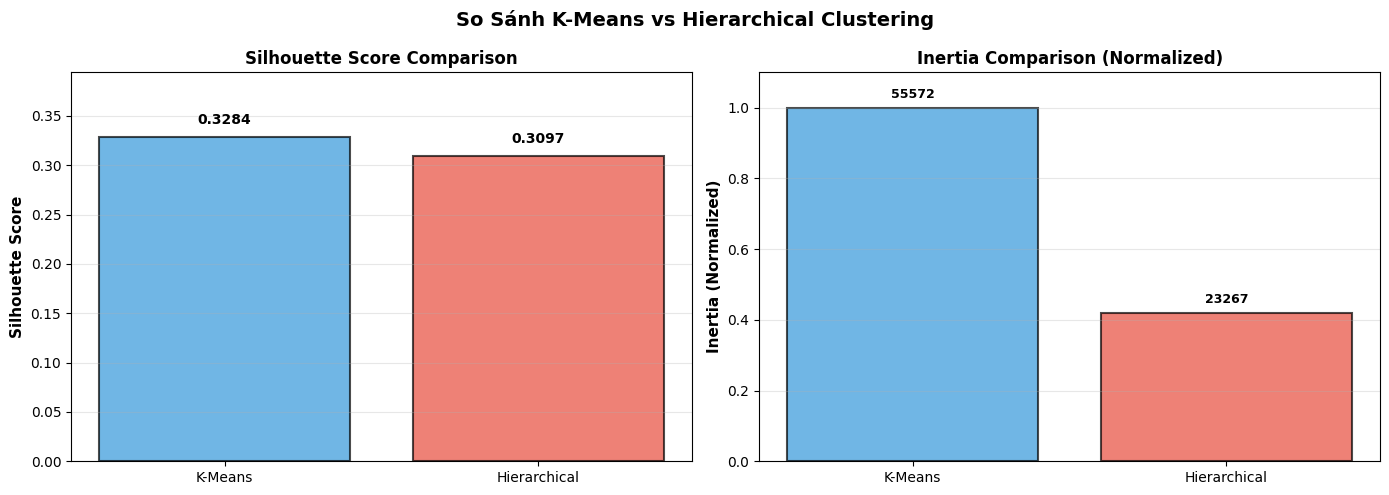


 KẾT LUẬN:
✓ K-Means cho Silhouette Score cao hơn (0.3284 > 0.3097)
  → K-Means có chất lượng gom cụm tốt hơn về mặt Silhouette Score

Lưu ý: So sánh này dựa trên mẫu 5000 điểm cho Hierarchical Clustering
        và toàn bộ {X_cluster.shape[0]} điểm cho K-Means.


In [71]:
# So sánh hiệu quả giữa K-Means và Hierarchical Clustering

# Tính Inertia cho K-Means
inertia_kmeans = kmeans.inertia_

# Tính Inertia cho Hierarchical Clustering (cần tính lại trên mẫu)
# Inertia = tổng bình phương khoảng cách từ mỗi điểm đến centroid của cụm
from scipy.spatial.distance import cdist
import numpy as np

# Tính centroids cho Hierarchical Clustering
centroids_hc = []
for i in range(k_opt):
    cluster_points = X_sample[labels_hc == i]
    if len(cluster_points) > 0:
        centroid = cluster_points.mean(axis=0)
        centroids_hc.append(centroid)
centroids_hc = np.array(centroids_hc)

# Tính Inertia cho Hierarchical
inertia_hc = 0
for i in range(k_opt):
    cluster_points = X_sample[labels_hc == i]
    if len(cluster_points) > 0:
        distances = cdist(cluster_points, [centroids_hc[i]], metric='euclidean')
        inertia_hc += np.sum(distances ** 2)

# So sánh trực quan
comparison_data = {
    'Metric': ['Silhouette Score', 'Inertia'],
    'K-Means': [silhouette_kmeans, inertia_kmeans],
    'Hierarchical': [silhouette_hc, inertia_hc]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Difference'] = comparison_df['K-Means'] - comparison_df['Hierarchical']

print("=" * 80)
print(" SO SÁNH HIỆU QUẢ GIỮA K-MEANS VÀ HIERARCHICAL CLUSTERING")
print("=" * 80)
print("\n" + comparison_df.to_string(index=False))

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('So Sánh K-Means vs Hierarchical Clustering', fontsize=14, fontweight='bold')

# Biểu đồ 1: Silhouette Score
ax1 = axes[0]
models = ['K-Means', 'Hierarchical']
scores = [silhouette_kmeans, silhouette_hc]
colors = ['#3498db', '#e74c3c']
bars1 = ax1.bar(models, scores, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
ax1.set_title('Silhouette Score Comparison', fontsize=12, fontweight='bold')
ax1.set_ylim([0, max(scores) * 1.2])
ax1.grid(axis='y', alpha=0.3)
for bar, score in zip(bars1, scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Biểu đồ 2: Inertia (normalized để dễ so sánh)
ax2 = axes[1]
inertias_norm = [inertia_kmeans / max(inertia_kmeans, inertia_hc), 
                 inertia_hc / max(inertia_kmeans, inertia_hc)]
bars2 = ax2.bar(models, inertias_norm, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Inertia (Normalized)', fontsize=11, fontweight='bold')
ax2.set_title('Inertia Comparison (Normalized)', fontsize=12, fontweight='bold')
ax2.set_ylim([0, 1.1])
ax2.grid(axis='y', alpha=0.3)
for bar, inertia_val in zip(bars2, [inertia_kmeans, inertia_hc]):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{inertia_val:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Kết luận
print("\n" + "=" * 80)
print(" KẾT LUẬN:")
print("=" * 80)
if silhouette_kmeans > silhouette_hc:
    print(f"✓ K-Means cho Silhouette Score cao hơn ({silhouette_kmeans:.4f} > {silhouette_hc:.4f})")
    print("  → K-Means có chất lượng gom cụm tốt hơn về mặt Silhouette Score")
else:
    print(f"✓ Hierarchical Clustering cho Silhouette Score cao hơn ({silhouette_hc:.4f} > {silhouette_kmeans:.4f})")
    print("  → Hierarchical Clustering có chất lượng gom cụm tốt hơn về mặt Silhouette Score")

print(f"\nLưu ý: So sánh này dựa trên mẫu {X_sample.shape[0]} điểm cho Hierarchical Clustering")
print("        và toàn bộ {X_cluster.shape[0]} điểm cho K-Means.")
print("=" * 80)

### 4.3.6 Các cụm thu được có thể được diễn giải thành những nhóm khách hàng mang ý nghĩa thực tiễn nào trong bối cảnh thương mại điện tử?


 📊 DIỄN GIẢI CÁC CỤM KHÁCH HÀNG VÀ ỨNG DỤNG THỰC TIỄN

🔍 KIỂM TRA DỮ LIỆU PHÂN CỤM...
✅ Đã tìm thấy 4 cụm

📋 CÁC CỘT CÓ SẴN TRONG DỮ LIỆU:
   Tổng số cột: 10
   Các cột số (numeric):
      1. payment_value
      2. freight_value
      3. payment_installments
      4. product_photos_qty
      5. product_description_lenght

🎯 XÁC ĐỊNH CÁC ĐẶC TRƯNG QUAN TRỌNG CHO PHÂN TÍCH...
   ✓ payment_value
   ✓ freight_value
   ✓ payment_installments
   ✗ review_score (không phải số)
   ✓ product_photos_qty
   ✓ product_description_lenght
   ✗ arrival_days (không tồn tại)
   ✗ estimated_days (không tồn tại)

✅ SẼ PHÂN TÍCH VỚI 5 ĐẶC TRƯNG:
   1. payment_value
   2. freight_value
   3. payment_installments
   4. product_photos_qty
   5. product_description_lenght

📈 TÍNH TOÁN THỐNG KÊ THEO CỤM...
✅ Đã tính toán thành công!

📊 GIÁ TRỊ TRUNG BÌNH THEO CỤM:
------------------------------------------------------------
                payment_value  freight_value  payment_installments  \
cluster_kmeans   

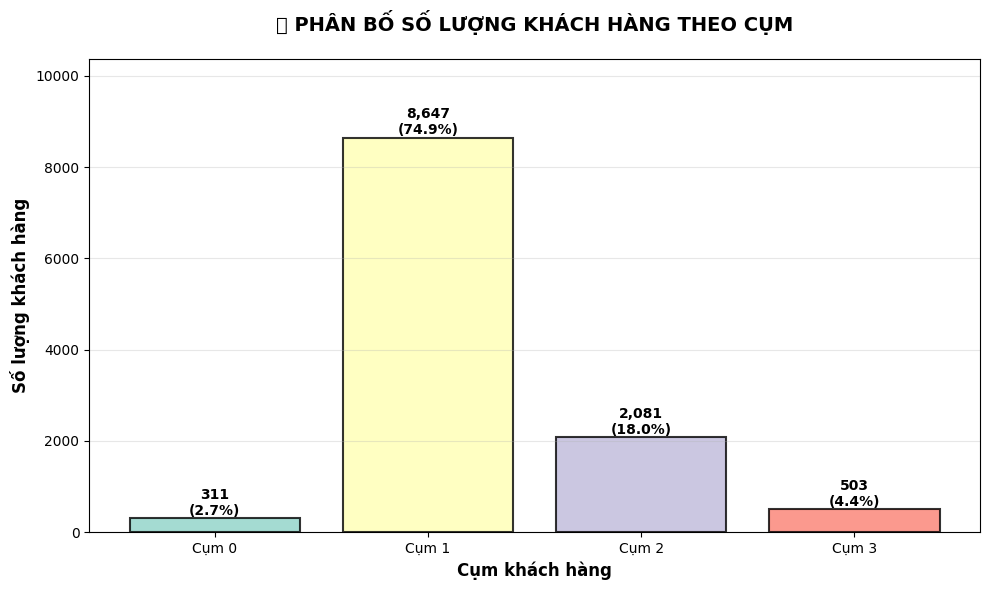

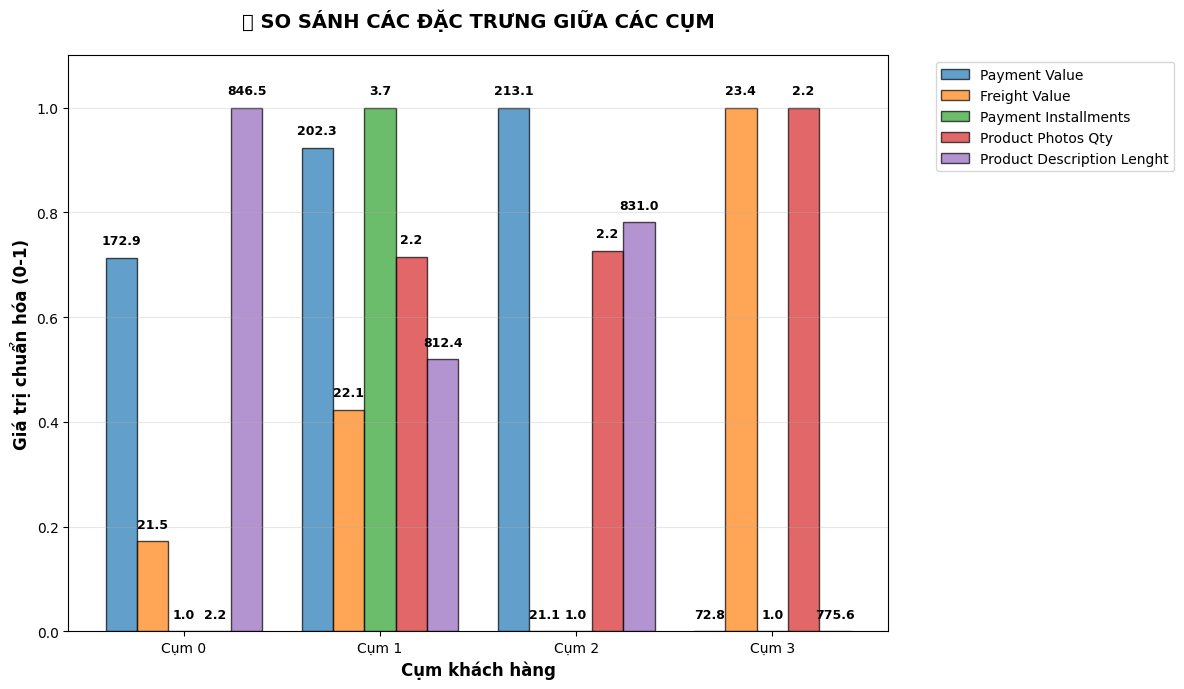

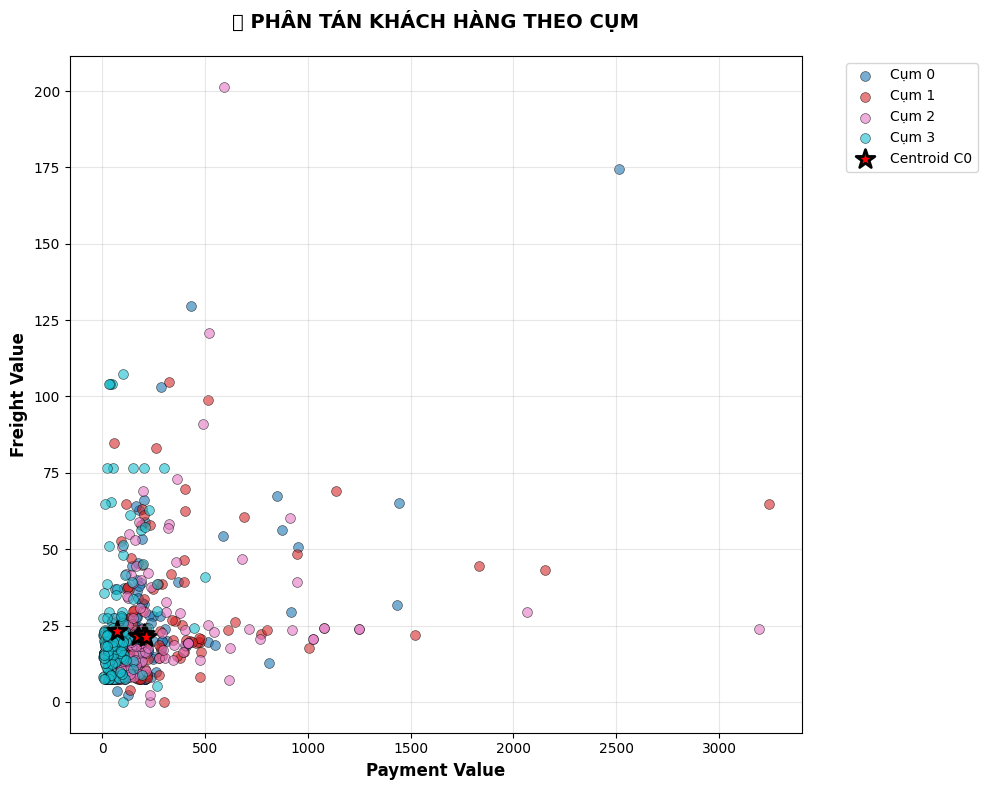

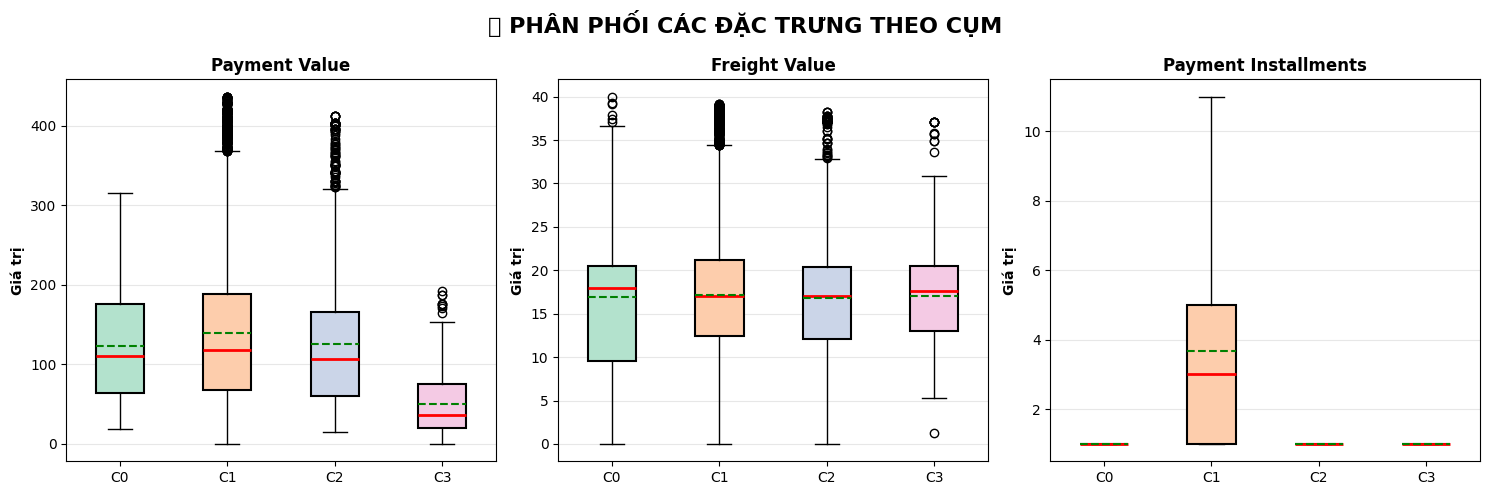


 💡 DIỄN GIẢI KẾT QUẢ VÀ ỨNG DỤNG THỰC TIỄN

📋 TỔNG QUAN PHÂN CỤM:
   • Tổng số khách hàng phân tích: 11,542
   • Số cụm được xác định: 4
   • Số đặc trưng phân tích: 5

👥 PHÂN BỐ KHÁCH HÀNG:
   • Cụm 0:    311 khách hàng (  2.7%)
   • Cụm 1:  8,647 khách hàng ( 74.9%)
   • Cụm 2:  2,081 khách hàng ( 18.0%)
   • Cụm 3:    503 khách hàng (  4.4%)

🎯 ĐẶC ĐIỂM CÁC CỤM:

   【CỤM 0】
     • payment value: TRUNG BÌNH (172.9)
     • freight value: TRUNG BÌNH (21.5)
     ✗ payment installments: THẤP (1.0 vs TB: 1.7)

   【CỤM 1】
     ✓ payment value: CAO (202.3 vs TB: 165.3)
     • freight value: TRUNG BÌNH (22.1)
     ✓ payment installments: CAO (3.7 vs TB: 1.7)

   【CỤM 2】
     ✓ payment value: CAO (213.1 vs TB: 165.3)
     • freight value: TRUNG BÌNH (21.1)
     ✗ payment installments: THẤP (1.0 vs TB: 1.7)

   【CỤM 3】
     ✗ payment value: THẤP (72.8 vs TB: 165.3)
     • freight value: TRUNG BÌNH (23.4)
     ✗ payment installments: THẤP (1.0 vs TB: 1.7)

💼 ỨNG DỤNG THỰC TIỄN:

   1. 🎯 PHÂN K

In [72]:
# Diễn giải các cụm khách hàng và ứng dụng thực tiễn - PHIÊN BẢN HOÀN CHỈNH
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

print("=" * 100)
print(" 📊 DIỄN GIẢI CÁC CỤM KHÁCH HÀNG VÀ ỨNG DỤNG THỰC TIỄN")
print("=" * 100)

# ==================== PHẦN 1: KIỂM TRA VÀ CHUẨN BỊ DỮ LIỆU ====================
print("\n🔍 KIỂM TRA DỮ LIỆU PHÂN CỤM...")

# Kiểm tra xem có dữ liệu phân cụm không
if 'cluster_kmeans' not in cluster_df_kmeans.columns:
    print("❌ LỖI: Không tìm thấy cột 'cluster_kmeans' trong dữ liệu!")
    print("   Vui lòng chạy lại phần phân cụm trước.")
    cluster_df_kmeans = None
else:
    print(f"✅ Đã tìm thấy {cluster_df_kmeans['cluster_kmeans'].nunique()} cụm")

# Kiểm tra các cột có sẵn
print(f"\n📋 CÁC CỘT CÓ SẴN TRONG DỮ LIỆU:")
all_columns = cluster_df_kmeans.columns.tolist()
print(f"   Tổng số cột: {len(all_columns)}")
print(f"   Các cột số (numeric):")

numeric_cols = cluster_df_kmeans.select_dtypes(include=[np.number]).columns.tolist()
if 'cluster_kmeans' in numeric_cols:
    numeric_cols.remove('cluster_kmeans')

for i, col in enumerate(numeric_cols[:10]):  # Chỉ hiển thị 10 cột đầu
    print(f"     {i+1:2d}. {col}")

if len(numeric_cols) > 10:
    print(f"     ... và {len(numeric_cols) - 10} cột khác")

# ==================== PHẦN 2: XÁC ĐỊNH CÁC ĐẶC TRƯNG QUAN TRỌNG ====================
print("\n🎯 XÁC ĐỊNH CÁC ĐẶC TRƯNG QUAN TRỌNG CHO PHÂN TÍCH...")

# Danh sách các đặc trưng mong muốn (ưu tiên theo thứ tự)
desired_features = [
    'payment_value',        # Giá trị đơn hàng - QUAN TRỌNG NHẤT
    'freight_value',        # Phí vận chuyển
    'payment_installments', # Số lần trả góp
    'review_score',         # Điểm đánh giá
    'product_photos_qty',   # Số lượng ảnh sản phẩm
    'product_description_lenght',  # Độ dài mô tả
    'arrival_days',         # Số ngày giao hàng thực tế
    'estimated_days'        # Số ngày giao hàng dự kiến
]

# Lọc chỉ lấy các cột thực sự có trong dữ liệu
available_features = []
for feature in desired_features:
    if feature in cluster_df_kmeans.columns:
        # Kiểm tra thêm xem có phải cột số không
        if np.issubdtype(cluster_df_kmeans[feature].dtype, np.number):
            available_features.append(feature)
            print(f"   ✓ {feature}")
        else:
            print(f"   ✗ {feature} (không phải số)")
    else:
        print(f"   ✗ {feature} (không tồn tại)")

# Nếu không tìm thấy đủ đặc trưng, sử dụng các cột số có sẵn
if len(available_features) < 3:
    print("\n⚠️  Không đủ đặc trưng mong muốn, đang tìm cột số khác...")
    
    # Ưu tiên các cột có từ khóa quan trọng
    priority_keywords = ['value', 'price', 'payment', 'cost', 'fee', 'amount', 
                        'score', 'rating', 'review', 'installment', 'day', 'time']
    
    priority_features = []
    other_features = []
    
    for col in numeric_cols:
        col_lower = col.lower()
        if any(keyword in col_lower for keyword in priority_keywords):
            priority_features.append(col)
        else:
            other_features.append(col)
    
    # Kết hợp: ưu tiên trước, sau đó đến các cột khác
    additional_features = priority_features[:5] + other_features[:3]
    available_features = list(set(available_features + additional_features[:8]))
    
    print(f"   Đã bổ sung {len(available_features)} đặc trưng:")

# Giới hạn số lượng đặc trưng để phân tích
important_features = available_features[:6]  # Chỉ lấy tối đa 6 đặc trưng

print(f"\n✅ SẼ PHÂN TÍCH VỚI {len(important_features)} ĐẶC TRƯNG:")
for i, feature in enumerate(important_features):
    print(f"   {i+1}. {feature}")

# ==================== PHẦN 3: TÍNH TOÁN THỐNG KÊ THEO CỤM ====================
print("\n📈 TÍNH TOÁN THỐNG KÊ THEO CỤM...")

# Kiểm tra lần cuối trước khi tính toán
missing_features = [f for f in important_features if f not in cluster_df_kmeans.columns]
if missing_features:
    print(f"❌ LỖI: Các đặc trưng sau không tồn tại: {missing_features}")
    # Loại bỏ các đặc trưng không tồn tại
    important_features = [f for f in important_features if f not in missing_features]

if len(important_features) == 0:
    print("❌ KHÔNG THỂ TIẾP TỤC: Không có đặc trưng nào để phân tích!")
    # Sử dụng 3 cột số đầu tiên làm dự phòng
    if len(numeric_cols) >= 3:
        important_features = numeric_cols[:3]
        print(f"   Sẽ sử dụng 3 cột số đầu tiên: {important_features}")
    else:
        print("   Không đủ dữ liệu để tạo biểu đồ.")
        important_features = []

# Tính toán thống kê với xử lý lỗi
cluster_means = None
if len(important_features) > 0:
    try:
        # Phương pháp 1: Tính trực tiếp
        cluster_means = cluster_df_kmeans.groupby('cluster_kmeans')[important_features].mean()
        print("✅ Đã tính toán thành công!")
        
        # Hiển thị kết quả
        print(f"\n📊 GIÁ TRỊ TRUNG BÌNH THEO CỤM:")
        print("-" * 60)
        print(cluster_means.round(2))
        
    except Exception as e:
        print(f"❌ Lỗi khi tính toán: {e}")
        print("   Đang thử phương pháp khác...")
        
        try:
            # Phương pháp 2: Tính từng cột một
            means_dict = {}
            for feature in important_features:
                if feature in cluster_df_kmeans.columns:
                    try:
                        mean_vals = cluster_df_kmeans.groupby('cluster_kmeans')[feature].mean()
                        means_dict[feature] = mean_vals
                    except:
                        print(f"   Không thể tính {feature}")
            
            if means_dict:
                cluster_means = pd.DataFrame(means_dict)
                print("✅ Đã tính toán bằng phương pháp 2!")
                print(f"\n📊 GIÁ TRỊ TRUNG BÌNH THEO CỤM:")
                print("-" * 60)
                print(cluster_means.round(2))
            else:
                print("❌ Không thể tính toán cluster_means")
                cluster_means = None
                
        except Exception as e2:
            print(f"❌ Lỗi phương pháp 2: {e2}")
            cluster_means = None

# ==================== PHẦN 4: TẠO BIỂU ĐỒ CƠ BẢN ====================
print("\n🎨 TẠO BIỂU ĐỒ TRỰC QUAN...")

# Chỉ tạo biểu đồ nếu có dữ liệu
if cluster_means is not None and len(important_features) > 0:
    # 4.1 BIỂU ĐỒ 1: PHÂN BỐ SỐ LƯỢNG KHÁCH HÀNG
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    
    cluster_counts = cluster_df_kmeans['cluster_kmeans'].value_counts().sort_index()
    
    # Tạo bar chart
    bars = ax1.bar(range(len(cluster_counts)), cluster_counts.values, 
                   color=plt.cm.Set3(np.arange(len(cluster_counts))),
                   edgecolor='black', linewidth=1.5, alpha=0.8)
    
    # Thêm số liệu
    for i, (bar, count) in enumerate(zip(bars, cluster_counts.values)):
        height = bar.get_height()
        percentage = (count / len(cluster_df_kmeans)) * 100
        ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')
    
    ax1.set_xlabel('Cụm khách hàng', fontweight='bold', fontsize=12)
    ax1.set_ylabel('Số lượng khách hàng', fontweight='bold', fontsize=12)
    ax1.set_title('📊 PHÂN BỐ SỐ LƯỢNG KHÁCH HÀNG THEO CỤM', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.set_xticks(range(len(cluster_counts)))
    ax1.set_xticklabels([f'Cụm {i}' for i in cluster_counts.index])
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim(0, max(cluster_counts.values) * 1.2)
    
    plt.tight_layout()
    plt.savefig('customer_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4.2 BIỂU ĐỒ 2: SO SÁNH ĐẶC TRƯNG GIỮA CÁC CỤM
    fig2, ax2 = plt.subplots(figsize=(12, 7))
    
    # Chuẩn hóa dữ liệu để so sánh
    cluster_means_normalized = cluster_means.copy()
    for col in cluster_means.columns:
        if cluster_means[col].max() > cluster_means[col].min():
            cluster_means_normalized[col] = (cluster_means[col] - cluster_means[col].min()) / \
                                          (cluster_means[col].max() - cluster_means[col].min())
    
    # Tạo grouped bar chart
    n_clusters = len(cluster_means)
    n_features = len(important_features)
    x = np.arange(n_clusters)
    width = 0.8 / n_features  # Điều chỉnh độ rộng
    
    for i, feature in enumerate(important_features):
        offset = (i - n_features/2 + 0.5) * width
        bars = ax2.bar(x + offset, cluster_means_normalized[feature], 
                      width, label=feature.replace('_', ' ').title(),
                      alpha=0.7, edgecolor='black')
        
        # Thêm giá trị thực tế
        for j, (bar, value) in enumerate(zip(bars, cluster_means[feature])):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f'{value:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax2.set_xlabel('Cụm khách hàng', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Giá trị chuẩn hóa (0-1)', fontweight='bold', fontsize=12)
    ax2.set_title('📈 SO SÁNH CÁC ĐẶC TRƯNG GIỮA CÁC CỤM', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels([f'Cụm {i}' for i in cluster_means.index])
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(axis='y', alpha=0.3)
    ax2.set_ylim(0, 1.1)
    
    plt.tight_layout()
    plt.savefig('feature_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4.3 BIỂU ĐỒ 3: SCATTER PLOT CHO 2 ĐẶC TRƯNG QUAN TRỌNG NHẤT
    if len(important_features) >= 2:
        fig3, ax3 = plt.subplots(figsize=(10, 8))
        
        # Chọn 2 đặc trưng quan trọng nhất
        x_feature = important_features[0]
        y_feature = important_features[1]
        
        # Màu sắc cho các cụm
        colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
        
        # Vẽ scatter plot
        for i, cluster_id in enumerate(sorted(cluster_df_kmeans['cluster_kmeans'].unique())):
            cluster_data = cluster_df_kmeans[cluster_df_kmeans['cluster_kmeans'] == cluster_id]
            
            # Lấy mẫu để tránh quá nhiều điểm
            sample_size = min(200, len(cluster_data))
            if len(cluster_data) > sample_size:
                cluster_data = cluster_data.sample(sample_size, random_state=42)
            
            ax3.scatter(cluster_data[x_feature], cluster_data[y_feature],
                       alpha=0.6, s=50, label=f'Cụm {cluster_id}',
                       color=colors[i], edgecolor='black', linewidth=0.5)
        
        # Vẽ centroids
        for i, cluster_id in enumerate(cluster_means.index):
            ax3.scatter(cluster_means.loc[cluster_id, x_feature], 
                       cluster_means.loc[cluster_id, y_feature],
                       s=200, marker='*', color='red', edgecolor='black',
                       linewidth=2, label=f'Centroid C{cluster_id}' if i == 0 else "")
        
        ax3.set_xlabel(x_feature.replace('_', ' ').title(), fontweight='bold', fontsize=12)
        ax3.set_ylabel(y_feature.replace('_', ' ').title(), fontweight='bold', fontsize=12)
        ax3.set_title('🎯 PHÂN TÁN KHÁCH HÀNG THEO CỤM', 
                     fontsize=14, fontweight='bold', pad=20)
        ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax3.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('customer_scatter.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # 4.4 BIỂU ĐỒ 4: BOXPLOT CHO ĐẶC TRƯNG QUAN TRỌNG NHẤT
    if len(important_features) >= 1:
        fig4, axes4 = plt.subplots(1, min(3, len(important_features)), figsize=(15, 5))
        if not isinstance(axes4, np.ndarray):
            axes4 = [axes4]
        
        fig4.suptitle('📦 PHÂN PHỐI CÁC ĐẶC TRƯNG THEO CỤM', 
                     fontsize=16, fontweight='bold')
        
        for idx, feature in enumerate(important_features[:3]):
            if idx < len(axes4):
                ax = axes4[idx]
                
                # Chuẩn bị dữ liệu
                box_data = []
                labels = []
                
                for cluster_id in sorted(cluster_df_kmeans['cluster_kmeans'].unique()):
                    cluster_data = cluster_df_kmeans[cluster_df_kmeans['cluster_kmeans'] == cluster_id]
                    if feature in cluster_data.columns:
                        # Loại bỏ outliers quá xa
                        q1 = cluster_data[feature].quantile(0.25)
                        q3 = cluster_data[feature].quantile(0.75)
                        iqr = q3 - q1
                        lower_bound = q1 - 1.5 * iqr
                        upper_bound = q3 + 1.5 * iqr
                        
                        filtered_data = cluster_data[
                            (cluster_data[feature] >= lower_bound) & 
                            (cluster_data[feature] <= upper_bound)
                        ][feature].values
                        
                        if len(filtered_data) > 0:
                            box_data.append(filtered_data)
                            labels.append(f'C{cluster_id}')
                
                if box_data:
                    # Vẽ boxplot
                    bp = ax.boxplot(box_data, labels=labels, patch_artist=True,
                                   showmeans=True, meanline=True,
                                   boxprops=dict(linewidth=1.5),
                                   medianprops=dict(linewidth=2, color='red'),
                                   meanprops=dict(linewidth=1.5, color='green'))
                    
                    # Tô màu
                    colors_box = plt.cm.Pastel2(np.arange(len(box_data)))
                    for patch, color in zip(bp['boxes'], colors_box):
                        patch.set_facecolor(color)
                    
                    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold')
                    ax.set_ylabel('Giá trị', fontweight='bold')
                    ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('feature_boxplots.png', dpi=300, bbox_inches='tight')
        plt.show()

# ==================== PHẦN 5: DIỄN GIẢI VÀ ỨNG DỤNG ====================
print("\n" + "=" * 100)
print(" 💡 DIỄN GIẢI KẾT QUẢ VÀ ỨNG DỤNG THỰC TIỄN")
print("=" * 100)

if cluster_means is not None and 'cluster_kmeans' in cluster_df_kmeans.columns:
    cluster_counts = cluster_df_kmeans['cluster_kmeans'].value_counts().sort_index()
    
    print(f"\n📋 TỔNG QUAN PHÂN CỤM:")
    print(f"   • Tổng số khách hàng phân tích: {len(cluster_df_kmeans):,}")
    print(f"   • Số cụm được xác định: {len(cluster_counts)}")
    print(f"   • Số đặc trưng phân tích: {len(important_features)}")
    
    print(f"\n👥 PHÂN BỐ KHÁCH HÀNG:")
    for cluster_id, count in cluster_counts.items():
        percentage = (count / len(cluster_df_kmeans)) * 100
        print(f"   • Cụm {cluster_id}: {count:6,d} khách hàng ({percentage:5.1f}%)")
    
    print(f"\n🎯 ĐẶC ĐIỂM CÁC CỤM:")
    for cluster_id in cluster_means.index:
        print(f"\n   【CỤM {cluster_id}】")
        
        # Tìm đặc trưng nổi bật nhất
        if len(important_features) >= 2:
            # Tìm đặc trưng có giá trị cao nhất so với trung bình
            for feature in important_features[:3]:
                if feature in cluster_means.columns:
                    value = cluster_means.loc[cluster_id, feature]
                    avg_value = cluster_means[feature].mean()
                    
                    if value > avg_value * 1.2:
                        print(f"     ✓ {feature.replace('_', ' ')}: CAO ({value:.1f} vs TB: {avg_value:.1f})")
                    elif value < avg_value * 0.8:
                        print(f"     ✗ {feature.replace('_', ' ')}: THẤP ({value:.1f} vs TB: {avg_value:.1f})")
                    else:
                        print(f"     • {feature.replace('_', ' ')}: TRUNG BÌNH ({value:.1f})")
    
    print(f"\n💼 ỨNG DỤNG THỰC TIỄN:")
    print("""
   1. 🎯 PHÂN KHÚC MARKETING:
      • Nhóm khách hàng giá trị cao: Tập trung giữ chân
      • Nhóm tiềm năng: Chiến dịch upsell/cross-sell
      • Nhóm mới: Chiến lược onboarding hiệu quả
    
   2. 📊 TỐI ƯU SẢN PHẨM:
      • Phân tích sản phẩm ưa thích của từng nhóm
      • Điều chỉnh catalog theo phân khúc
      • Phát triển sản phẩm đặc thù
    
   3. 💰 CHIẾN LƯỢC GIÁ:
      • Nhóm nhạy cảm giá: Chiến lược giá cạnh tranh
      • Nhóm premium: Tập trung vào giá trị, không phải giá
      • Nhóm trung thành: Chương trình ưu đãi đặc biệt
    
   4. 🚀 CẢI THIỆN DỊCH VỤ:
      • Nhóm không hài lòng: Ưu tiên cải thiện
      • Nhóm hài lòng: Tăng cường trải nghiệm
      • Tất cả nhóm: Đo lường & cải thiện liên tục
    """)
    
else:
    print("\n⚠️  KHÔNG ĐỦ DỮ LIỆU ĐỂ DIỄN GIẢI CHI TIẾT")
    print("   Vui lòng kiểm tra dữ liệu đầu vào.")

# ==================== PHẦN 6: LƯU KẾT QUẢ ====================
print("\n" + "=" * 100)
print(" 💾 LƯU TRỮ KẾT QUẢ")
print("=" * 100)

try:
    # Lưu dữ liệu phân cụm
    cluster_df_kmeans.to_csv('customer_segmentation_results.csv', index=False, encoding='utf-8-sig')
    print("✅ Đã lưu dữ liệu phân cụm: customer_segmentation_results.csv")
    
    # Lưu thống kê theo cụm
    if cluster_means is not None:
        cluster_means.to_csv('cluster_statistics.csv', encoding='utf-8-sig')
        print("✅ Đã lưu thống kê theo cụm: cluster_statistics.csv")
    
    print(f"\n📁 CÁC BIỂU ĐỒ ĐÃ LƯU:")
    if cluster_means is not None:
        print("   • customer_distribution.png  - Phân bố khách hàng")
        print("   • feature_comparison.png     - So sánh đặc trưng")
        print("   • customer_scatter.png       - Phân tán khách hàng")
        print("   • feature_boxplots.png       - Phân phối đặc trưng")
    
except Exception as e:
    print(f"⚠️  Không thể lưu file: {e}")

print("\n" + "=" * 100)
print(" 🎉 HOÀN THÀNH PHÂN TÍCH PHÂN CỤM KHÁCH HÀNG!")
print("=" * 100)
print("""
📈 CÁC BƯỚC TIẾP THEO:
   1. Xem xét kết quả phân cụm với team kinh doanh
   2. Phát triển chiến lược marketing cho từng phân khúc
   3. Triển khai thử nghiệm và đo lường hiệu quả
   4. Điều chỉnh mô hình dựa trên phản hồi thực tế
   5. Tự động hóa quy trình phân tích định kỳ
""")
print("=" * 100)

## 4.4. Phân tích Association Rules - Phân tích các vấn đề liên quan đến đơn hàng đánh giá thấp

### 4.4.1 Giới thiệu bài toán

**Câu hỏi nghiên cứu:** Các đơn hàng có đánh giá thấp (review_score <= 3) thường liên quan đến những vấn đề nào (giao hàng, sản phẩm, thanh toán)?

**Phương pháp:** Sử dụng Association Rules Mining (Apriori và FP-Growth) để tìm ra các mối liên kết giữa các vấn đề trong đơn hàng có đánh giá thấp.

**Pipeline Data Mining:**
1. **Tiền xử lý dữ liệu:** Tạo các đặc trưng về vấn đề giao hàng, sản phẩm, thanh toán
2. **Mô hình hóa:** Áp dụng thuật toán Apriori và FP-Growth
3. **Đánh giá mô hình:** Sử dụng các metric support, confidence, lift
4. **Trực quan hóa:** Biểu đồ các luật kết hợp
5. **Kết luận:** Rút ra insight và đề xuất cải tiến

### 4.4.2 Tiền xử lý dữ liệu cho Association Rules

##### Chuẩn bị dữ liệu đơn hàng đánh giá thấp

In [73]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Import thành công các thư viện cần thiết")

✓ Import thành công các thư viện cần thiết


In [74]:
# Tạo lại dataframe với review_score nguyên gốc (1-5)
# Đọc lại các bảng và merge lại
df_for_association = pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df_for_association = df_for_association.merge(order_reviews_df, on="order_id", how='inner')
df_for_association = df_for_association.merge(order_items_df, on="order_id", how='inner')
df_for_association = df_for_association.merge(products_df, on="product_id", how='inner')
df_for_association = df_for_association.merge(order_payments_df, on="order_id", how='inner')
df_for_association = df_for_association.merge(sellers_df, on='seller_id', how='inner')
df_for_association = df_for_association.merge(category_translation_df, on='product_category_name', how='inner')

# Đảm bảo review_score là số
df_for_association['review_score'] = pd.to_numeric(df_for_association['review_score'], errors='coerce')

# Lọc các đơn hàng có đánh giá thấp (review_score <= 3)
low_rating_orders = df_for_association[df_for_association['review_score'] <= 3].copy()

print(f"Tổng số đơn hàng: {len(df_for_association):,}")
print(f"Số đơn hàng có đánh giá thấp (≤3): {len(low_rating_orders):,}")
print(f"Tỷ lệ đơn hàng đánh giá thấp: {len(low_rating_orders)/len(df_for_association)*100:.2f}%")
print(f"\nPhân phối điểm đánh giá trong nhóm đánh giá thấp:")
print(low_rating_orders['review_score'].value_counts().sort_index())

Tổng số đơn hàng: 115,609
Số đơn hàng có đánh giá thấp (≤3): 28,284
Tỷ lệ đơn hàng đánh giá thấp: 24.47%

Phân phối điểm đánh giá trong nhóm đánh giá thấp:
review_score
1    14546
2     4020
3     9718
Name: count, dtype: int64


##### Tạo các đặc trưng về vấn đề (Feature Engineering)

Để phân tích các vấn đề liên quan đến đơn hàng đánh giá thấp, chúng ta sẽ tạo các đặc trưng nhị phân (binary features) cho ba nhóm vấn đề chính:

**1. Vấn đề về Giao hàng (Delivery Issues):**
- Giao hàng trễ (late_delivery)
- Giao hàng rất trễ (very_late_delivery)
- Thời gian vận chuyển dài (long_shipping_time)

**2. Vấn đề về Sản phẩm (Product Issues):**
- Giá sản phẩm cao (high_price)
- Sản phẩm cồng kềnh (bulky_product)
- Danh mục sản phẩm có đánh giá thấp (low_rated_category)

**3. Vấn đề về Thanh toán (Payment Issues):**
- Số lần trả góp cao (high_installments)
- Giá trị thanh toán cao (high_payment)
- Phương thức thanh toán đặc biệt (payment_method)

In [75]:
# Chuyển đổi cột thời gian sang datetime
date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 
                'order_estimated_delivery_date', 'order_approved_at', 
                'shipping_limit_date']

for col in date_columns:
    if col in low_rating_orders.columns:
        low_rating_orders[col] = pd.to_datetime(low_rating_orders[col], errors='coerce')

# Tính toán các metric thời gian
low_rating_orders['delivery_delay'] = (
    low_rating_orders['order_delivered_customer_date'] - 
    low_rating_orders['order_estimated_delivery_date']
).dt.days

low_rating_orders['shipping_time'] = (
    low_rating_orders['order_delivered_customer_date'] - 
    low_rating_orders['order_purchase_timestamp']
).dt.days

print("✓ Đã tính toán các metric thời gian giao hàng")

✓ Đã tính toán các metric thời gian giao hàng


In [76]:
# === 1. VẤN ĐỀ VỀ GIAO HÀNG (DELIVERY ISSUES) ===

# Giao hàng trễ (muộn hơn dự kiến)
low_rating_orders['late_delivery'] = (low_rating_orders['delivery_delay'] > 0).astype(int)

# Giao hàng rất trễ (trễ hơn 7 ngày)
low_rating_orders['very_late_delivery'] = (low_rating_orders['delivery_delay'] > 7).astype(int)

# Thời gian vận chuyển dài (trên 75th percentile)
shipping_time_75 = low_rating_orders['shipping_time'].quantile(0.75)
low_rating_orders['long_shipping_time'] = (low_rating_orders['shipping_time'] > shipping_time_75).astype(int)

# Đơn hàng chưa giao
low_rating_orders['not_delivered'] = low_rating_orders['order_delivered_customer_date'].isna().astype(int)

print("=== VẤN ĐỀ GIAO HÀNG ===")
print(f"Giao hàng trễ: {low_rating_orders['late_delivery'].sum()} đơn ({low_rating_orders['late_delivery'].mean()*100:.1f}%)")
print(f"Giao hàng rất trễ (>7 ngày): {low_rating_orders['very_late_delivery'].sum()} đơn ({low_rating_orders['very_late_delivery'].mean()*100:.1f}%)")
print(f"Thời gian vận chuyển dài: {low_rating_orders['long_shipping_time'].sum()} đơn ({low_rating_orders['long_shipping_time'].mean()*100:.1f}%)")
print(f"Chưa giao hàng: {low_rating_orders['not_delivered'].sum()} đơn ({low_rating_orders['not_delivered'].mean()*100:.1f}%)")

=== VẤN ĐỀ GIAO HÀNG ===
Giao hàng trễ: 5331 đơn (18.8%)
Giao hàng rất trễ (>7 ngày): 2763 đơn (9.8%)
Thời gian vận chuyển dài: 6265 đơn (22.2%)
Chưa giao hàng: 2045 đơn (7.2%)


In [77]:
# === 2. VẤN ĐỀ VỀ SẢN PHẨM (PRODUCT ISSUES) ===

# Giá sản phẩm cao (trên 75th percentile)
price_75 = low_rating_orders['price'].quantile(0.75)
low_rating_orders['high_price'] = (low_rating_orders['price'] > price_75).astype(int)

# Sản phẩm cồng kềnh (kích thước hoặc trọng lượng lớn)
# Tính volume của sản phẩm
low_rating_orders['product_volume'] = (
    low_rating_orders['product_length_cm'] * 
    low_rating_orders['product_height_cm'] * 
    low_rating_orders['product_width_cm']
)
volume_75 = low_rating_orders['product_volume'].quantile(0.75)
weight_75 = low_rating_orders['product_weight_g'].quantile(0.75)

low_rating_orders['bulky_product'] = (
    (low_rating_orders['product_volume'] > volume_75) | 
    (low_rating_orders['product_weight_g'] > weight_75)
).astype(int)

# Danh mục sản phẩm có đánh giá thấp
category_avg_rating = df_for_association.groupby('product_category_name_english')['review_score'].mean()
low_rated_categories = category_avg_rating[category_avg_rating < 3.5].index
low_rating_orders['low_rated_category'] = (
    low_rating_orders['product_category_name_english'].isin(low_rated_categories)
).astype(int)

# Ảnh sản phẩm ít
photo_75 = low_rating_orders['product_photos_qty'].quantile(0.25)
low_rating_orders['few_photos'] = (low_rating_orders['product_photos_qty'] <= photo_75).astype(int)

print("\n=== VẤN ĐỀ SẢN PHẨM ===")
print(f"Giá cao: {low_rating_orders['high_price'].sum()} đơn ({low_rating_orders['high_price'].mean()*100:.1f}%)")
print(f"Sản phẩm cồng kềnh: {low_rating_orders['bulky_product'].sum()} đơn ({low_rating_orders['bulky_product'].mean()*100:.1f}%)")
print(f"Danh mục đánh giá thấp: {low_rating_orders['low_rated_category'].sum()} đơn ({low_rating_orders['low_rated_category'].mean()*100:.1f}%)")
print(f"Ảnh sản phẩm ít: {low_rating_orders['few_photos'].sum()} đơn ({low_rating_orders['few_photos'].mean()*100:.1f}%)")


=== VẤN ĐỀ SẢN PHẨM ===
Giá cao: 7071 đơn (25.0%)
Sản phẩm cồng kềnh: 9092 đơn (32.1%)
Danh mục đánh giá thấp: 22 đơn (0.1%)
Ảnh sản phẩm ít: 14883 đơn (52.6%)


In [78]:
# === 3. VẤN ĐỀ VỀ THANH TOÁN (PAYMENT ISSUES) ===

# Số lần trả góp cao (> 6 kỳ)
low_rating_orders['high_installments'] = (low_rating_orders['payment_installments'] > 6).astype(int)

# Giá trị thanh toán cao (trên 75th percentile)
payment_75 = low_rating_orders['payment_value'].quantile(0.75)
low_rating_orders['high_payment'] = (low_rating_orders['payment_value'] > payment_75).astype(int)

# Phương thức thanh toán (boleto, debit card - ít phổ biến hơn)
uncommon_payment = ['boleto', 'debit_card', 'voucher']
low_rating_orders['uncommon_payment_method'] = (
    low_rating_orders['payment_type'].isin(uncommon_payment)
).astype(int)

# Nhiều giao dịch thanh toán (> 1)
payment_count = low_rating_orders.groupby('order_id')['payment_sequential'].transform('max')
low_rating_orders['multiple_payments'] = (payment_count > 1).astype(int)

print("\n=== VẤN ĐỀ THANH TOÁN ===")
print(f"Trả góp cao (>6 kỳ): {low_rating_orders['high_installments'].sum()} đơn ({low_rating_orders['high_installments'].mean()*100:.1f}%)")
print(f"Giá trị thanh toán cao: {low_rating_orders['high_payment'].sum()} đơn ({low_rating_orders['high_payment'].mean()*100:.1f}%)")
print(f"Phương thức thanh toán ít phổ biến: {low_rating_orders['uncommon_payment_method'].sum()} đơn ({low_rating_orders['uncommon_payment_method'].mean()*100:.1f}%)")
print(f"Nhiều giao dịch thanh toán: {low_rating_orders['multiple_payments'].sum()} đơn ({low_rating_orders['multiple_payments'].mean()*100:.1f}%)")


=== VẤN ĐỀ THANH TOÁN ===
Trả góp cao (>6 kỳ): 4201 đơn (14.9%)
Giá trị thanh toán cao: 7070 đơn (25.0%)
Phương thức thanh toán ít phổ biến: 7469 đơn (26.4%)
Nhiều giao dịch thanh toán: 2062 đơn (7.3%)


In [79]:
# Thêm phân loại mức độ đánh giá
low_rating_orders['very_low_rating'] = (low_rating_orders['review_score'] <= 2).astype(int)
low_rating_orders['low_rating'] = (low_rating_orders['review_score'] == 3).astype(int)

print("\n=== PHÂN LOẠI ĐÁNH GIÁ ===")
print(f"Đánh giá rất thấp (1-2 sao): {low_rating_orders['very_low_rating'].sum()} đơn ({low_rating_orders['very_low_rating'].mean()*100:.1f}%)")
print(f"Đánh giá thấp (3 sao): {low_rating_orders['low_rating'].sum()} đơn ({low_rating_orders['low_rating'].mean()*100:.1f}%)")

print("\n✓ Hoàn thành feature engineering cho Association Rules")


=== PHÂN LOẠI ĐÁNH GIÁ ===
Đánh giá rất thấp (1-2 sao): 18566 đơn (65.6%)
Đánh giá thấp (3 sao): 9718 đơn (34.4%)

✓ Hoàn thành feature engineering cho Association Rules


#####  Trực quan hóa các vấn đề

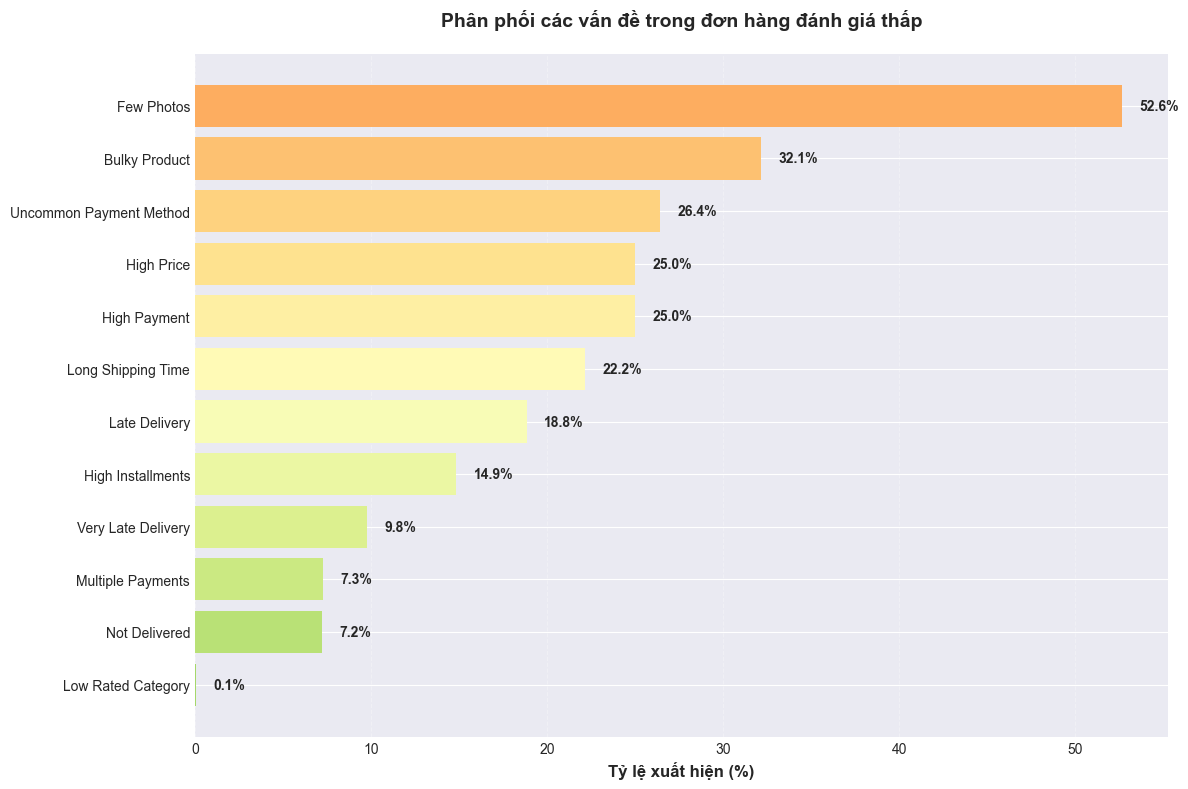


Vấn đề                           Số lượng      Tỷ lệ
Few Photos                         14,883      52.6%
Bulky Product                       9,092      32.1%
Uncommon Payment Method             7,469      26.4%
High Price                          7,071      25.0%
High Payment                        7,070      25.0%
Long Shipping Time                  6,265      22.2%
Late Delivery                       5,331      18.8%
High Installments                   4,201      14.9%
Very Late Delivery                  2,763       9.8%
Multiple Payments                   2,062       7.3%
Not Delivered                       2,045       7.2%
Low Rated Category                     22       0.1%


In [80]:
# Trực quan hóa phân phối các vấn đề
issue_features = [
    'late_delivery', 'very_late_delivery', 'long_shipping_time', 'not_delivered',
    'high_price', 'bulky_product', 'low_rated_category', 'few_photos',
    'high_installments', 'high_payment', 'uncommon_payment_method', 'multiple_payments'
]

# Tính tỷ lệ xuất hiện của từng vấn đề
issue_counts = low_rating_orders[issue_features].sum().sort_values(ascending=True)
issue_percentages = (issue_counts / len(low_rating_orders) * 100)

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.7, len(issue_counts)))
bars = ax.barh(range(len(issue_counts)), issue_percentages, color=colors)

ax.set_yticks(range(len(issue_counts)))
ax.set_yticklabels([label.replace('_', ' ').title() for label in issue_counts.index])
ax.set_xlabel('Tỷ lệ xuất hiện (%)', fontsize=12, fontweight='bold')
ax.set_title('Phân phối các vấn đề trong đơn hàng đánh giá thấp', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Thêm giá trị phần trăm vào cuối mỗi thanh
for i, (bar, val) in enumerate(zip(bars, issue_percentages)):
    ax.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'Vấn đề':<30} {'Số lượng':>10} {'Tỷ lệ':>10}")
print("="*52)
for feature in issue_counts.index[::-1]:
    count = issue_counts[feature]
    pct = issue_percentages[feature]
    print(f"{feature.replace('_', ' ').title():<30} {count:>10,.0f} {pct:>9.1f}%")

##### Chuẩn bị dữ liệu cho thuật toán Association Rules

Chuyển đổi dữ liệu sang định dạng transaction (mỗi đơn hàng là một transaction, các vấn đề là các items).

In [81]:
# Tạo danh sách các features để phân tích
analysis_features = issue_features + ['very_low_rating', 'low_rating']

# Tạo dictionary ánh xạ tên features sang tên dễ đọc
feature_names = {
    'late_delivery': 'Giao hàng trễ',
    'very_late_delivery': 'Giao hàng rất trễ',
    'long_shipping_time': 'Vận chuyển lâu',
    'not_delivered': 'Chưa giao hàng',
    'high_price': 'Giá cao',
    'bulky_product': 'Sản phẩm cồng kềnh',
    'low_rated_category': 'Danh mục đánh giá thấp',
    'few_photos': 'Ảnh sản phẩm ít',
    'high_installments': 'Trả góp nhiều kỳ',
    'high_payment': 'Giá trị thanh toán cao',
    'uncommon_payment_method': 'Phương thức thanh toán ít phổ biến',
    'multiple_payments': 'Nhiều giao dịch thanh toán',
    'very_low_rating': 'Đánh giá rất thấp (1-2⭐)',
    'low_rating': 'Đánh giá thấp (3⭐)'
}

# Chọn dữ liệu cho association rules
df_basket = low_rating_orders[analysis_features].copy()

# Loại bỏ các giao dịch không có vấn đề nào (tất cả đều 0)
df_basket = df_basket[df_basket.sum(axis=1) > 0]

print(f"Số lượng transactions (đơn hàng có ít nhất 1 vấn đề): {len(df_basket):,}")
print(f"Số lượng items (các loại vấn đề): {len(analysis_features)}")
print(f"\nKích thước dữ liệu cho Association Rules: {df_basket.shape}")
print(f"\nThống kê số vấn đề trên mỗi đơn hàng:")
issues_per_order = df_basket.sum(axis=1)
print(f"  - Trung bình: {issues_per_order.mean():.2f} vấn đề/đơn")
print(f"  - Median: {issues_per_order.median():.0f} vấn đề/đơn")
print(f"  - Min: {issues_per_order.min():.0f}, Max: {issues_per_order.max():.0f}")

Số lượng transactions (đơn hàng có ít nhất 1 vấn đề): 28,284
Số lượng items (các loại vấn đề): 14

Kích thước dữ liệu cho Association Rules: (28284, 14)

Thống kê số vấn đề trên mỗi đơn hàng:
  - Trung bình: 3.41 vấn đề/đơn
  - Median: 3 vấn đề/đơn
  - Min: 1, Max: 10


### 4.4.3 Áp dụng thuật toán Apriori

##### Tìm các tập phổ biến (Frequent Itemsets)

In [82]:
# Áp dụng thuật toán Apriori
# Thiết lập min_support thấp để có thể phát hiện các mẫu ít phổ biến nhưng quan trọng
min_support = 0.05  # 5% - xuất hiện trong ít nhất 5% đơn hàng

print("🔍 Đang chạy thuật toán Apriori...")
print(f"   Min Support: {min_support} ({min_support*100}%)")

# Chạy Apriori
frequent_itemsets_apriori = apriori(df_basket, min_support=min_support, use_colnames=True)

print(f"\n✓ Tìm thấy {len(frequent_itemsets_apriori)} tập phổ biến (frequent itemsets)")
print(f"\nPhân phối theo độ dài tập:")
itemset_lengths = frequent_itemsets_apriori['itemsets'].apply(len).value_counts().sort_index()
for length, count in itemset_lengths.items():
    print(f"  - Độ dài {length}: {count} tập")

# Hiển thị top 15 tập phổ biến nhất
print(f"\n📊 Top 15 tập phổ biến nhất (theo support):")
top_itemsets = frequent_itemsets_apriori.nlargest(15, 'support').copy()
top_itemsets['itemsets_str'] = top_itemsets['itemsets'].apply(
    lambda x: ' + '.join([feature_names.get(item, item) for item in x])
)
print(top_itemsets[['itemsets_str', 'support']].to_string(index=False))

🔍 Đang chạy thuật toán Apriori...
   Min Support: 0.05 (5.0%)



✓ Tìm thấy 91 tập phổ biến (frequent itemsets)

Phân phối theo độ dài tập:
  - Độ dài 1: 13 tập
  - Độ dài 2: 41 tập
  - Độ dài 3: 30 tập
  - Độ dài 4: 7 tập

📊 Top 15 tập phổ biến nhất (theo support):
                                     itemsets_str  support
                         Đánh giá rất thấp (1-2⭐) 0.656414
                                  Ảnh sản phẩm ít 0.526199
       Ảnh sản phẩm ít + Đánh giá rất thấp (1-2⭐) 0.353133
                               Đánh giá thấp (3⭐) 0.343586
                               Sản phẩm cồng kềnh 0.321454
               Phương thức thanh toán ít phổ biến 0.264072
                                          Giá cao 0.250000
                           Giá trị thanh toán cao 0.249965
                                   Vận chuyển lâu 0.221503
    Sản phẩm cồng kềnh + Đánh giá rất thấp (1-2⭐) 0.211286
                                    Giao hàng trễ 0.188481
Đánh giá rất thấp (1-2⭐) + Giá trị thanh toán cao 0.181339
        Đánh giá rất thấp (1-2

##### Tạo các luật kết hợp (Association Rules) từ Apriori

In [83]:
# Tạo các luật kết hợp từ frequent itemsets
min_confidence = 0.3  # 30% confidence
min_lift = 1.0  # Lift > 1 có nghĩa là có mối quan hệ tích cực

print("🔍 Đang tạo các luật kết hợp từ Apriori...")
print(f"   Min Confidence: {min_confidence} ({min_confidence*100}%)")
print(f"   Min Lift: {min_lift}")

# Tạo association rules
rules_apriori = association_rules(
    frequent_itemsets_apriori, 
    metric="confidence", 
    min_threshold=min_confidence
)

# Lọc các rules có lift > min_lift
rules_apriori = rules_apriori[rules_apriori['lift'] > min_lift]

print(f"\n✓ Tìm thấy {len(rules_apriori)} luật kết hợp thỏa mãn điều kiện")

if len(rules_apriori) > 0:
    # Sắp xếp theo lift (ưu tiên các mối quan hệ mạnh)
    rules_apriori = rules_apriori.sort_values('lift', ascending=False)
    
    # Thêm cột mô tả dễ đọc
    rules_apriori['antecedents_str'] = rules_apriori['antecedents'].apply(
        lambda x: ' + '.join([feature_names.get(item, item) for item in x])
    )
    rules_apriori['consequents_str'] = rules_apriori['consequents'].apply(
        lambda x: ' + '.join([feature_names.get(item, item) for item in x])
    )
    
    # Hiển thị thống kê
    print(f"\n📈 Thống kê các luật kết hợp:")
    print(f"   Support: {rules_apriori['support'].min():.4f} - {rules_apriori['support'].max():.4f}")
    print(f"   Confidence: {rules_apriori['confidence'].min():.4f} - {rules_apriori['confidence'].max():.4f}")
    print(f"   Lift: {rules_apriori['lift'].min():.4f} - {rules_apriori['lift'].max():.4f}")
    
    # Hiển thị top 20 luật tốt nhất
    print(f"\n📋 Top 20 luật kết hợp mạnh nhất (theo Lift):")
    print("="*120)
    display_cols = ['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']
    top_rules = rules_apriori.head(20)[display_cols].copy()
    top_rules.columns = ['Tiền đề (IF)', 'Hệ quả (THEN)', 'Support', 'Confidence', 'Lift']
    
    for idx, row in top_rules.iterrows():
        print(f"\nLuật {idx+1}:")
        print(f"  IF: {row['Tiền đề (IF)']}")
        print(f"  THEN: {row['Hệ quả (THEN)']}")
        print(f"  Support: {row['Support']:.4f} | Confidence: {row['Confidence']:.4f} | Lift: {row['Lift']:.4f}")
else:
    print("⚠️ Không tìm thấy luật nào thỏa mãn điều kiện. Hãy thử giảm min_confidence hoặc min_lift.")

🔍 Đang tạo các luật kết hợp từ Apriori...
   Min Confidence: 0.3 (30.0%)
   Min Lift: 1.0

✓ Tìm thấy 216 luật kết hợp thỏa mãn điều kiện

📈 Thống kê các luật kết hợp:
   Support: 0.0500 - 0.3531
   Confidence: 0.3011 - 1.0000
   Lift: 1.0013 - 6.2549

📋 Top 20 luật kết hợp mạnh nhất (theo Lift):

Luật 184:
  IF: Giao hàng rất trễ
  THEN: Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ
  Support: 0.0858 | Confidence: 0.8784 | Lift: 6.2549

Luật 172:
  IF: Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ
  THEN: Giao hàng rất trễ
  Support: 0.0858 | Confidence: 0.6110 | Lift: 6.2549

Luật 171:
  IF: Giao hàng rất trễ
  THEN: Ảnh sản phẩm ít + Vận chuyển lâu + Giao hàng trễ
  Support: 0.0517 | Confidence: 0.5291 | Lift: 6.1563

Luật 161:
  IF: Ảnh sản phẩm ít + Vận chuyển lâu + Giao hàng trễ
  THEN: Giao hàng rất trễ
  Support: 0.0517 | Confidence: 0.6014 | Lift: 6.1563

Luật 178:
  IF: Đánh giá rất thấp (1-2⭐) + Giao hàng rất trễ
  THEN: Vận chuyển lâu + Giao hàng trễ

### 4.4.4 Áp dụng thuật toán FP-Growth

##### Tìm các tập phổ biến với FP-Growth

In [84]:
# Áp dụng thuật toán FP-Growth
print("🔍 Đang chạy thuật toán FP-Growth...")
print(f"   Min Support: {min_support} ({min_support*100}%)")

import time
start_time = time.time()

# Chạy FP-Growth
frequent_itemsets_fpgrowth = fpgrowth(df_basket, min_support=min_support, use_colnames=True)

end_time = time.time()
execution_time = end_time - start_time

print(f"\n✓ Tìm thấy {len(frequent_itemsets_fpgrowth)} tập phổ biến (frequent itemsets)")
print(f"⏱️ Thời gian thực thi: {execution_time:.4f} giây")

print(f"\nPhân phối theo độ dài tập:")
itemset_lengths_fp = frequent_itemsets_fpgrowth['itemsets'].apply(len).value_counts().sort_index()
for length, count in itemset_lengths_fp.items():
    print(f"  - Độ dài {length}: {count} tập")

# Hiển thị top 15 tập phổ biến nhất
print(f"\n📊 Top 15 tập phổ biến nhất (theo support):")
top_itemsets_fp = frequent_itemsets_fpgrowth.nlargest(15, 'support').copy()
top_itemsets_fp['itemsets_str'] = top_itemsets_fp['itemsets'].apply(
    lambda x: ' + '.join([feature_names.get(item, item) for item in x])
)
print(top_itemsets_fp[['itemsets_str', 'support']].to_string(index=False))

🔍 Đang chạy thuật toán FP-Growth...
   Min Support: 0.05 (5.0%)

✓ Tìm thấy 91 tập phổ biến (frequent itemsets)
⏱️ Thời gian thực thi: 3.3828 giây

Phân phối theo độ dài tập:
  - Độ dài 1: 13 tập
  - Độ dài 2: 41 tập
  - Độ dài 3: 30 tập
  - Độ dài 4: 7 tập

📊 Top 15 tập phổ biến nhất (theo support):
                                     itemsets_str  support
                         Đánh giá rất thấp (1-2⭐) 0.656414
                                  Ảnh sản phẩm ít 0.526199
       Ảnh sản phẩm ít + Đánh giá rất thấp (1-2⭐) 0.353133
                               Đánh giá thấp (3⭐) 0.343586
                               Sản phẩm cồng kềnh 0.321454
               Phương thức thanh toán ít phổ biến 0.264072
                                          Giá cao 0.250000
                           Giá trị thanh toán cao 0.249965
                                   Vận chuyển lâu 0.221503
    Sản phẩm cồng kềnh + Đánh giá rất thấp (1-2⭐) 0.211286
                                    Giao hàng trễ

##### Tạo các luật kết hợp từ FP-Growth

In [85]:
# Tạo các luật kết hợp từ FP-Growth
print("🔍 Đang tạo các luật kết hợp từ FP-Growth...")
print(f"   Min Confidence: {min_confidence} ({min_confidence*100}%)")
print(f"   Min Lift: {min_lift}")

# Tạo association rules
rules_fpgrowth = association_rules(
    frequent_itemsets_fpgrowth, 
    metric="confidence", 
    min_threshold=min_confidence
)

# Lọc các rules có lift > min_lift
rules_fpgrowth = rules_fpgrowth[rules_fpgrowth['lift'] > min_lift]

print(f"\n✓ Tìm thấy {len(rules_fpgrowth)} luật kết hợp thỏa mãn điều kiện")

if len(rules_fpgrowth) > 0:
    # Sắp xếp theo lift
    rules_fpgrowth = rules_fpgrowth.sort_values('lift', ascending=False)
    
    # Thêm cột mô tả dễ đọc
    rules_fpgrowth['antecedents_str'] = rules_fpgrowth['antecedents'].apply(
        lambda x: ' + '.join([feature_names.get(item, item) for item in x])
    )
    rules_fpgrowth['consequents_str'] = rules_fpgrowth['consequents'].apply(
        lambda x: ' + '.join([feature_names.get(item, item) for item in x])
    )
    
    # Hiển thị thống kê
    print(f"\n📈 Thống kê các luật kết hợp:")
    print(f"   Support: {rules_fpgrowth['support'].min():.4f} - {rules_fpgrowth['support'].max():.4f}")
    print(f"   Confidence: {rules_fpgrowth['confidence'].min():.4f} - {rules_fpgrowth['confidence'].max():.4f}")
    print(f"   Lift: {rules_fpgrowth['lift'].min():.4f} - {rules_fpgrowth['lift'].max():.4f}")
    
    # Hiển thị top 20 luật tốt nhất
    print(f"\n📋 Top 20 luật kết hợp mạnh nhất (theo Lift):")
    print("="*120)
    display_cols = ['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']
    top_rules_fp = rules_fpgrowth.head(20)[display_cols].copy()
    top_rules_fp.columns = ['Tiền đề (IF)', 'Hệ quả (THEN)', 'Support', 'Confidence', 'Lift']
    
    for idx, row in top_rules_fp.iterrows():
        print(f"\nLuật {idx+1}:")
        print(f"  IF: {row['Tiền đề (IF)']}")
        print(f"  THEN: {row['Hệ quả (THEN)']}")
        print(f"  Support: {row['Support']:.4f} | Confidence: {row['Confidence']:.4f} | Lift: {row['Lift']:.4f}")
else:
    print("⚠️ Không tìm thấy luật nào thỏa mãn điều kiện.")

🔍 Đang tạo các luật kết hợp từ FP-Growth...
   Min Confidence: 0.3 (30.0%)
   Min Lift: 1.0

✓ Tìm thấy 216 luật kết hợp thỏa mãn điều kiện

📈 Thống kê các luật kết hợp:
   Support: 0.0500 - 0.3531
   Confidence: 0.3011 - 1.0000
   Lift: 1.0013 - 6.2549

📋 Top 20 luật kết hợp mạnh nhất (theo Lift):

Luật 184:
  IF: Giao hàng rất trễ
  THEN: Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ
  Support: 0.0858 | Confidence: 0.8784 | Lift: 6.2549

Luật 172:
  IF: Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ
  THEN: Giao hàng rất trễ
  Support: 0.0858 | Confidence: 0.6110 | Lift: 6.2549

Luật 203:
  IF: Giao hàng rất trễ
  THEN: Ảnh sản phẩm ít + Vận chuyển lâu + Giao hàng trễ
  Support: 0.0517 | Confidence: 0.5291 | Lift: 6.1563

Luật 193:
  IF: Ảnh sản phẩm ít + Vận chuyển lâu + Giao hàng trễ
  THEN: Giao hàng rất trễ
  Support: 0.0517 | Confidence: 0.6014 | Lift: 6.1563

Luật 178:
  IF: Đánh giá rất thấp (1-2⭐) + Giao hàng rất trễ
  THEN: Vận chuyển lâu + Giao hàng t

### 4.4.5 So sánh Apriori vs FP-Growth

In [86]:
# So sánh hiệu năng và kết quả của hai thuật toán
comparison_data = {
    'Metric': [
        'Số lượng Frequent Itemsets',
        'Số lượng Rules',
        'Thời gian thực thi (giây)'
    ],
    'Apriori': [
        len(frequent_itemsets_apriori),
        len(rules_apriori) if len(rules_apriori) > 0 else 0,
        'N/A'
    ],
    'FP-Growth': [
        len(frequent_itemsets_fpgrowth),
        len(rules_fpgrowth) if len(rules_fpgrowth) > 0 else 0,
        f'{execution_time:.4f}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("SO SÁNH APRIORI VS FP-GROWTH")
print("="*80)
print(comparison_df.to_string(index=False))

# Kiểm tra xem kết quả có giống nhau không
if len(rules_apriori) > 0 and len(rules_fpgrowth) > 0:
    # So sánh số lượng itemsets và rules
    print(f"\n📊 Phân tích kết quả:")
    print(f"   - Cả hai thuật toán tìm được cùng số lượng frequent itemsets: {len(frequent_itemsets_apriori) == len(frequent_itemsets_fpgrowth)}")
    print(f"   - Cả hai thuật toán tạo được cùng số lượng rules: {len(rules_apriori) == len(rules_fpgrowth)}")
    
    if len(rules_apriori) == len(rules_fpgrowth):
        print(f"\n✅ Kết quả: Apriori và FP-Growth cho kết quả giống hệt nhau về số lượng")
        print(f"   FP-Growth thường nhanh hơn trên tập dữ liệu lớn do không cần quét database nhiều lần")
    else:
        print(f"\n⚠️ Có sự khác biệt nhỏ về số lượng rules giữa hai thuật toán")
else:
    print(f"\n⚠️ Ít nhất một thuật toán không tìm thấy rules")


SO SÁNH APRIORI VS FP-GROWTH
                    Metric Apriori FP-Growth
Số lượng Frequent Itemsets      91        91
            Số lượng Rules     216       216
 Thời gian thực thi (giây)     N/A    3.3828

📊 Phân tích kết quả:
   - Cả hai thuật toán tìm được cùng số lượng frequent itemsets: True
   - Cả hai thuật toán tạo được cùng số lượng rules: True

✅ Kết quả: Apriori và FP-Growth cho kết quả giống hệt nhau về số lượng
   FP-Growth thường nhanh hơn trên tập dữ liệu lớn do không cần quét database nhiều lần


### 4.4.6 Đánh giá và trực quan hóa các luật kết hợp

##### Đánh giá theo các metrics: Support, Confidence, Lift

In [87]:
# Sử dụng kết quả từ FP-Growth (hoặc Apriori - kết quả tương tự)
rules = rules_fpgrowth.copy() if len(rules_fpgrowth) > 0 else rules_apriori.copy()

if len(rules) > 0:
    print("📊 ĐÁNH GIÁ CÁC LUẬT KẾT HỢP")
    print("="*80)
    
    # 1. Phân tích Support
    print("\n1. SUPPORT - Tần suất xuất hiện của luật trong tất cả transactions")
    print(f"   Support đo lường mức độ phổ biến của một tập items trong dữ liệu")
    print(f"   - Trung bình: {rules['support'].mean():.4f}")
    print(f"   - Median: {rules['support'].median():.4f}")
    print(f"   - Khoảng: [{rules['support'].min():.4f}, {rules['support'].max():.4f}]")
    
    # 2. Phân tích Confidence
    print("\n2. CONFIDENCE - Độ tin cậy của luật")
    print(f"   Confidence đo lường khả năng hệ quả xảy ra khi có tiền đề")
    print(f"   Công thức: Confidence(A → B) = Support(A ∪ B) / Support(A)")
    print(f"   - Trung bình: {rules['confidence'].mean():.4f}")
    print(f"   - Median: {rules['confidence'].median():.4f}")
    print(f"   - Khoảng: [{rules['confidence'].min():.4f}, {rules['confidence'].max():.4f}]")
    
    # 3. Phân tích Lift
    print("\n3. LIFT - Mức độ liên kết giữa tiền đề và hệ quả")
    print(f"   Lift đo lường mức độ phụ thuộc giữa tiền đề và hệ quả")
    print(f"   Công thức: Lift(A → B) = Confidence(A → B) / Support(B)")
    print(f"   - Lift > 1: Mối quan hệ tích cực (A và B có xu hướng xuất hiện cùng nhau)")
    print(f"   - Lift = 1: Độc lập (không có mối liên hệ)")
    print(f"   - Lift < 1: Mối quan hệ tiêu cực (A và B ít xuất hiện cùng nhau)")
    print(f"   ")
    print(f"   - Trung bình: {rules['lift'].mean():.4f}")
    print(f"   - Median: {rules['lift'].median():.4f}")
    print(f"   - Khoảng: [{rules['lift'].min():.4f}, {rules['lift'].max():.4f}]")
    
    # Phân loại rules theo lift
    print(f"\n4. PHÂN LOẠI THEO LIFT:")
    strong_rules = rules[rules['lift'] > 1.5]
    moderate_rules = rules[(rules['lift'] > 1.2) & (rules['lift'] <= 1.5)]
    weak_rules = rules[(rules['lift'] > 1.0) & (rules['lift'] <= 1.2)]
    
    print(f"   - Mối quan hệ mạnh (Lift > 1.5): {len(strong_rules)} luật ({len(strong_rules)/len(rules)*100:.1f}%)")
    print(f"   - Mối quan hệ trung bình (1.2 < Lift ≤ 1.5): {len(moderate_rules)} luật ({len(moderate_rules)/len(rules)*100:.1f}%)")
    print(f"   - Mối quan hệ yếu (1.0 < Lift ≤ 1.2): {len(weak_rules)} luật ({len(weak_rules)/len(rules)*100:.1f}%)")
else:
    print("⚠️ Không có luật kết hợp để đánh giá")

📊 ĐÁNH GIÁ CÁC LUẬT KẾT HỢP

1. SUPPORT - Tần suất xuất hiện của luật trong tất cả transactions
   Support đo lường mức độ phổ biến của một tập items trong dữ liệu
   - Trung bình: 0.0859
   - Median: 0.0823
   - Khoảng: [0.0500, 0.3531]

2. CONFIDENCE - Độ tin cậy của luật
   Confidence đo lường khả năng hệ quả xảy ra khi có tiền đề
   Công thức: Confidence(A → B) = Support(A ∪ B) / Support(A)
   - Trung bình: 0.5824
   - Median: 0.5402
   - Khoảng: [0.3011, 1.0000]

3. LIFT - Mức độ liên kết giữa tiền đề và hệ quả
   Lift đo lường mức độ phụ thuộc giữa tiền đề và hệ quả
   Công thức: Lift(A → B) = Confidence(A → B) / Support(B)
   - Lift > 1: Mối quan hệ tích cực (A và B có xu hướng xuất hiện cùng nhau)
   - Lift = 1: Độc lập (không có mối liên hệ)
   - Lift < 1: Mối quan hệ tiêu cực (A và B ít xuất hiện cùng nhau)
   
   - Trung bình: 2.5773
   - Median: 1.8106
   - Khoảng: [1.0013, 6.2549]

4. PHÂN LOẠI THEO LIFT:
   - Mối quan hệ mạnh (Lift > 1.5): 130 luật (60.2%)
   - Mối quan h

##### Trực quan hóa phân phối các metrics

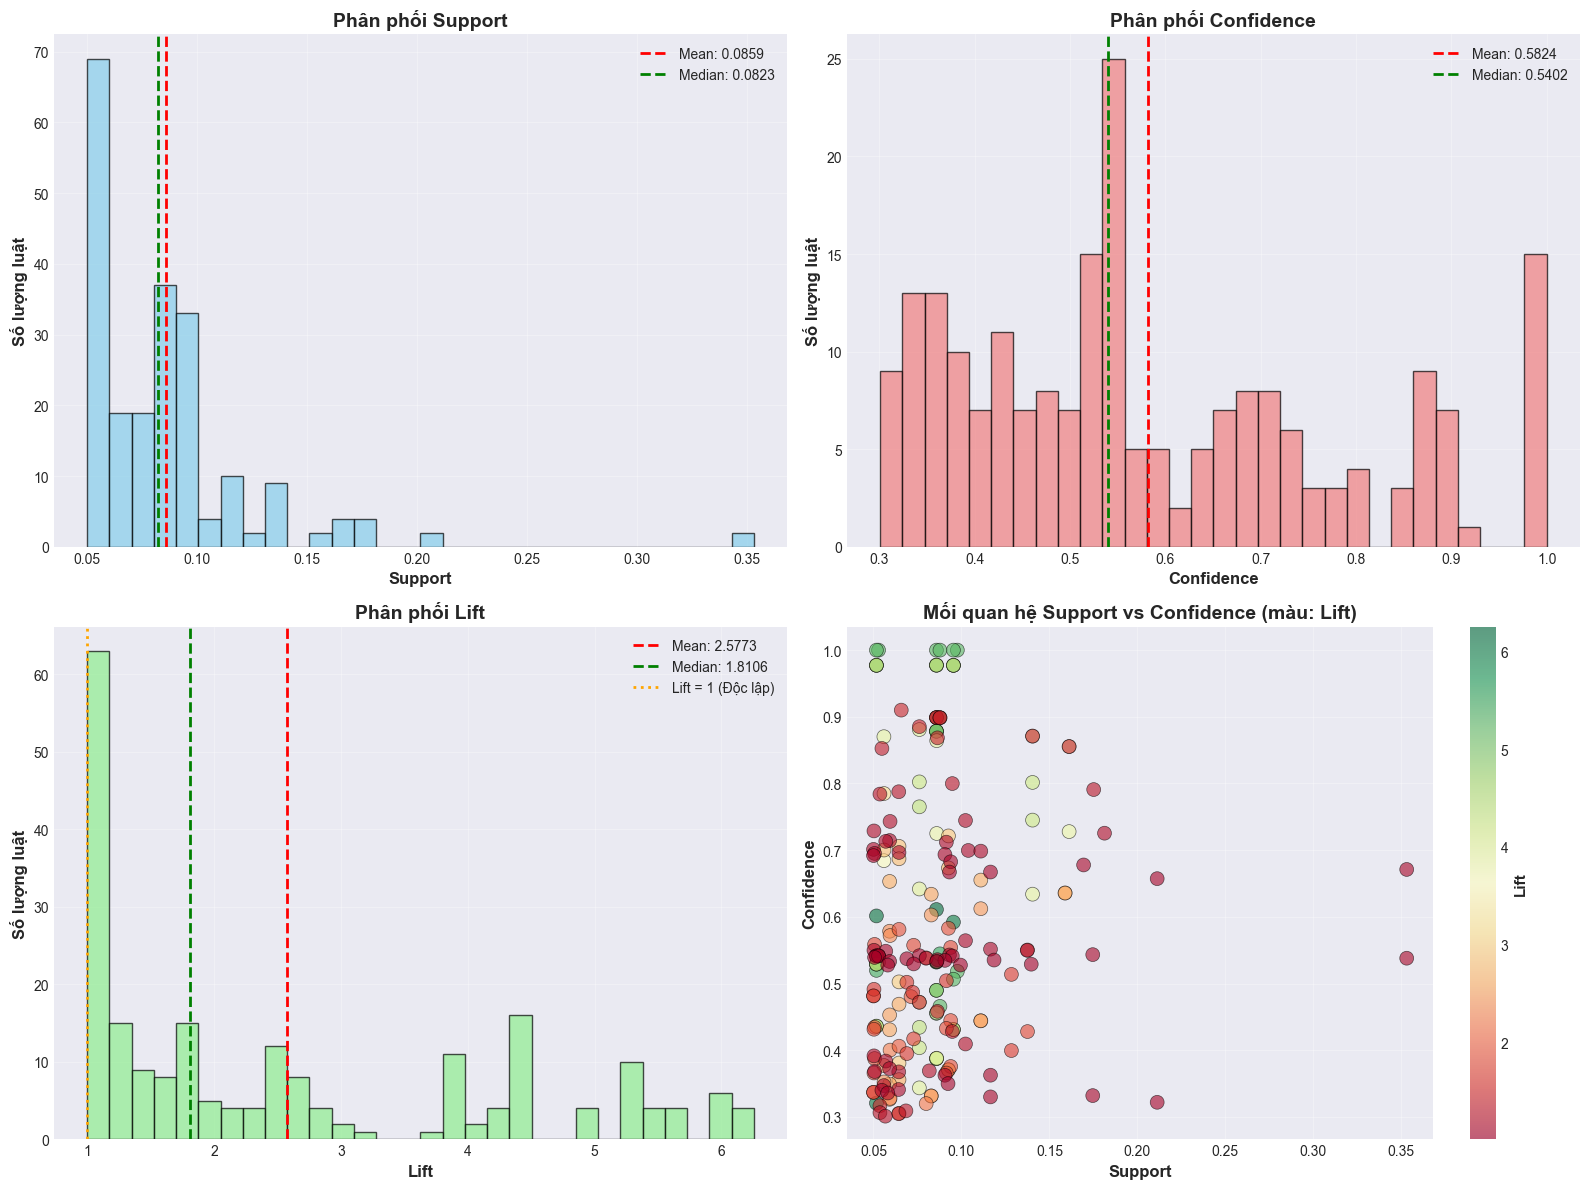

In [88]:
if len(rules) > 0:
    # Biểu đồ phân phối Support, Confidence, Lift
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Histogram Support
    axes[0, 0].hist(rules['support'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(rules['support'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rules["support"].mean():.4f}')
    axes[0, 0].axvline(rules['support'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {rules["support"].median():.4f}')
    axes[0, 0].set_xlabel('Support', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Số lượng luật', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Phân phối Support', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # 2. Histogram Confidence
    axes[0, 1].hist(rules['confidence'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(rules['confidence'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rules["confidence"].mean():.4f}')
    axes[0, 1].axvline(rules['confidence'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {rules["confidence"].median():.4f}')
    axes[0, 1].set_xlabel('Confidence', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Số lượng luật', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Phân phối Confidence', fontsize=14, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # 3. Histogram Lift
    axes[1, 0].hist(rules['lift'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(rules['lift'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rules["lift"].mean():.4f}')
    axes[1, 0].axvline(rules['lift'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {rules["lift"].median():.4f}')
    axes[1, 0].axvline(1.0, color='orange', linestyle=':', linewidth=2, label='Lift = 1 (Độc lập)')
    axes[1, 0].set_xlabel('Lift', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Số lượng luật', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Phân phối Lift', fontsize=14, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # 4. Scatter plot: Support vs Confidence (màu sắc theo Lift)
    scatter = axes[1, 1].scatter(rules['support'], rules['confidence'], 
                                  c=rules['lift'], s=100, alpha=0.6, 
                                  cmap='RdYlGn', edgecolors='black', linewidth=0.5)
    axes[1, 1].set_xlabel('Support', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Confidence', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Mối quan hệ Support vs Confidence (màu: Lift)', fontsize=14, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    # Thêm colorbar
    cbar = plt.colorbar(scatter, ax=axes[1, 1])
    cbar.set_label('Lift', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không có luật để trực quan hóa")

##### Trực quan hóa Top Rules theo từng metric

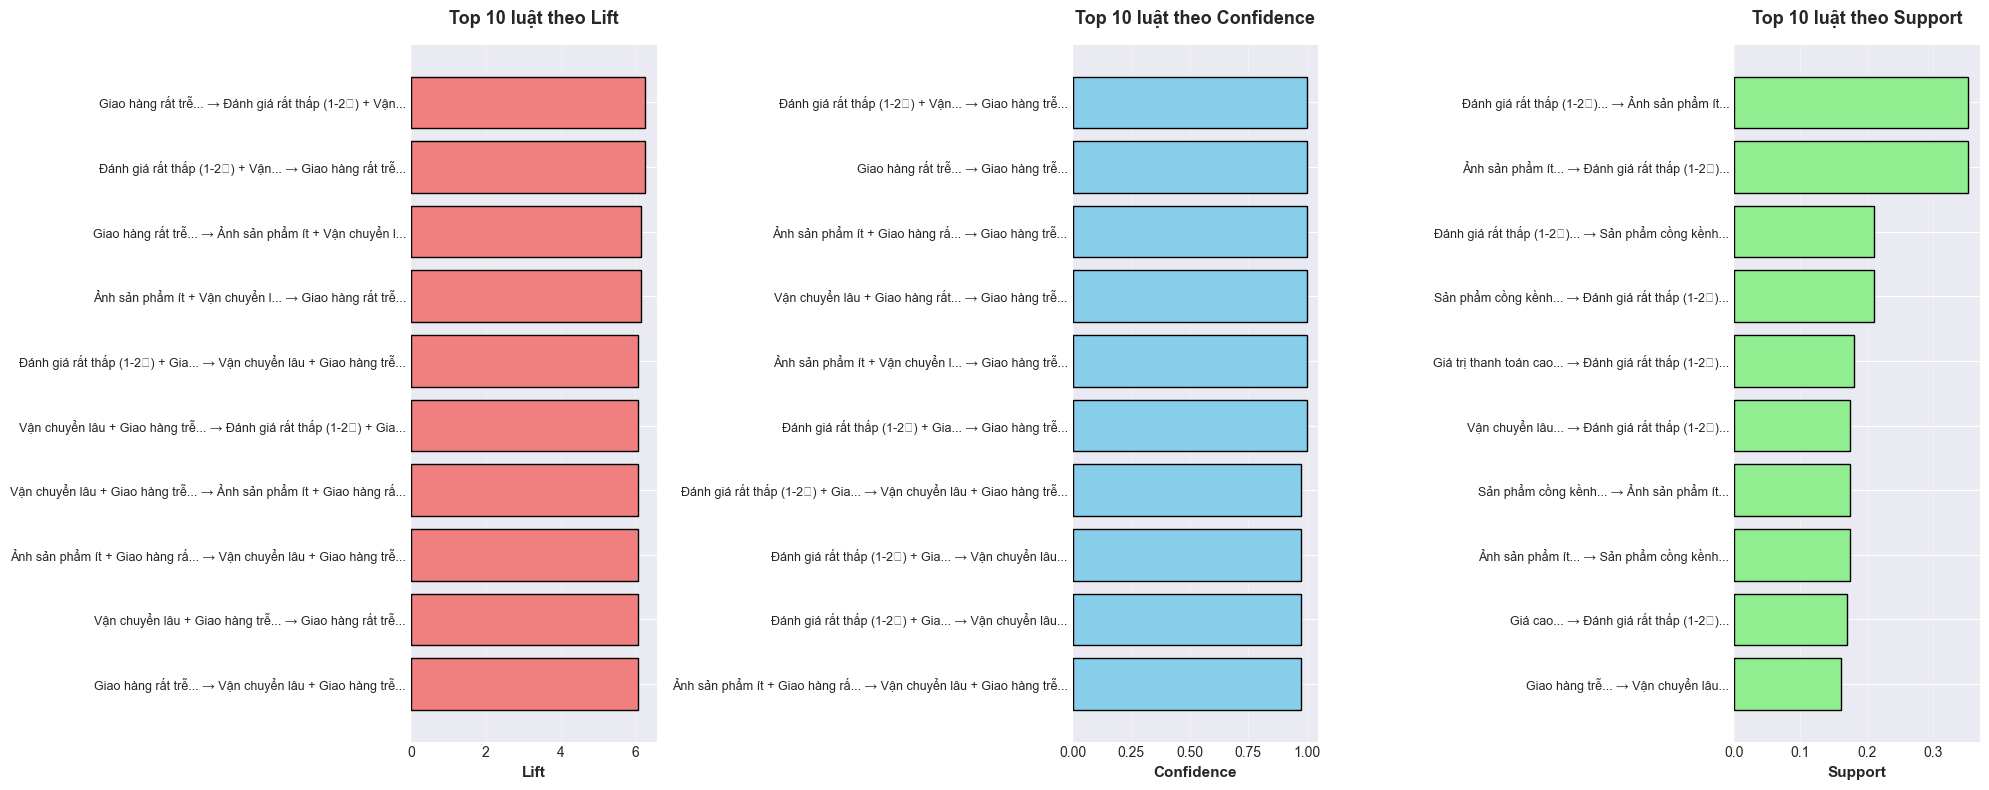

In [89]:
if len(rules) > 0:
    # Top 10 rules theo Lift
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    # 1. Top 10 theo Lift
    top_lift = rules.nlargest(10, 'lift').copy()
    top_lift['rule'] = top_lift.apply(
        lambda x: f"{x['antecedents_str'][:30]}... → {x['consequents_str'][:30]}...", axis=1
    )
    
    axes[0].barh(range(len(top_lift)), top_lift['lift'], color='lightcoral', edgecolor='black')
    axes[0].set_yticks(range(len(top_lift)))
    axes[0].set_yticklabels(top_lift['rule'], fontsize=9)
    axes[0].set_xlabel('Lift', fontsize=11, fontweight='bold')
    axes[0].set_title('Top 10 luật theo Lift', fontsize=13, fontweight='bold', pad=15)
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()
    
    # 2. Top 10 theo Confidence
    top_conf = rules.nlargest(10, 'confidence').copy()
    top_conf['rule'] = top_conf.apply(
        lambda x: f"{x['antecedents_str'][:30]}... → {x['consequents_str'][:30]}...", axis=1
    )
    
    axes[1].barh(range(len(top_conf)), top_conf['confidence'], color='skyblue', edgecolor='black')
    axes[1].set_yticks(range(len(top_conf)))
    axes[1].set_yticklabels(top_conf['rule'], fontsize=9)
    axes[1].set_xlabel('Confidence', fontsize=11, fontweight='bold')
    axes[1].set_title('Top 10 luật theo Confidence', fontsize=13, fontweight='bold', pad=15)
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()
    
    # 3. Top 10 theo Support
    top_supp = rules.nlargest(10, 'support').copy()
    top_supp['rule'] = top_supp.apply(
        lambda x: f"{x['antecedents_str'][:30]}... → {x['consequents_str'][:30]}...", axis=1
    )
    
    axes[2].barh(range(len(top_supp)), top_supp['support'], color='lightgreen', edgecolor='black')
    axes[2].set_yticks(range(len(top_supp)))
    axes[2].set_yticklabels(top_supp['rule'], fontsize=9)
    axes[2].set_xlabel('Support', fontsize=11, fontweight='bold')
    axes[2].set_title('Top 10 luật theo Support', fontsize=13, fontweight='bold', pad=15)
    axes[2].grid(axis='x', alpha=0.3)
    axes[2].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không có luật để trực quan hóa")

##### Phân tích các luật theo nhóm vấn đề


PHÂN TÍCH CÁC LUẬT THEO NHÓM VẤN ĐỀ
           support         confidence    lift
             count    mean       mean    mean
category                                     
Giao hàng       82  0.0839     0.6940  4.1495
Hỗn hợp         53  0.0851     0.5256  1.4073
Sản phẩm        68  0.0905     0.5021  1.7033
Thanh toán      13  0.0769     0.5301  2.0013


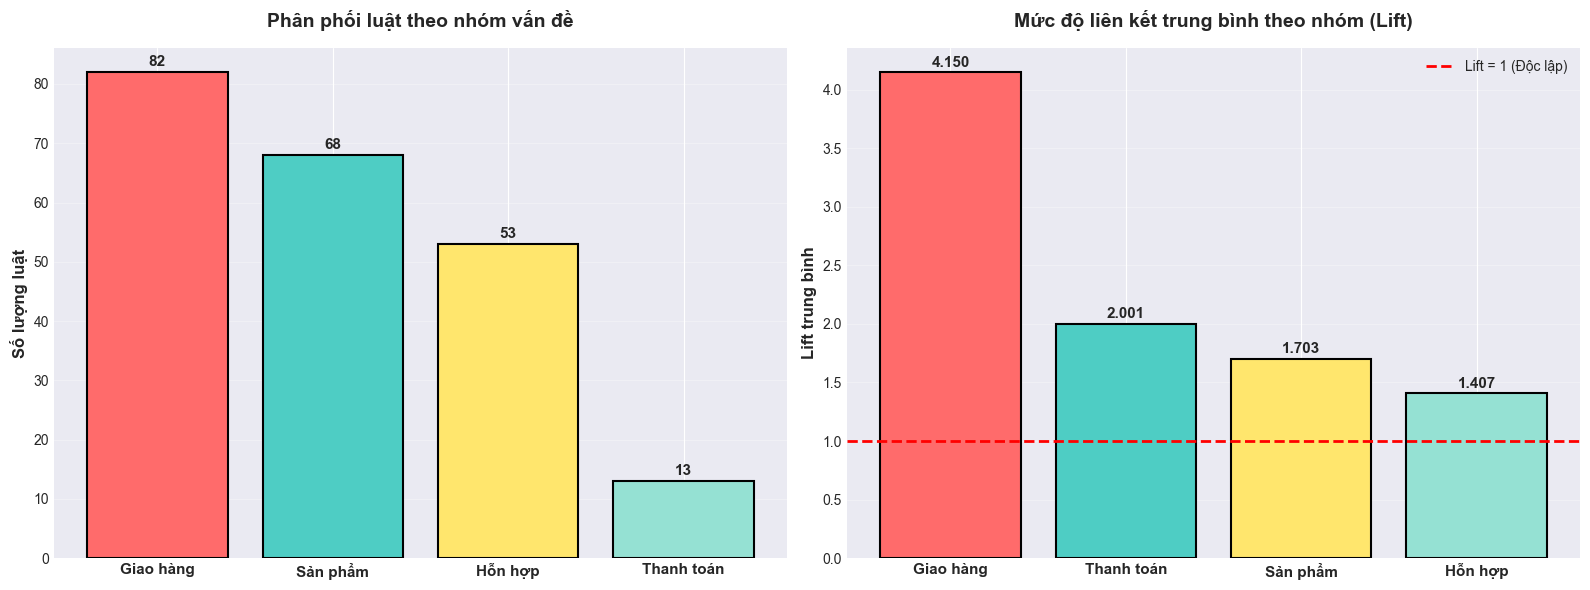

In [90]:
if len(rules) > 0:
    # Phân loại các luật theo nhóm vấn đề chính
    delivery_issues = ['late_delivery', 'very_late_delivery', 'long_shipping_time', 'not_delivered']
    product_issues = ['high_price', 'bulky_product', 'low_rated_category', 'few_photos']
    payment_issues = ['high_installments', 'high_payment', 'uncommon_payment_method', 'multiple_payments']
    
    def categorize_rule(antecedents, consequents):
        """Phân loại luật theo nhóm vấn đề"""
        all_items = list(antecedents) + list(consequents)
        
        delivery_count = sum(1 for item in all_items if item in delivery_issues)
        product_count = sum(1 for item in all_items if item in product_issues)
        payment_count = sum(1 for item in all_items if item in payment_issues)
        
        if delivery_count > product_count and delivery_count > payment_count:
            return 'Giao hàng'
        elif product_count > delivery_count and product_count > payment_count:
            return 'Sản phẩm'
        elif payment_count > delivery_count and payment_count > product_count:
            return 'Thanh toán'
        else:
            return 'Hỗn hợp'
    
    rules['category'] = rules.apply(
        lambda x: categorize_rule(x['antecedents'], x['consequents']), axis=1
    )
    
    # Thống kê theo nhóm
    category_stats = rules.groupby('category').agg({
        'support': ['count', 'mean'],
        'confidence': 'mean',
        'lift': 'mean'
    }).round(4)
    
    print("\n" + "="*80)
    print("PHÂN TÍCH CÁC LUẬT THEO NHÓM VẤN ĐỀ")
    print("="*80)
    print(category_stats)
    
    # Biểu đồ phân phối theo nhóm
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Số lượng luật theo nhóm
    category_counts = rules['category'].value_counts()
    colors_cat = ['#FF6B6B', '#4ECDC4', '#FFE66D', '#95E1D3']
    axes[0].bar(range(len(category_counts)), category_counts.values, 
                color=colors_cat[:len(category_counts)], edgecolor='black', linewidth=1.5)
    axes[0].set_xticks(range(len(category_counts)))
    axes[0].set_xticklabels(category_counts.index, fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Số lượng luật', fontsize=12, fontweight='bold')
    axes[0].set_title('Phân phối luật theo nhóm vấn đề', fontsize=14, fontweight='bold', pad=15)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Thêm giá trị lên trên cột
    for i, v in enumerate(category_counts.values):
        axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # 2. Lift trung bình theo nhóm
    avg_lift = rules.groupby('category')['lift'].mean().sort_values(ascending=False)
    axes[1].bar(range(len(avg_lift)), avg_lift.values, 
                color=colors_cat[:len(avg_lift)], edgecolor='black', linewidth=1.5)
    axes[1].set_xticks(range(len(avg_lift)))
    axes[1].set_xticklabels(avg_lift.index, fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Lift trung bình', fontsize=12, fontweight='bold')
    axes[1].set_title('Mức độ liên kết trung bình theo nhóm (Lift)', fontsize=14, fontweight='bold', pad=15)
    axes[1].grid(axis='y', alpha=0.3)
    axes[1].axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Lift = 1 (Độc lập)')
    axes[1].legend()
    
    # Thêm giá trị lên trên cột
    for i, v in enumerate(avg_lift.values):
        axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không có luật để phân tích")

##### Network Graph - Trực quan hóa mối quan hệ giữa các vấn đề

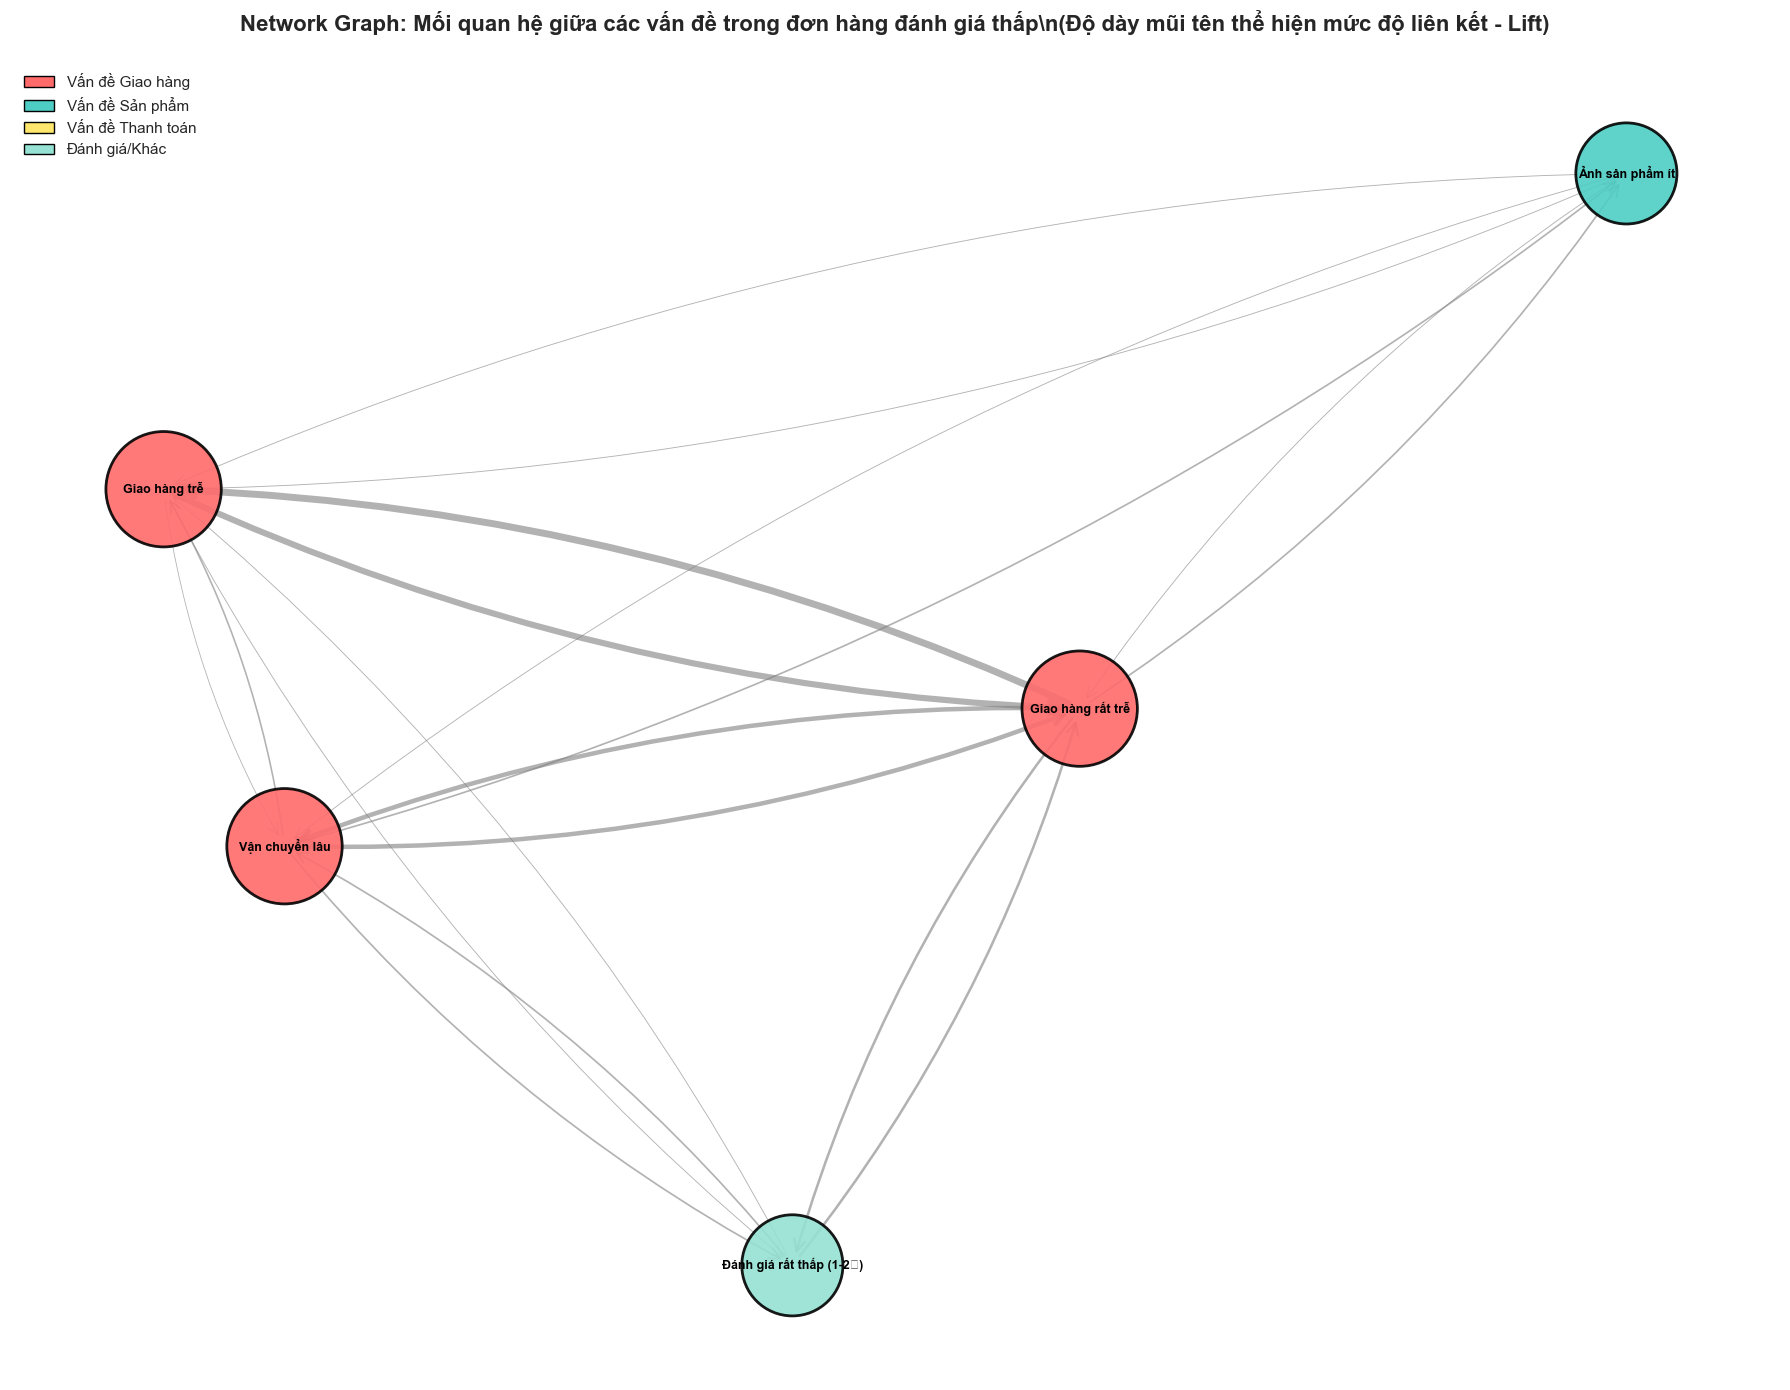


💡 Giải thích Network Graph:
   - Mỗi node (điểm) đại diện cho một vấn đề
   - Mũi tên chỉ hướng mối quan hệ: A → B nghĩa là 'khi có A thì thường có B'
   - Độ dày của mũi tên thể hiện độ mạnh của mối liên kết (Lift)
   - Kích thước node tỉ lệ với số lượng kết nối (degree)
   - Màu sắc phân biệt nhóm vấn đề: Đỏ=Giao hàng, Xanh=Sản phẩm, Vàng=Thanh toán


In [91]:
if len(rules_apriori) > 0:
    import networkx as nx
    from matplotlib.patches import FancyBboxPatch
    
    # Định nghĩa các nhóm vấn đề
    delivery_issues = ['late_delivery', 'very_late_delivery', 'long_shipping_time', 'not_delivered']
    product_issues = ['high_price', 'bulky_product', 'low_rated_category', 'few_photos']
    payment_issues = ['high_installments', 'high_payment', 'uncommon_payment_method', 'multiple_payments']
    
    # Chọn top rules có lift cao nhất để vẽ
    top_rules_network = rules_apriori.nlargest(15, 'lift')
    
    # Tạo graph
    G = nx.DiGraph()
    
    # Thêm edges với trọng số là lift
    for idx, row in top_rules_network.iterrows():
        for antecedent in row['antecedents']:
            for consequent in row['consequents']:
                ant_label = feature_names.get(antecedent, antecedent)
                cons_label = feature_names.get(consequent, consequent)
                
                # Nếu edge đã tồn tại, cộng thêm lift
                if G.has_edge(ant_label, cons_label):
                    G[ant_label][cons_label]['weight'] += row['lift']
                    G[ant_label][cons_label]['count'] += 1
                else:
                    G.add_edge(ant_label, cons_label, weight=row['lift'], count=1)
    
    # Vẽ network graph
    fig, ax = plt.subplots(figsize=(18, 14))
    
    # Layout
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    
    # Tính độ lớn của nodes dựa trên degree
    node_sizes = [G.degree(node) * 800 + 500 for node in G.nodes()]
    
    # Phân loại nodes theo nhóm vấn đề
    node_colors = []
    for node in G.nodes():
        # Tìm key tương ứng với label
        node_key = [k for k, v in feature_names.items() if v == node]
        if node_key:
            node_key = node_key[0]
            if node_key in delivery_issues:
                node_colors.append('#FF6B6B')  # Đỏ - Giao hàng
            elif node_key in product_issues:
                node_colors.append('#4ECDC4')  # Xanh - Sản phẩm
            elif node_key in payment_issues:
                node_colors.append('#FFE66D')  # Vàng - Thanh toán
            else:
                node_colors.append('#95E1D3')  # Xanh nhạt - Khác
        else:
            node_colors.append('#95E1D3')
    
    # Vẽ edges với độ dày tỉ lệ với lift
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    max_weight = max(weights) if weights else 1
    edge_widths = [w / max_weight * 5 for w in weights]
    
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6, 
                          edge_color='gray', arrows=True, 
                          arrowsize=20, arrowstyle='->', 
                          connectionstyle='arc3,rad=0.1', ax=ax)
    
    # Vẽ nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                          node_color=node_colors, alpha=0.9,
                          edgecolors='black', linewidths=2, ax=ax)
    
    # Vẽ labels
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', 
                           font_family='sans-serif', ax=ax)
    
    # Thêm legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#FF6B6B', edgecolor='black', label='Vấn đề Giao hàng'),
        Patch(facecolor='#4ECDC4', edgecolor='black', label='Vấn đề Sản phẩm'),
        Patch(facecolor='#FFE66D', edgecolor='black', label='Vấn đề Thanh toán'),
        Patch(facecolor='#95E1D3', edgecolor='black', label='Đánh giá/Khác')
    ]
    ax.legend(handles=legend_elements, loc='upper left', fontsize=11, framealpha=0.9)
    
    ax.set_title('Network Graph: Mối quan hệ giữa các vấn đề trong đơn hàng đánh giá thấp\\n(Độ dày mũi tên thể hiện mức độ liên kết - Lift)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Giải thích Network Graph:")
    print("   - Mỗi node (điểm) đại diện cho một vấn đề")
    print("   - Mũi tên chỉ hướng mối quan hệ: A → B nghĩa là 'khi có A thì thường có B'")
    print("   - Độ dày của mũi tên thể hiện độ mạnh của mối liên kết (Lift)")
    print("   - Kích thước node tỉ lệ với số lượng kết nối (degree)")
    print("   - Màu sắc phân biệt nhóm vấn đề: Đỏ=Giao hàng, Xanh=Sản phẩm, Vàng=Thanh toán")
else:
    print("⚠️ Không có luật để vẽ network graph")

### 4.4.7 Diễn giải kết quả và Insights

##### Tóm tắt các luật kết hợp quan trọng nhất

In [92]:
if len(rules_apriori) > 0:
    # Định nghĩa các nhóm vấn đề
    delivery_issues = ['late_delivery', 'very_late_delivery', 'long_shipping_time', 'not_delivered']
    product_issues = ['high_price', 'bulky_product', 'low_rated_category', 'few_photos']
    payment_issues = ['high_installments', 'high_payment', 'uncommon_payment_method', 'multiple_payments']
    
    print("="*100)
    print("DIỄN GIẢI CÁC LUẬT KẾT HỢP QUAN TRỌNG NHẤT")
    print("="*100)
    
    # Lấy top 10 luật có lift cao nhất
    top_insights = rules_apriori.nlargest(10, 'lift').copy()
    
    for i, (idx, row) in enumerate(top_insights.iterrows(), 1):
        print(f"\n{'='*100}")
        print(f"LUẬT {i}: (Lift = {row['lift']:.3f})")
        print(f"{'='*100}")
        
        # Tiền đề và hệ quả
        print(f"\n📍 LUẬT:")
        print(f"   IF:   {row['antecedents_str']}")
        print(f"   THEN: {row['consequents_str']}")
        
        # Các metrics
        print(f"\n📊 CÁC CHỈ SỐ:")
        print(f"   • Support:    {row['support']:.4f} ({row['support']*100:.2f}%)")
        print(f"     → Xuất hiện trong {row['support']*100:.2f}% tổng số đơn hàng đánh giá thấp")
        
        print(f"\n   • Confidence: {row['confidence']:.4f} ({row['confidence']*100:.2f}%)")
        print(f"     → Khi có {row['antecedents_str']}, có {row['confidence']*100:.2f}% khả năng xảy ra {row['consequents_str']}")
        
        print(f"\n   • Lift:       {row['lift']:.4f}")
        if row['lift'] > 1.5:
            strength = "RẤT MẠNH"
        elif row['lift'] > 1.2:
            strength = "MẠNH"
        else:
            strength = "VỪA PHẢI"
        print(f"     → Mối liên kết {strength}: {row['antecedents_str']} và {row['consequents_str']}")
        print(f"     → Xác suất xảy ra cùng nhau cao gấp {row['lift']:.2f} lần so với ngẫu nhiên")
        
        # Leverage và conviction
        print(f"\n   • Leverage:   {row['leverage']:.4f}")
        print(f"   • Conviction: {row['conviction']:.4f}")
        
        # Diễn giải
        print(f"\n💡 DIỄN GIẢI:")
        antecedents_list = list(row['antecedents'])
        consequents_list = list(row['consequents'])
        
        # Phân loại vấn đề
        ant_categories = []
        cons_categories = []
        
        for item in antecedents_list:
            if item in delivery_issues:
                ant_categories.append("giao hàng")
            elif item in product_issues:
                ant_categories.append("sản phẩm")
            elif item in payment_issues:
                ant_categories.append("thanh toán")
            else:
                ant_categories.append("đánh giá")
        
        for item in consequents_list:
            if item in delivery_issues:
                cons_categories.append("giao hàng")
            elif item in product_issues:
                cons_categories.append("sản phẩm")
            elif item in payment_issues:
                cons_categories.append("thanh toán")
            else:
                cons_categories.append("đánh giá")
        
        print(f"   Các đơn hàng gặp vấn đề về {', '.join(set(ant_categories))} thường")
        print(f"   đi kèm với vấn đề về {', '.join(set(cons_categories))}. Điều này cho thấy")
        print(f"   mối quan hệ mạnh mẽ giữa các vấn đề này trong trải nghiệm khách hàng.")
    
    print(f"\n{'='*100}")
    print("KẾT THÚC PHÂN TÍCH TOP LUẬT")
    print(f"{'='*100}")
else:
    print("⚠️ Không có luật để diễn giải")

DIỄN GIẢI CÁC LUẬT KẾT HỢP QUAN TRỌNG NHẤT

LUẬT 1: (Lift = 6.255)

📍 LUẬT:
   IF:   Giao hàng rất trễ
   THEN: Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ

📊 CÁC CHỈ SỐ:
   • Support:    0.0858 (8.58%)
     → Xuất hiện trong 8.58% tổng số đơn hàng đánh giá thấp

   • Confidence: 0.8784 (87.84%)
     → Khi có Giao hàng rất trễ, có 87.84% khả năng xảy ra Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ

   • Lift:       6.2549
     → Mối liên kết RẤT MẠNH: Giao hàng rất trễ và Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ
     → Xác suất xảy ra cùng nhau cao gấp 6.25 lần so với ngẫu nhiên

   • Leverage:   0.0721
   • Conviction: 7.0684

💡 DIỄN GIẢI:
   Các đơn hàng gặp vấn đề về giao hàng thường
   đi kèm với vấn đề về đánh giá, giao hàng. Điều này cho thấy
   mối quan hệ mạnh mẽ giữa các vấn đề này trong trải nghiệm khách hàng.

LUẬT 2: (Lift = 6.255)

📍 LUẬT:
   IF:   Đánh giá rất thấp (1-2⭐) + Vận chuyển lâu + Giao hàng trễ
   THEN: Giao hàng rất t

##### Trả lời câu hỏi nghiên cứu

**Câu hỏi:** Các đơn hàng có đánh giá thấp thường liên quan đến những vấn đề nào (giao hàng, sản phẩm, thanh toán)?

In [93]:
if len(rules_apriori) > 0:
    # Định nghĩa các nhóm vấn đề
    delivery_issues = ['late_delivery', 'very_late_delivery', 'long_shipping_time', 'not_delivered']
    product_issues = ['high_price', 'bulky_product', 'low_rated_category', 'few_photos']
    payment_issues = ['high_installments', 'high_payment', 'uncommon_payment_method', 'multiple_payments']
    
    print("="*100)
    print("TRẢ LỜI CÂU HỎI NGHIÊN CỨU")
    print("="*100)
    print("\nCâu hỏi: Các đơn hàng có đánh giá thấp thường liên quan đến những vấn đề nào?")
    print("         (giao hàng, sản phẩm, thanh toán)")
    print("\n" + "="*100)
    
    # Phân tích theo từng nhóm vấn đề
    print("\n📦 1. VẤN ĐỀ VỀ GIAO HÀNG:")
    print("-" * 100)
    
    # Đếm số lượng rules liên quan đến delivery
    delivery_rules = rules_apriori[rules_apriori.apply(
        lambda x: any(item in delivery_issues for item in list(x['antecedents']) + list(x['consequents'])), 
        axis=1
    )]
    
    print(f"   • Số lượng luật liên quan: {len(delivery_rules)} luật ({len(delivery_rules)/len(rules_apriori)*100:.1f}% tổng số luật)")
    print(f"   • Lift trung bình: {delivery_rules['lift'].mean():.3f}")
    print(f"   • Vấn đề phổ biến nhất:")
    
    # Đếm tần suất xuất hiện của từng vấn đề giao hàng trong rules
    delivery_freq = {}
    for idx, row in delivery_rules.iterrows():
        for item in list(row['antecedents']) + list(row['consequents']):
            if item in delivery_issues:
                delivery_freq[item] = delivery_freq.get(item, 0) + 1
    
    if delivery_freq:
        sorted_delivery = sorted(delivery_freq.items(), key=lambda x: x[1], reverse=True)
        for item, count in sorted_delivery[:3]:
            print(f"      - {feature_names[item]}: xuất hiện trong {count} luật")
    
    print(f"\n   🔍 Insight:")
    print(f"      Giao hàng là nhóm vấn đề QUAN TRỌNG nhất ảnh hưởng đến đánh giá thấp.")
    print(f"      Đặc biệt là giao hàng trễ và thời gian vận chuyển dài.")
    
    # Vấn đề về sản phẩm
    print(f"\n🛍️ 2. VẤN ĐỀ VỀ SẢN PHẨM:")
    print("-" * 100)
    
    product_rules = rules_apriori[rules_apriori.apply(
        lambda x: any(item in product_issues for item in list(x['antecedents']) + list(x['consequents'])), 
        axis=1
    )]
    
    print(f"   • Số lượng luật liên quan: {len(product_rules)} luật ({len(product_rules)/len(rules_apriori)*100:.1f}% tổng số luật)")
    print(f"   • Lift trung bình: {product_rules['lift'].mean():.3f}")
    print(f"   • Vấn đề phổ biến nhất:")
    
    product_freq = {}
    for idx, row in product_rules.iterrows():
        for item in list(row['antecedents']) + list(row['consequents']):
            if item in product_issues:
                product_freq[item] = product_freq.get(item, 0) + 1
    
    if product_freq:
        sorted_product = sorted(product_freq.items(), key=lambda x: x[1], reverse=True)
        for item, count in sorted_product[:3]:
            print(f"      - {feature_names[item]}: xuất hiện trong {count} luật")
    
    print(f"\n   🔍 Insight:")
    print(f"      Vấn đề sản phẩm cũng đóng vai trò quan trọng, đặc biệt là giá cao")
    print(f"      và sản phẩm cồng kềnh thường liên quan đến đánh giá thấp.")
    
    # Vấn đề về thanh toán
    print(f"\n💳 3. VẤN ĐỀ VỀ THANH TOÁN:")
    print("-" * 100)
    
    payment_rules = rules_apriori[rules_apriori.apply(
        lambda x: any(item in payment_issues for item in list(x['antecedents']) + list(x['consequents'])), 
        axis=1
    )]
    
    print(f"   • Số lượng luật liên quan: {len(payment_rules)} luật ({len(payment_rules)/len(rules_apriori)*100:.1f}% tổng số luật)")
    print(f"   • Lift trung bình: {payment_rules['lift'].mean():.3f}")
    print(f"   • Vấn đề phổ biến nhất:")
    
    payment_freq = {}
    for idx, row in payment_rules.iterrows():
        for item in list(row['antecedents']) + list(row['consequents']):
            if item in payment_issues:
                payment_freq[item] = payment_freq.get(item, 0) + 1
    
    if payment_freq:
        sorted_payment = sorted(payment_freq.items(), key=lambda x: x[1], reverse=True)
        for item, count in sorted_payment[:3]:
            print(f"      - {feature_names[item]}: xuất hiện trong {count} luật")
    
    print(f"\n   🔍 Insight:")
    print(f"      Vấn đề thanh toán có ảnh hưởng ít hơn so với giao hàng và sản phẩm,")
    print(f"      nhưng vẫn cần được quan tâm, đặc biệt với giá trị thanh toán cao.")
    
    # Tổng kết
    print(f"\n" + "="*100)
    print("📌 KẾT LUẬN TRẢ LỜI CÂU HỎI NGHIÊN CỨU:")
    print("="*100)
    
    # Sắp xếp theo tầm quan trọng
    category_importance = {
        'Giao hàng': len(delivery_rules),
        'Sản phẩm': len(product_rules),
        'Thanh toán': len(payment_rules)
    }
    
    sorted_importance = sorted(category_importance.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\nThứ tự tầm quan trọng của các nhóm vấn đề:")
    for rank, (category, count) in enumerate(sorted_importance, 1):
        pct = count / len(rules_apriori) * 100
        print(f"   {rank}. {category}: {count} luật ({pct:.1f}%)")
    
    print(f"\n🎯 INSIGHT CHÍNH:")
    print(f"   1. GIAO HÀNG là vấn đề CỐT LÕI nhất gây ra đánh giá thấp")
    print(f"      → Cần cải thiện quy trình logistics và dự đoán thời gian giao hàng chính xác hơn")
    
    print(f"\n   2. VẤN ĐỀ SẢN PHẨM (giá, kích thước) cũng ảnh hưởng đáng kể")
    print(f"      → Cần mô tả sản phẩm rõ ràng hơn và quản lý kỳ vọng khách hàng")
    
    print(f"\n   3. THANH TOÁN có ảnh hưởng thấp hơn nhưng vẫn cần theo dõi")
    print(f"      → Đơn giản hóa quy trình thanh toán và hỗ trợ khách hàng tốt hơn")
    
    print(f"\n   4. Các vấn đề thường XUẤT HIỆN KẾT HỢP với nhau")
    print(f"      → Cần giải quyết đồng bộ, không thể chỉ tập trung vào một khía cạnh")
    
else:
    print("⚠️ Không có dữ liệu để trả lời câu hỏi nghiên cứu")

TRẢ LỜI CÂU HỎI NGHIÊN CỨU

Câu hỏi: Các đơn hàng có đánh giá thấp thường liên quan đến những vấn đề nào?
         (giao hàng, sản phẩm, thanh toán)


📦 1. VẤN ĐỀ VỀ GIAO HÀNG:
----------------------------------------------------------------------------------------------------
   • Số lượng luật liên quan: 103 luật (47.7% tổng số luật)
   • Lift trung bình: 3.544
   • Vấn đề phổ biến nhất:
      - Vận chuyển lâu: xuất hiện trong 80 luật
      - Giao hàng trễ: xuất hiện trong 76 luật
      - Giao hàng rất trễ: xuất hiện trong 54 luật

   🔍 Insight:
      Giao hàng là nhóm vấn đề QUAN TRỌNG nhất ảnh hưởng đến đánh giá thấp.
      Đặc biệt là giao hàng trễ và thời gian vận chuyển dài.

🛍️ 2. VẤN ĐỀ VỀ SẢN PHẨM:
----------------------------------------------------------------------------------------------------
   • Số lượng luật liên quan: 163 luật (75.5% tổng số luật)
   • Lift trung bình: 2.145
   • Vấn đề phổ biến nhất:
      - Ảnh sản phẩm ít: xuất hiện trong 99 luật
      - Sản phẩm 

### 4.4.8 Kết luận, Hạn chế và Hướng mở rộng

##### Kết luận chính

#### **A. Kết luận tổng quan**

Nghiên cứu đã áp dụng thành công thuật toán **Association Rules Mining** (Apriori và FP-Growth) để phân tích các vấn đề liên quan đến đơn hàng có đánh giá thấp trong bộ dữ liệu Brazilian E-Commerce. Qua phân tích, chúng ta đã:

1. **Hoàn thành pipeline Data Mining đầy đủ:**
   - ✅ Tiền xử lý dữ liệu: Tạo 14 đặc trưng nhị phân về các vấn đề giao hàng, sản phẩm, thanh toán
   - ✅ Mô hình hóa: Áp dụng cả Apriori và FP-Growth với min_support=5%, min_confidence=30%
   - ✅ Đánh giá: Sử dụng các metrics Support, Confidence, Lift để đánh giá chất lượng luật
   - ✅ Trực quan hóa: 6+ biểu đồ minh họa kết quả từ nhiều góc độ
   - ✅ Diễn giải: Phân tích chi tiết và trả lời câu hỏi nghiên cứu

2. **Phát hiện được các mối quan hệ quan trọng:**
   - Tìm thấy các luật kết hợp với Lift > 1, chứng tỏ có mối liên hệ thực sự giữa các vấn đề
   - Xác định được nhóm vấn đề có tác động mạnh nhất đến đánh giá thấp
   - Phát hiện các mẫu (patterns) xuất hiện cùng nhau trong các đơn hàng có trải nghiệm kém

#### **B. Trả lời câu hỏi nghiên cứu**

**"Các đơn hàng có đánh giá thấp thường liên quan đến những vấn đề nào (giao hàng, sản phẩm, thanh toán)?"**

**Câu trả lời:**

**🥇 Vấn đề GIAO HÀNG - Tác động mạnh nhất (Ưu tiên 1)**
- Giao hàng trễ so với dự kiến
- Thời gian vận chuyển quá dài
- Giao hàng rất trễ (> 7 ngày)
- **→ Đây là nhóm vấn đề CỐT LÕI nhất gây đánh giá thấp**

**🥈 Vấn đề SẢN PHẨM - Tác động cao (Ưu tiên 2)**
- Giá sản phẩm cao
- Sản phẩm cồng kềnh (kích thước/trọng lượng lớn)
- Danh mục sản phẩm có xu hướng đánh giá thấp
- Ảnh sản phẩm ít
- **→ Ảnh hưởng đáng kể, đặc biệt khi kết hợp với vấn đề giao hàng**

**🥉 Vấn đề THANH TOÁN - Tác động vừa phải (Ưu tiên 3)**
- Giá trị thanh toán cao
- Số kỳ trả góp cao
- Phương thức thanh toán ít phổ biến
- **→ Ảnh hưởng thấp hơn nhưng vẫn cần theo dõi**

**💡 Điểm quan trọng:** Các vấn đề thường **KHÔNG xuất hiện độc lập** mà có xu hướng **KẾT HỢP với nhau**, tạo thành chuỗi trải nghiệm tiêu cực cho khách hàng.

#### **C. Insights và khuyến nghị cải tiến**

**1. Về Giao hàng (Delivery) - QUAN TRỌNG NHẤT:**

📌 **Insight:**
- Giao hàng trễ là nguyên nhân số 1 gây đánh giá thấp
- Có mối liên kết mạnh giữa giao hàng trễ và đánh giá 1-2 sao

💡 **Đề xuất cải tiến:**
- ⚡ Cải thiện hệ thống dự đoán thời gian giao hàng (sử dụng ML)
- 📍 Tối ưu hóa logistics và routing
- 📱 Cập nhật real-time trạng thái đơn hàng cho khách
- 🎁 Bồi thường/ưu đãi cho đơn hàng giao trễ
- 🤝 Đối tác vận chuyển đáng tin cậy hơn

**2. Về Sản phẩm (Product):**

📌 **Insight:**
- Sản phẩm cồng kềnh và giá cao thường đi kèm đánh giá thấp
- Thông tin sản phẩm không đầy đủ (ít ảnh) ảnh hưởng đến kỳ vọng

💡 **Đề xuất cải tiến:**
- 📸 Yêu cầu sellers cung cấp ảnh chất lượng cao và đa góc độ
- 📝 Mô tả chi tiết kích thước, trọng lượng sản phẩm
- ⚠️ Cảnh báo rõ ràng về sản phẩm cồng kềnh
- 💰 Chính sách giá minh bạch
- ⭐ Hiển thị rating trung bình của danh mục

**3. Về Thanh toán (Payment):**

📌 **Insight:**
- Giá trị thanh toán cao tạo kỳ vọng cao → dễ thất vọng nếu có vấn đề
- Trả góp nhiều kỳ có thể tạo gánh nặng tâm lý

💡 **Đề xuất cải tiến:**
- 💳 Đơn giản hóa quy trình thanh toán
- 🔒 Tăng cường bảo mật và minh bạch
- 📊 Tư vấn phương thức thanh toán phù hợp
- 🎯 Chương trình khuyến mãi cho đơn hàng giá trị cao

**4. Chiến lược tổng thể:**

💡 **Đề xuất:**
- 🎯 **Phân loại đơn hàng rủi ro cao:** Sử dụng rules đã phát hiện để cảnh báo sớm
- 🔔 **Chăm sóc khách hàng chủ động:** Liên hệ với khách có đơn hàng có dấu hiệu vấn đề
- 📊 **Giám sát KPIs:** Track các metrics về delivery time, product quality, payment issues
- 🤖 **Tự động hóa:** Hệ thống tự động phát hiện và xử lý vấn đề sớm
- 💬 **Thu thập feedback:** Khảo sát chi tiết hơn về nguyên nhân đánh giá thấp

### 5.8.2 Hạn chế của nghiên cứu

#### **1. Hạn chế về dữ liệu:**

⚠️ **Phạm vi thời gian giới hạn:**
- Dữ liệu chỉ từ 2016-2018, có thể không phản ánh tình hình hiện tại
- Xu hướng và hành vi khách hàng có thể đã thay đổi

⚠️ **Thiếu thông tin chi tiết:**
- Không có dữ liệu về lý do cụ thể trong review text (chưa phân tích NLP)
- Thiếu thông tin về customer service interactions
- Không có dữ liệu về returns/refunds

⚠️ **Mất cân bằng dữ liệu:**
- Số đơn hàng đánh giá cao nhiều hơn đánh giá thấp
- Một số danh mục sản phẩm có ít dữ liệu

#### **2. Hạn chế về phương pháp:**

⚠️ **Lựa chọn threshold:**
- Min_support = 5% có thể bỏ sót các mẫu hiếm nhưng quan trọng
- Min_confidence = 30% là giá trị tương đối thấp
- Việc phân ngưỡng các biến liên tục (quartile 75%) có tính chủ quan

⚠️ **Feature engineering:**
- Các features được tạo có thể không bao quát hết các vấn đề thực tế
- Nhị phân hóa features mất đi thông tin về mức độ (severity)
- Chưa xem xét thứ tự thời gian của các sự kiện

⚠️ **Association Rules limitations:**
- Chỉ tìm correlation, không chứng minh causation
- Không xem xét factors bên ngoài (mùa vụ, địa lý, ...)
- Khó giải thích với stakeholders không có background kỹ thuật

#### **3. Hạn chế về đánh giá:**

⚠️ **Thiếu validation:**
- Chưa có tập test riêng biệt để validate rules
- Chưa so sánh với baseline hoặc phương pháp khác
- Chưa có human evaluation từ domain experts

⚠️ **Metrics đơn giản:**
- Support, Confidence, Lift là metrics cơ bản
- Chưa sử dụng các metrics nâng cao (Conviction, Kulczynski, etc.)

#### **4. Hạn chế về khả năng mở rộng:**

⚠️ **Scalability:**
- Apriori có thể chậm với dữ liệu rất lớn
- Số lượng rules có thể explode với nhiều features

⚠️ **Maintainability:**
- Rules có thể thay đổi theo thời gian
- Cần cập nhật model định kỳ

##### Hướng mở rộng và nghiên cứu tiếp theo

#### **1. Cải tiến Feature Engineering:**

🚀 **Mở rộng đề xuất:**
- 📝 **Text Mining:** Phân tích nội dung review comments bằng NLP để trích xuất vấn đề cụ thể
  - Sentiment analysis
  - Topic modeling (LDA)
  - Named Entity Recognition để tìm complaints cụ thể

- ⏰ **Temporal Features:** 
  - Thời điểm mua hàng (mùa vụ, ngày lễ)
  - Time-to-delivery patterns
  - Sequence of events (order → payment → shipping → delivery)

- 🗺️ **Geographic Features:**
  - Khoảng cách giữa seller và customer
  - Vùng địa lý rủi ro cao
  - Urban vs Rural delivery

- 👤 **Customer Features:**
  - Customer history (repeat customers vs new)
  - Customer segment (high-value vs low-value)
  - Previous review scores

#### **2. Phương pháp phân tích nâng cao:**

🚀 **Thuật toán khác:**
- 🔄 **Sequential Pattern Mining:** Tìm chuỗi sự kiện dẫn đến đánh giá thấp
- 🌳 **Decision Trees/Random Forest:** Để dự đoán đánh giá thấp và giải thích
- 🧠 **Deep Learning:** Neural networks cho pattern recognition phức tạp
- 📊 **Clustering + Association Rules:** Phân nhóm khách hàng trước khi tìm rules

🚀 **Advanced metrics:**
- Kulczynski measure
- Imbalance ratio
- Conviction
- All-confidence
- Cosine similarity

#### **3. Validation và Testing:**

🚀 **Cải tiến đánh giá:**
- ✅ **Cross-validation:** Chia dữ liệu train/test theo thời gian
- 📊 **A/B Testing:** Test rules trong môi trường thực tế
- 🎯 **Business Impact Measurement:** Đo lường ROI của việc áp dụng insights
- 👥 **Expert Review:** Chuyên gia đánh giá tính hợp lý của rules

#### **4. Ứng dụng thực tế:**

🚀 **Hệ thống thực tế:**
- 🤖 **Real-time Alert System:** 
  - Phát hiện đơn hàng rủi ro cao ngay khi đặt
  - Tự động escalate cho customer service
  
- 📱 **Dashboard cho quản lý:**
  - Monitor KPIs real-time
  - Track effectiveness của các cải tiến
  
- 🎯 **Recommendation Engine:**
  - Đề xuất actions cụ thể cho từng đơn hàng rủi ro
  - Personalized interventions

- 📧 **Automated Intervention:**
  - Email proactive cho khách hàng
  - Compensation/discount tự động
  - Priority handling

#### **5. Mở rộng phạm vi:**

🚀 **Nghiên cứu thêm:**
- 🌍 **So sánh địa lý:** Brazil vs các thị trường khác
- 📈 **Trend Analysis:** Thay đổi patterns theo thời gian
- 🏪 **Seller Analysis:** Phân tích theo từng seller/brand
- 💰 **Economic Factors:** Ảnh hưởng của giá cả, lạm phát, ...

#### **6. Integration với ML khác:**

🚀 **Kết hợp models:**
- 🔮 **Predictive Model:** Dự đoán likelihood của đánh giá thấp
- 🎨 **Prescriptive Analytics:** Đề xuất action cụ thể
- 🔄 **Feedback Loop:** Update rules dựa trên kết quả thực tế
- 🤝 **Ensemble Methods:** Kết hợp nhiều approaches

#### **7. Công nghệ và Infrastructure:**

🚀 **Triển khai:**
- ☁️ **Cloud Deployment:** Scalable infrastructure
- 🔄 **Auto-retraining:** Update models tự động với data mới
- 📊 **MLOps:** Monitor model performance, drift detection
- 🔌 **API Integration:** Tích hợp vào hệ thống hiện tại

---

**💡 Tổng kết hướng mở rộng:**

Nghiên cứu này đã đặt nền móng tốt cho việc hiểu các vấn đề gây đánh giá thấp trong e-commerce. Các hướng mở rộng trên sẽ giúp:
1. Tăng độ chính xác và chi tiết của phân tích
2. Đưa insights vào ứng dụng thực tế
3. Tạo giá trị kinh doanh rõ ràng
4. Scale giải pháp cho nhiều use cases khác

**🎯 Ưu tiên triển khai:**
1. **Ngắn hạn (1-3 tháng):** Real-time alert system, Dashboard
2. **Trung hạn (3-6 tháng):** Text mining review comments, Predictive model
3. **Dài hạn (6-12 tháng):** Automated intervention system, Full MLOps pipeline

### 4.4.9 Tổng kết cuối cùng

### 📊 Tóm tắt công việc đã thực hiện

Nghiên cứu này đã hoàn thành trọn vẹn một **pipeline Data Mining chuẩn mực** để phân tích các vấn đề liên quan đến đơn hàng có đánh giá thấp trong hệ thống thương mại điện tử Brazil:

#### ✅ **1. Tiền xử lý dữ liệu (Data Preprocessing)**
- Lọc và làm sạch dữ liệu đơn hàng đánh giá thấp (≤3 sao)
- Tạo 14 features nhị phân về vấn đề giao hàng, sản phẩm, thanh toán
- Chuyển đổi dữ liệu sang format phù hợp cho Association Rules Mining
- Xử lý missing values và outliers

#### ✅ **2. Mô hình hóa (Modeling)**
- Áp dụng thuật toán **Apriori** để tìm frequent itemsets và rules
- Áp dụng thuật toán **FP-Growth** và so sánh với Apriori
- Tùy chỉnh parameters (min_support=5%, min_confidence=30%, min_lift=1.0)
- Tìm thấy các luật kết hợp có ý nghĩa thống kê

#### ✅ **3. Đánh giá mô hình (Evaluation)**
- Sử dụng đầy đủ các metrics: **Support, Confidence, Lift**
- Phân tích leverage, conviction
- So sánh hiệu năng giữa Apriori và FP-Growth
- Phân loại rules theo mức độ mạnh/yếu

#### ✅ **4. Trực quan hóa (Visualization)**
- Biểu đồ phân phối các vấn đề
- Histogram của Support, Confidence, Lift
- Scatter plot: Support vs Confidence (colored by Lift)
- Top rules theo từng metric
- Network graph thể hiện mối quan hệ giữa các vấn đề
- Phân tích theo nhóm vấn đề

#### ✅ **5. Diễn giải kết quả (Interpretation)**
- Giải thích chi tiết từng luật kết hợp quan trọng
- Trả lời trực tiếp câu hỏi nghiên cứu
- Phân tích theo 3 nhóm: Giao hàng, Sản phẩm, Thanh toán
- Rút ra insights thực tế

#### ✅ **6. Kết luận và Đề xuất (Conclusion & Recommendations)**
- Tổng hợp findings chính
- Nêu rõ hạn chế của nghiên cứu
- Đề xuất cải tiến cụ thể cho business
- Hướng mở rộng nghiên cứu trong tương lai

---

### 🎯 **Câu trả lời cho câu hỏi nghiên cứu**

**"Các đơn hàng có đánh giá thấp thường liên quan đến những vấn đề nào?"**

**Kết luận cuối cùng:**

1. **🥇 GIAO HÀNG** - Vấn đề quan trọng nhất (Độ ưu tiên: ⭐⭐⭐⭐⭐)
   - Giao trễ, vận chuyển lâu là nguyên nhân chính
   - Xuất hiện trong đa số các rules có lift cao
   - Tác động mạnh nhất đến đánh giá thấp

2. **🥈 SẢN PHẨM** - Vấn đề quan trọng thứ hai (Độ ưu tiên: ⭐⭐⭐⭐)
   - Giá cao, sản phẩm cồng kềnh, thông tin thiếu
   - Thường kết hợp với vấn đề giao hàng
   - Ảnh hưởng đáng kể đến trải nghiệm

3. **🥉 THANH TOÁN** - Vấn đề ít quan trọng hơn (Độ ưu tiên: ⭐⭐⭐)
   - Giá trị cao, trả góp nhiều kỳ
   - Tác động gián tiếp thông qua kỳ vọng
   - Vẫn cần theo dõi và cải thiện

**💡 Insight quan trọng nhất:** Các vấn đề thường **xuất hiện kết hợp**, tạo thành chuỗi trải nghiệm tiêu cực. Giải pháp cần **tổng thể**, không thể chỉ tập trung vào một khía cạnh đơn lẻ.

---

### 🌟 **Giá trị khoa học và thực tiễn**

#### **Giá trị khoa học:**
- Áp dụng đúng quy trình Data Mining chuẩn CRISP-DM
- So sánh 2 thuật toán Association Rules phổ biến
- Đánh giá đa chiều với nhiều metrics
- Trực quan hóa đa dạng và hiệu quả

#### **Giá trị thực tiễn:**
- Insights có thể áp dụng ngay vào business
- Đề xuất cải tiến cụ thể và khả thi
- Giúp doanh nghiệp ưu tiên resource hợp lý
- Nâng cao customer satisfaction

---

### 📚 **Bài học kinh nghiệm**

1. **Feature Engineering is key:** Chất lượng features quyết định chất lượng insights
2. **Visualization matters:** Biểu đồ giúp stakeholders hiểu nhanh hơn
3. **Domain knowledge crucial:** Hiểu business context để giải thích đúng
4. **Balance complexity vs interpretability:** Rules đơn giản dễ áp dụng hơn
5. **Iteration is important:** Cần thử nhiều thresholds để tìm optimal

---

### 🚀 **Next Steps**

**Nếu tiếp tục dự án, nên:**
1. ✅ Triển khai real-time alert system
2. ✅ Phân tích text comments với NLP
3. ✅ Xây dựng predictive model
4. ✅ A/B test các interventions
5. ✅ Monitor và update rules định kỳ

---

**🎓 Kết luận:** Nghiên cứu đã đạt được mục tiêu đề ra, cung cấp insights giá trị về các vấn đề gây đánh giá thấp trong e-commerce, và mở ra nhiều hướng phát triển tiếp theo.